In [4]:
source("pairs.r")


library(dplyr)
library(ggplot2)
library(pastecs)
library(psych)
library(Amelia)
library(mlbench)
library(corrplot)
library(caret)

In [36]:
# Load data
library(readr)
data <- read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
head(data)

Parsed with column specification:
cols(
  .default = col_double(),
  Attrition = col_character(),
  BusinessTravel = col_character(),
  Department = col_character(),
  EducationField = col_character(),
  Gender = col_character(),
  JobRole = col_character(),
  MaritalStatus = col_character(),
  Over18 = col_character(),
  OverTime = col_character()
)

See spec(...) for full column specifications.



Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

In [37]:
#####################################
##
## Reformat the data so that it is
## 1) Easy to use (add nice column names)
## 2) Interpreted correctly by glm()..
##
#####################################
names(data)
summary(data)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

In [38]:
data$Attrition <- ifelse(data$Attrition == "Yes", 1, 0)
data$Attrition <- factor(data$Attrition, levels = c(0, 1))

data$Over18 <- ifelse(data$Over18 == "Y", 1, 0)
data$Over18 <- factor(data$Over18, levels = c(0, 1))

data$OverTime <- ifelse(data$OverTime == "Yes", 1, 0)
data$OverTime <- factor(data$OverTime, levels = c(0, 1))

data$BusinessTravel<-factor(data$BusinessTravel)
data$Department<-factor(data$Department)
data$EducationField<-factor(data$EducationField)
data$Gender<-factor(data$Gender)
data$MaritalStatus<-factor(data$MaritalStatus)
data$JobRole<-factor(data$JobRole)

data$Education<-factor(data$Education, order = TRUE, levels=c(1,2,3,4,5))
data$EnvironmentSatisfaction<-factor(data$EnvironmentSatisfaction, order=TRUE, levels=c(1,2,3,4))
data$JobInvolvement<-factor(data$JobInvolvement, order=TRUE, levels=c(1,2,3,4))
data$JobSatisfaction<-factor(data$JobSatisfaction, order=TRUE, levels=c(1,2,3,4))
data$PerformanceRating<-factor(data$PerformanceRating, order=TRUE, levels=c(1,2,3,4))
data$RelationshipSatisfaction<-factor(data$RelationshipSatisfaction, order=TRUE, levels=c(1,2,3,4))
data$WorkLifeBalance<-factor(data$WorkLifeBalance, order=TRUE, levels=c(1,2,3,4))
data$StockOptionLevel<-factor(data$StockOptionLevel, order=TRUE, levels=c(0,1,2,3))

str(data)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1470 obs. of  35 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : num  1102 279 1373 1392 591 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : num  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : Ord.factor w/ 4 levels "1"<"2"<"3"<"4": 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/

In [39]:
names(data)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

In [40]:
stat.desc(data)

Age          Attrition BusinessTravel DailyRate    Department
nbr.val      1.470000e+03 NA        NA             1.470000e+03 NA        
nbr.null     0.000000e+00 NA        NA             0.000000e+00 NA        
nbr.na       0.000000e+00 NA        NA             0.000000e+00 NA        
min          1.800000e+01 NA        NA             1.020000e+02 NA        
max          6.000000e+01 NA        NA             1.499000e+03 NA        
range        4.200000e+01 NA        NA             1.397000e+03 NA        
sum          5.427800e+04 NA        NA             1.179654e+06 NA        
median       3.600000e+01 NA        NA             8.020000e+02 NA        
mean         3.692381e+01 NA        NA             8.024857e+02 NA        
SE.mean      2.382691e-01 NA        NA             1.052434e+01 NA        
CI.mean.0.95 4.673839e-01 NA        NA             2.064433e+01 NA        
var          8.345505e+01 NA        NA             1.628196e+05 NA        
std.dev      9.135373e+00 NA        NA             4.035091e+02 NA        
coef.var     2.474115e-01 NA        NA             5.028240e-01 NA        
             DistanceFromHome Education EducationField EmployeeCount
nbr.val      1.470000e+03     NA        NA             1470         
nbr.null     0.000000e+00     NA        NA                0         
nbr.na       0.000000e+00     NA        NA                0         
min          1.000000e+00     NA        NA                1         
max          2.900000e+01     NA        NA                1         
range        2.800000e+01     NA        NA                0         
sum          1.351300e+04     NA        NA             1470         
median       7.000000e+00     NA        NA                1         
mean         9.192517e+00     NA        NA                1         
SE.mean      2.114435e-01     NA        NA                0         
CI.mean.0.95 4.147633e-01     NA        NA                0         
var          6.572125e+01     NA        NA                0         
std.dev      8.106864e+00     NA        NA                0         
coef.var     8.818982e-01     NA        NA                0         
             EmployeeNumber ⋯ RelationshipSatisfaction StandardHours
nbr.val      1.470000e+03   ⋯ NA                         1470       
nbr.null     0.000000e+00   ⋯ NA                            0       
nbr.na       0.000000e+00   ⋯ NA                            0       
min          1.000000e+00   ⋯ NA                           80       
max          2.068000e+03   ⋯ NA                           80       
range        2.067000e+03   ⋯ NA                            0       
sum          1.506552e+06   ⋯ NA                       117600       
median       1.020500e+03   ⋯ NA                           80       
mean         1.024865e+03   ⋯ NA                           80       
SE.mean      1.570201e+01   ⋯ NA                            0       
CI.mean.0.95 3.080076e+01   ⋯ NA                            0       
var          3.624333e+05   ⋯ NA                            0       
std.dev      6.020243e+02   ⋯ NA                            0       
coef.var     5.874180e-01   ⋯ NA                            0       
             StockOptionLevel TotalWorkingYears TrainingTimesLastYear
nbr.val      NA               1.470000e+03      1.470000e+03         
nbr.null     NA               1.100000e+01      5.400000e+01         
nbr.na       NA               0.000000e+00      0.000000e+00         
min          NA               0.000000e+00      0.000000e+00         
max          NA               4.000000e+01      6.000000e+00         
range        NA               4.000000e+01      6.000000e+00         
sum          NA               1.658100e+04      4.115000e+03         
median       NA               1.000000e+01      3.000000e+00         
mean         NA               1.127959e+01      2.799320e+00         
SE.mean      NA               2.029386e-01      3.362679e-02         
CI.mean.0.95 NA               3.980802e-01      

In [41]:
describe(data)

vars n    mean         sd           median 
Age                        1   1470    36.923810    9.1353735    36.0
Attrition*                 2   1470     1.161224    0.3678630     1.0
BusinessTravel*            3   1470     2.607483    0.6654549     3.0
DailyRate                  4   1470   802.485714  403.5090999   802.0
Department*                5   1470     2.260544    0.5277923     2.0
DistanceFromHome           6   1470     9.192517    8.1068644     7.0
Education*                 7   1470     2.912925    1.0241649     3.0
EducationField*            8   1470     3.247619    1.3313691     3.0
EmployeeCount              9   1470     1.000000    0.0000000     1.0
EmployeeNumber            10   1470  1024.865306  602.0243348  1020.5
EnvironmentSatisfaction*  11   1470     2.721769    1.0930822     3.0
Gender*                   12   1470     1.600000    0.4900647     2.0
HourlyRate                13   1470    65.891156   20.3294276    66.0
JobInvolvement*           14   1470     2.729932    0.7115611     3.0
JobLevel                  15   1470     2.063946    1.1069399     2.0
JobRole*                  16   1470     5.458503    2.4618213     6.0
JobSatisfaction*          17   1470     2.728571    1.1028461     3.0
MaritalStatus*            18   1470     2.097279    0.7301208     2.0
MonthlyIncome             19   1470  6502.931293 4707.9567831  4919.0
MonthlyRate               20   1470 14313.103401 7117.7860441 14235.5
NumCompaniesWorked        21   1470     2.693197    2.4980090     2.0
Over18*                   22   1470     2.000000    0.0000000     2.0
OverTime*                 23   1470     1.282993    0.4506065     1.0
PercentSalaryHike         24   1470    15.209524    3.6599377    14.0
PerformanceRating*        25   1470     3.153741    0.3608235     3.0
RelationshipSatisfaction* 26   1470     2.712245    1.0812089     3.0
StandardHours             27   1470    80.000000    0.0000000    80.0
StockOptionLevel*         28   1470     1.793878    0.8520767     2.0
TotalWorkingYears         29   1470    11.279592    7.7807817    10.0
TrainingTimesLastYear     30   1470     2.799320    1.2892706     3.0
WorkLifeBalance*          31   1470     2.761224    0.7064758     3.0
YearsAtCompany            32   1470     7.008163    6.1265252     5.0
YearsInCurrentRole        33   1470     4.229252    3.6231370     3.0
YearsSinceLastPromotion   34   1470     2.187755    3.2224303     1.0
YearsWithCurrManager      35   1470     4.123129    3.5681361     3.0
                          trimmed      mad       min  max   range skew        
Age                          36.471088    8.8956   18    60    42  0.412443243
Attrition*                    1.076531    0.0000    1     2     1  1.840603819
BusinessTravel*               2.759354    0.0000    1     3     2 -1.436070558
DailyRate                   803.830782  510.0144  102  1499  1397 -0.003511391
Department*                   2.254252    0.0000    1     3     2  0.171879479
DistanceFromHome              8.084184    7.4130    1    29    28  0.956163540
Education*                    2.975340    1.4826    1     5     4 -0.289090164
EducationField*               3.095238    1.4826    1     6     5  0.549248552
EmployeeCount                 1.000000    0.0000    1     1     0          NaN
EmployeeNumber             1023.400510  790.9671    1  2068  2067  0.016540210
EnvironmentSatisfaction*      2.777211    1.4826    1     4     3 -0.320998308
Gender*                       1.625000    0.0000    1     2     1 -0.407831781
HourlyRate                   66.022109   26.6868   30   100    70 -0.032245042
JobInvolvement*               2.735544    0.0000    1     4     3 -0.497402643
JobLevel                      1.896259    1.4826    1     5     4  1.023309576
JobRole*                      5.613946    2.9652    1     9     8 -0.356541128
JobSatisfaction*              2.785714    1.4826    1     4     3 -0.328999464
MaritalStatus*                2.121599    1.4826    1     3     2 -0.151864201
Month

In [42]:
str(data)
summary(data)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1470 obs. of  35 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : num  1102 279 1373 1392 591 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Ord.factor w/ 5 levels "1"<"2"<"3"<"4"<..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : num  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : Ord.factor w/ 4 levels "1"<"2"<"3"<"4": 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/

      Age        Attrition           BusinessTravel   DailyRate     
 Min.   :18.00   0:1233    Non-Travel       : 150   Min.   : 102.0  
 1st Qu.:30.00   1: 237    Travel_Frequently: 277   1st Qu.: 465.0  
 Median :36.00             Travel_Rarely    :1043   Median : 802.0  
 Mean   :36.92                                      Mean   : 802.5  
 3rd Qu.:43.00                                      3rd Qu.:1157.0  
 Max.   :60.00                                      Max.   :1499.0  
                                                                    
                  Department  DistanceFromHome Education
 Human Resources       : 63   Min.   : 1.000   1:170    
 Research & Development:961   1st Qu.: 2.000   2:282    
 Sales                 :446   Median : 7.000   3:572    
                              Mean   : 9.193   4:398    
                              3rd Qu.:14.000   5: 48    
                              Max.   :29.000            
                                                 

In [45]:
attach(data)

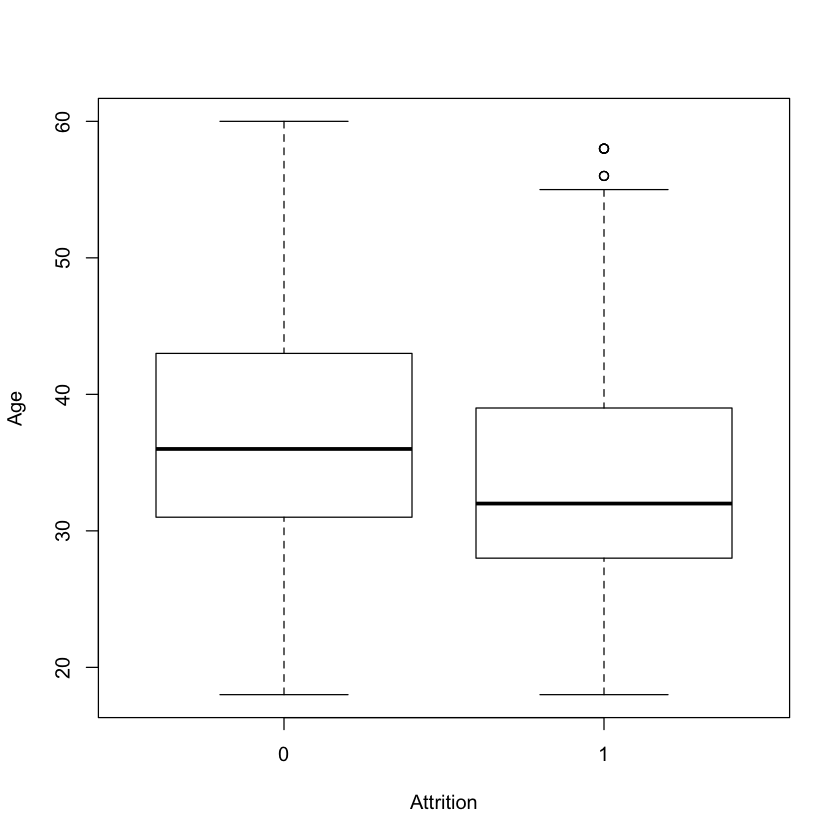

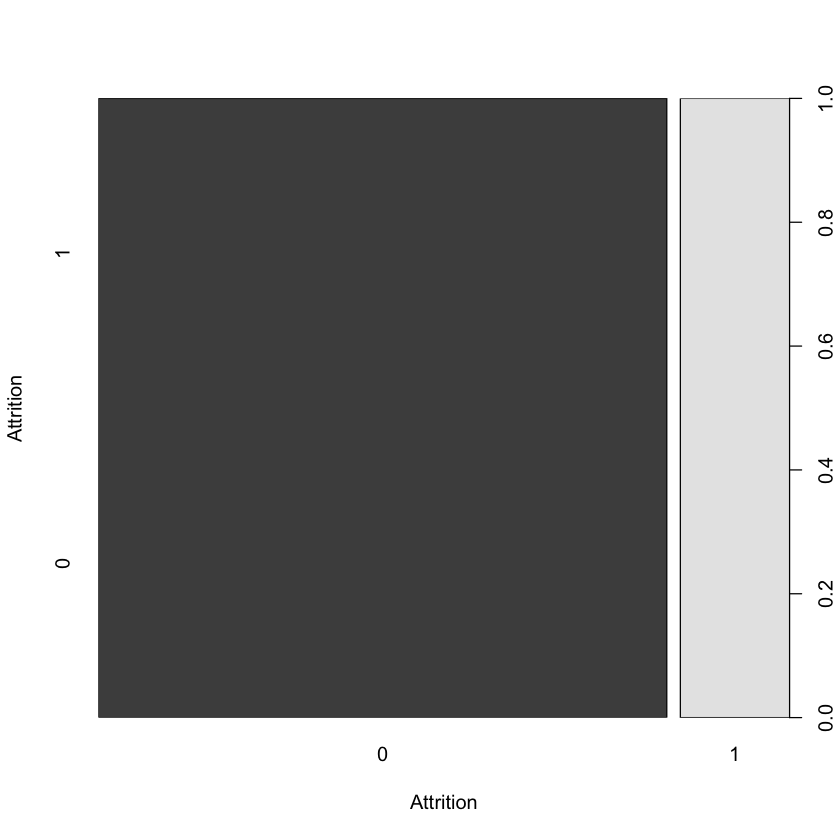

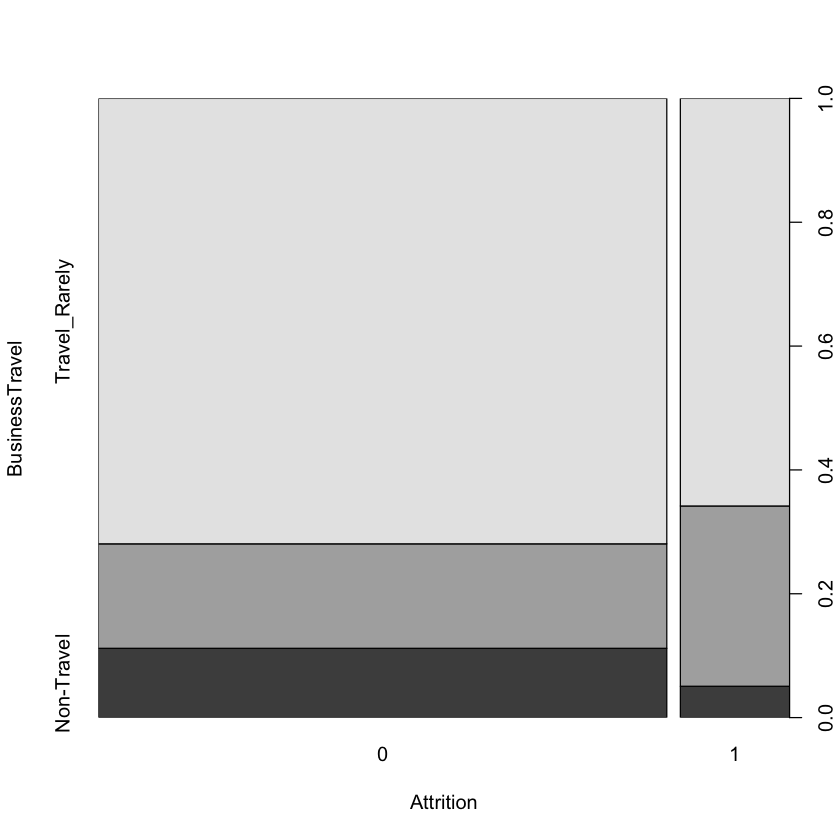

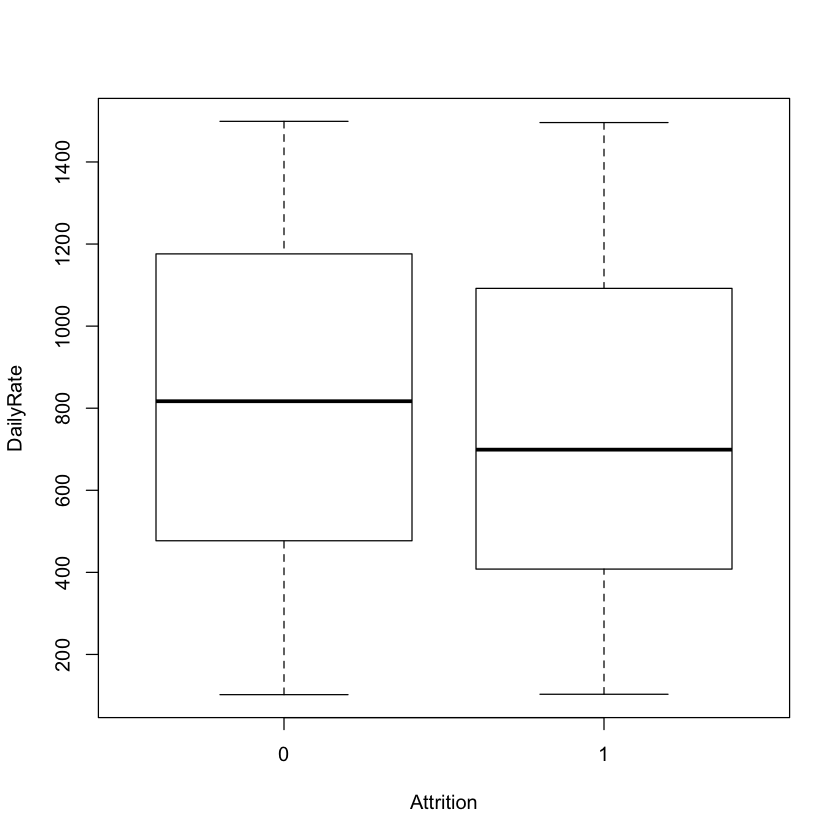

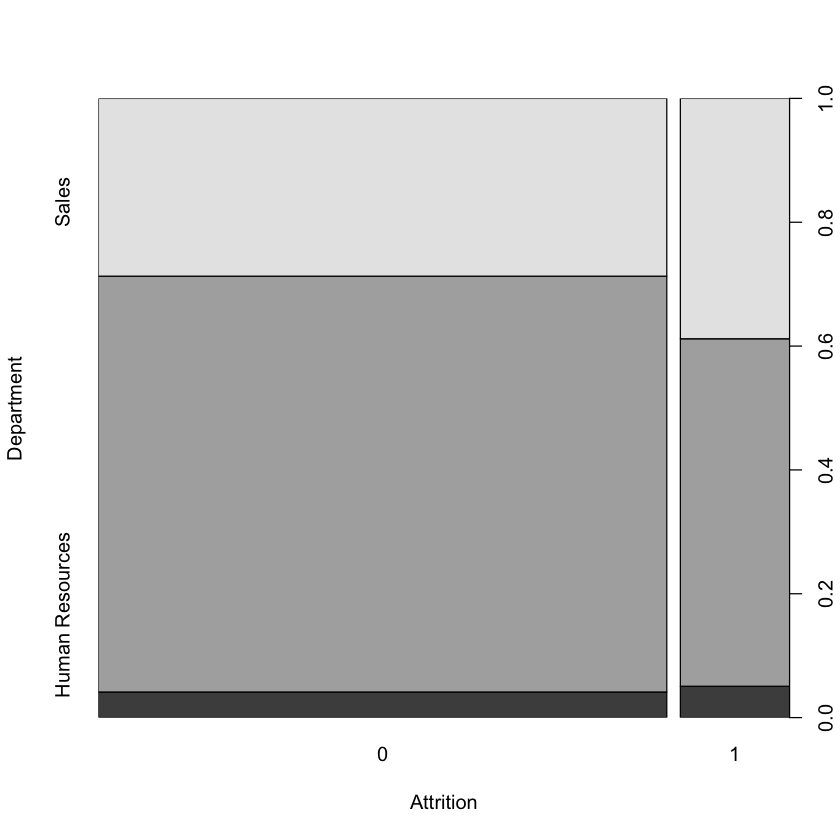

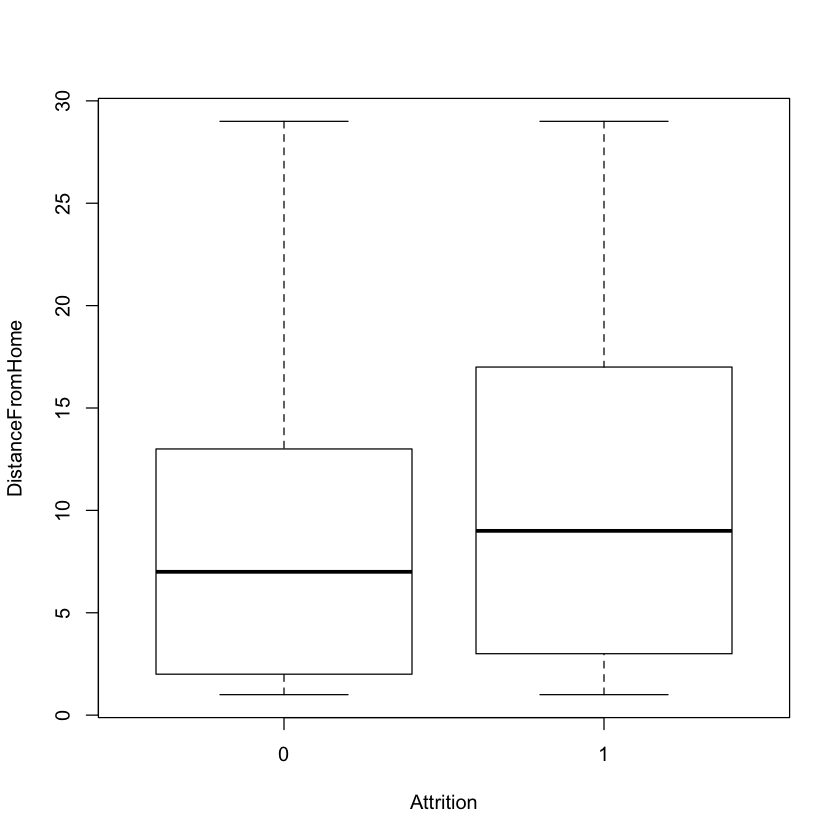

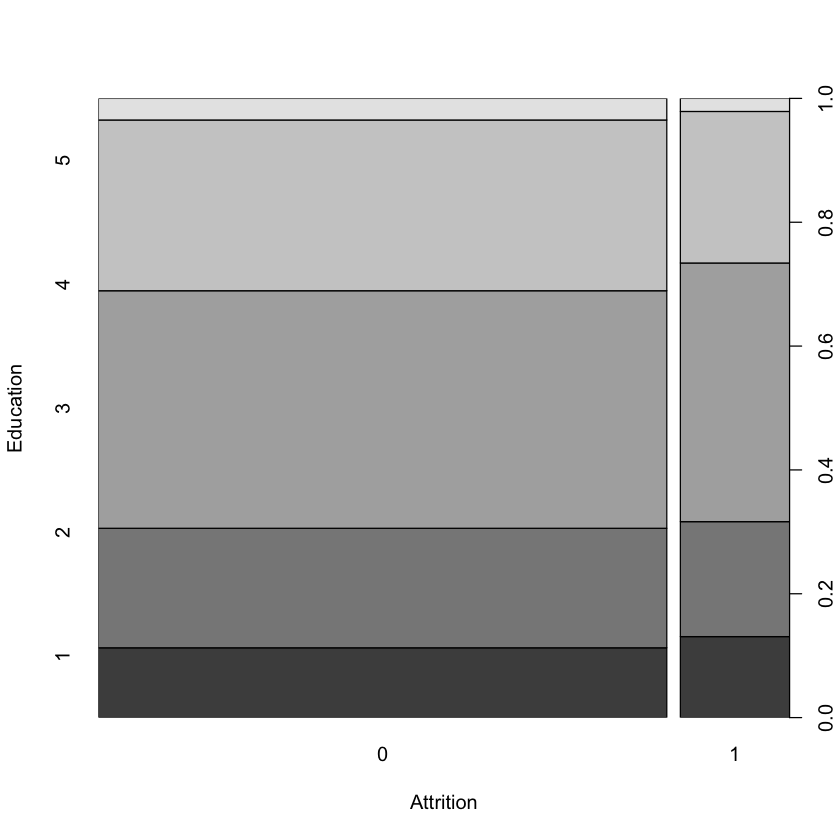

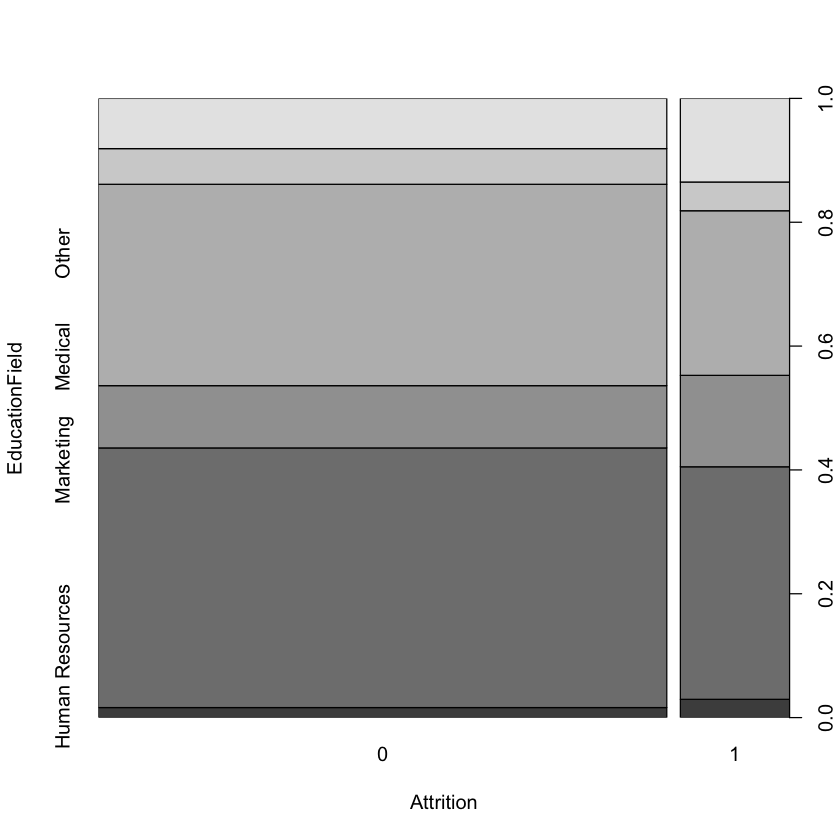

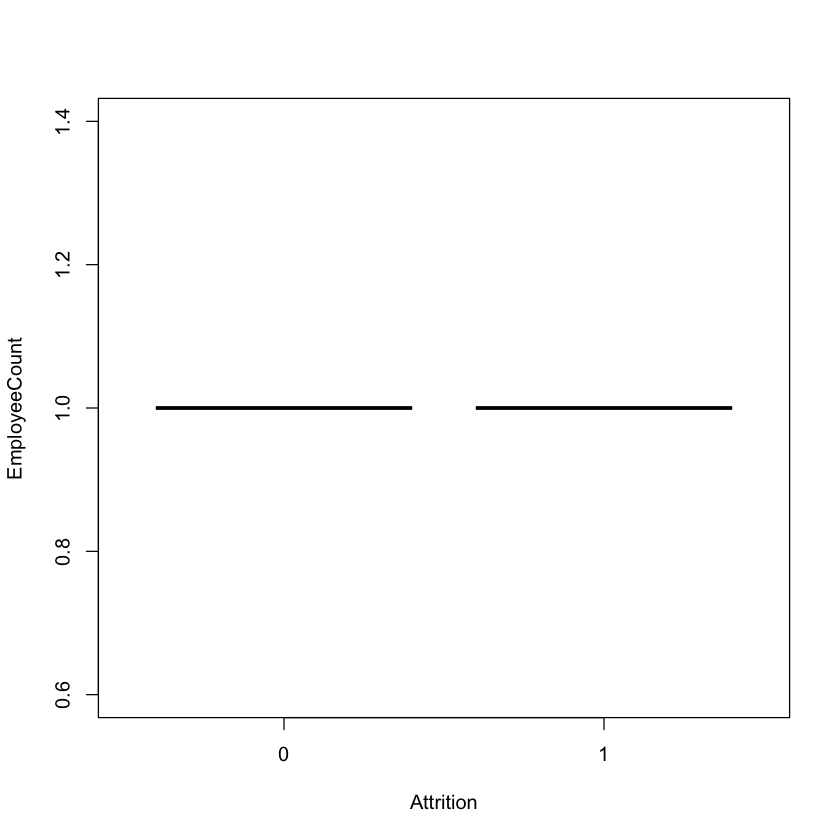

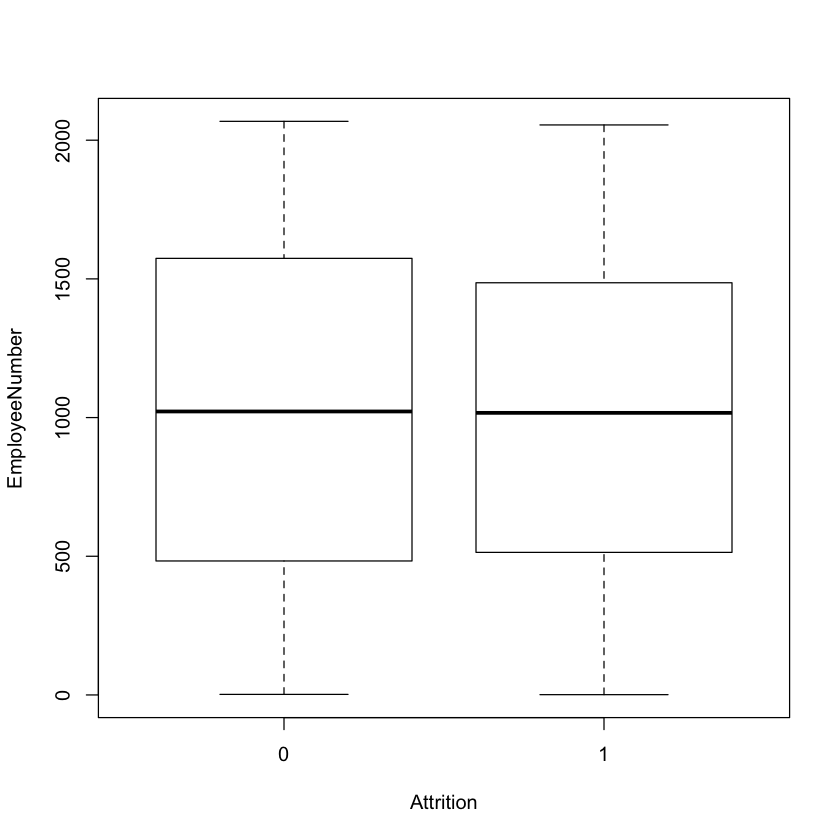

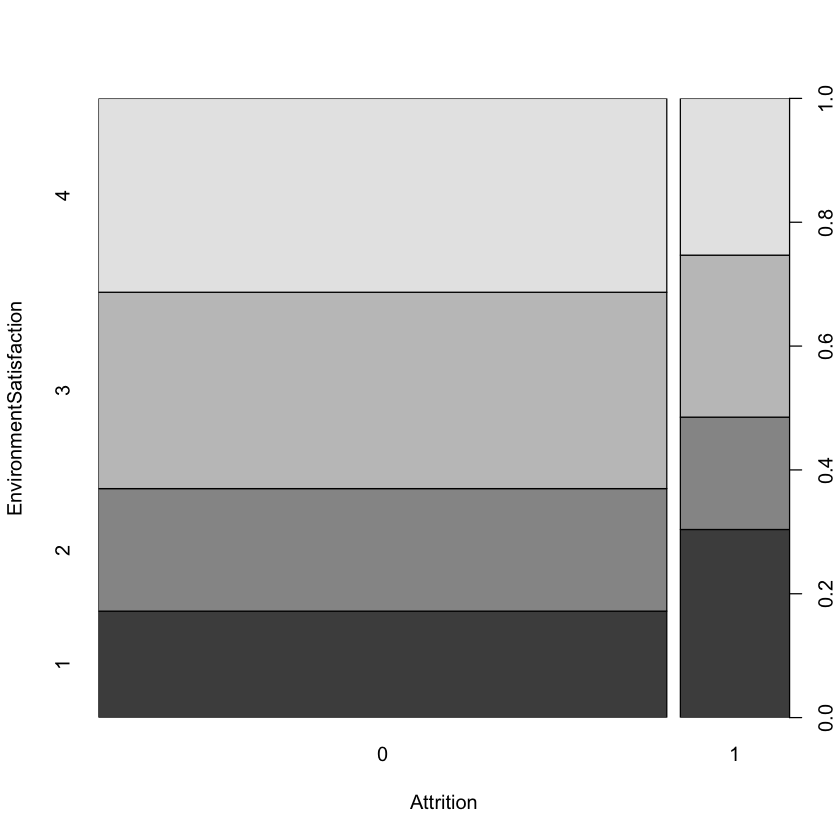

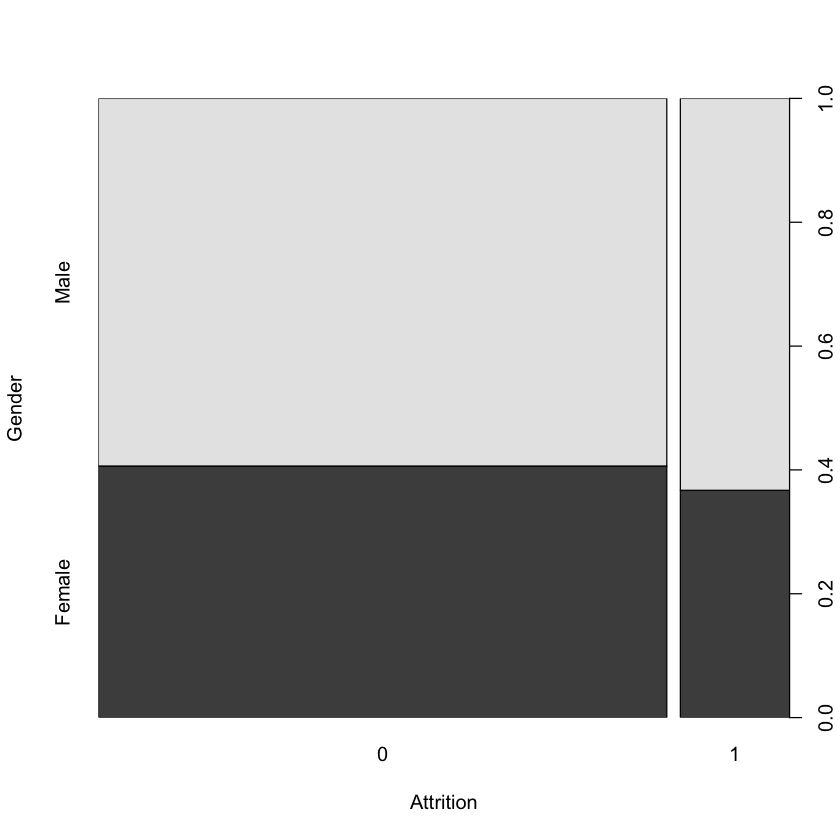

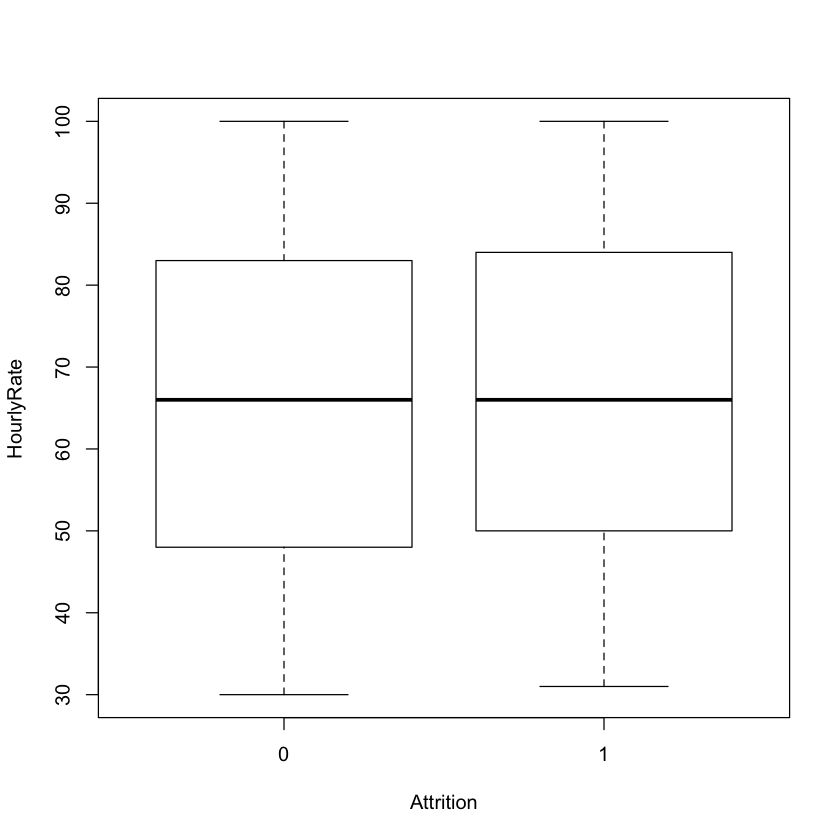

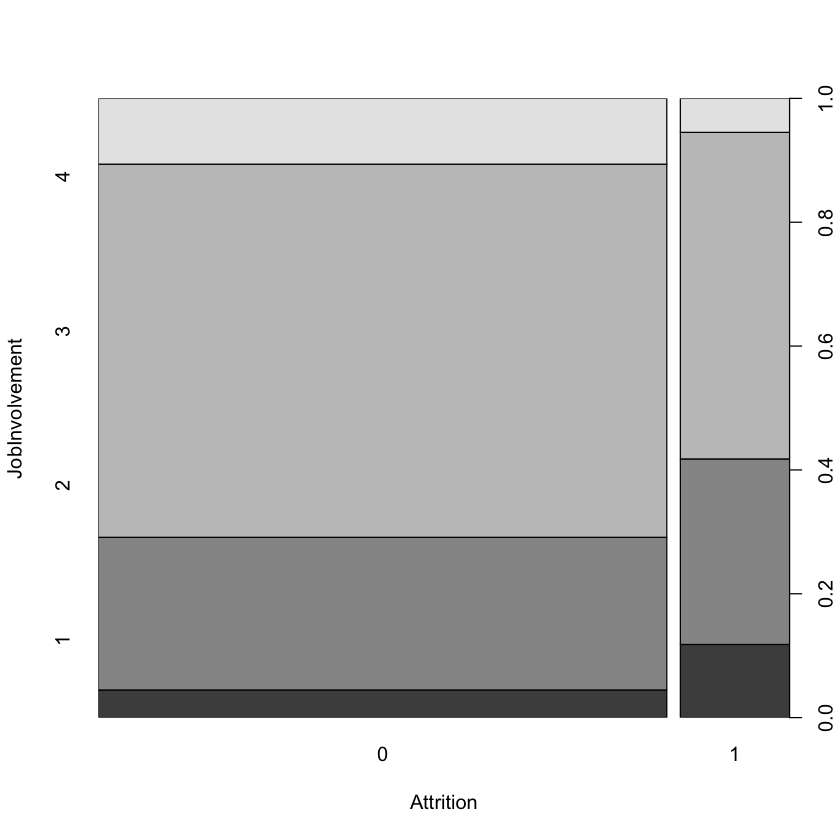

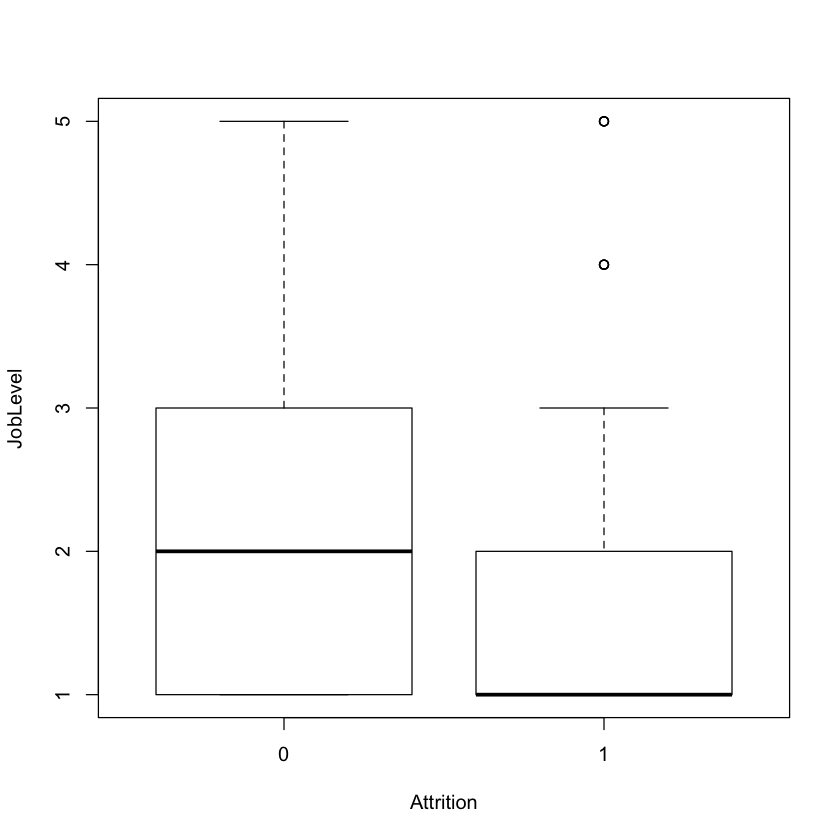

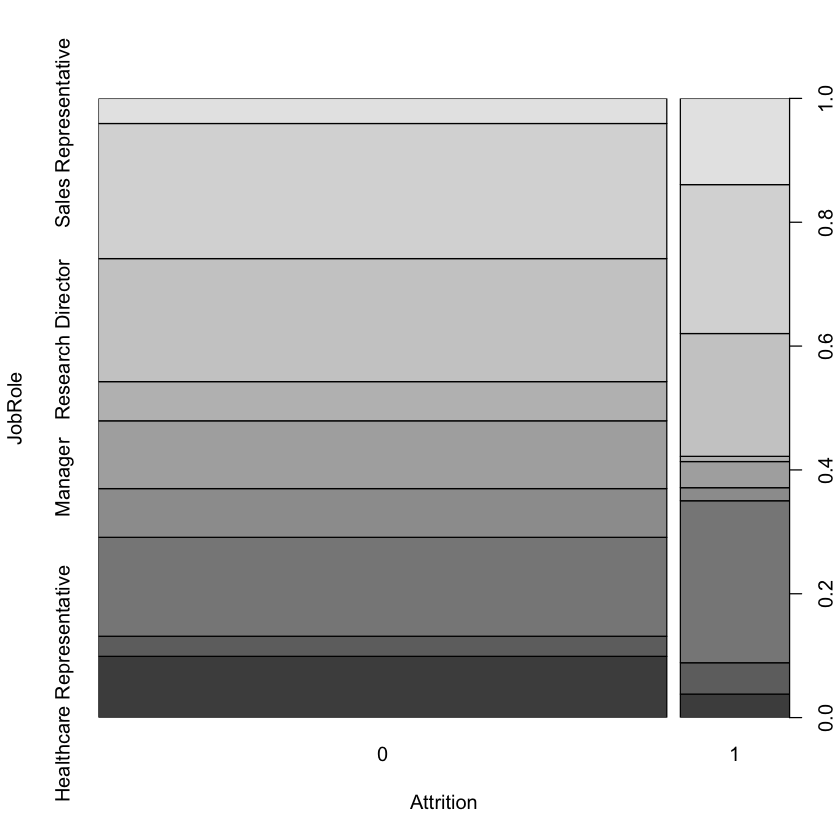

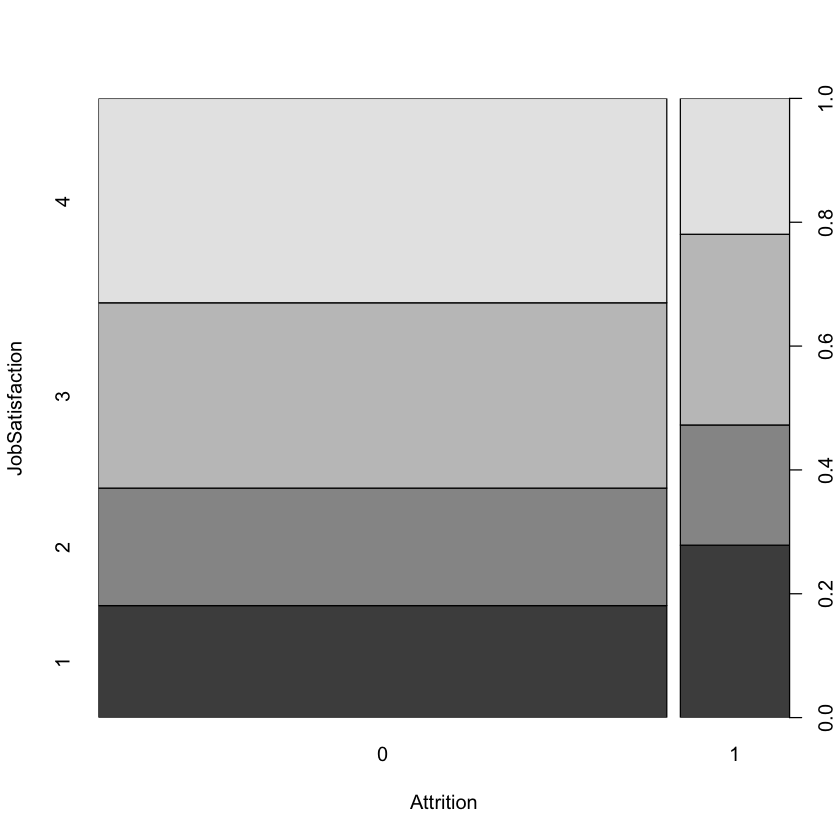

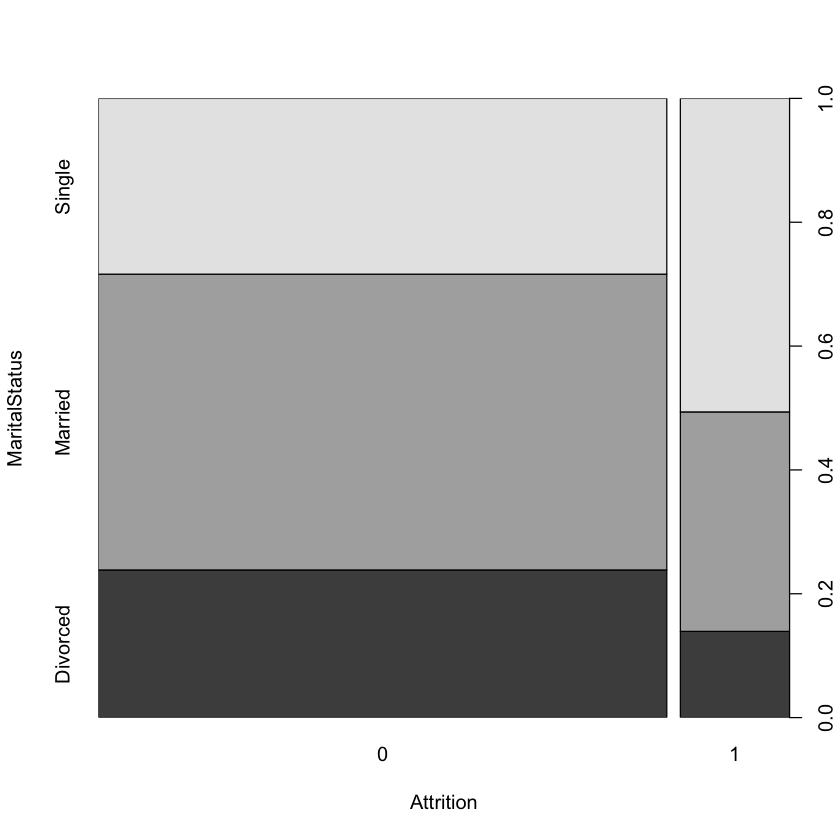

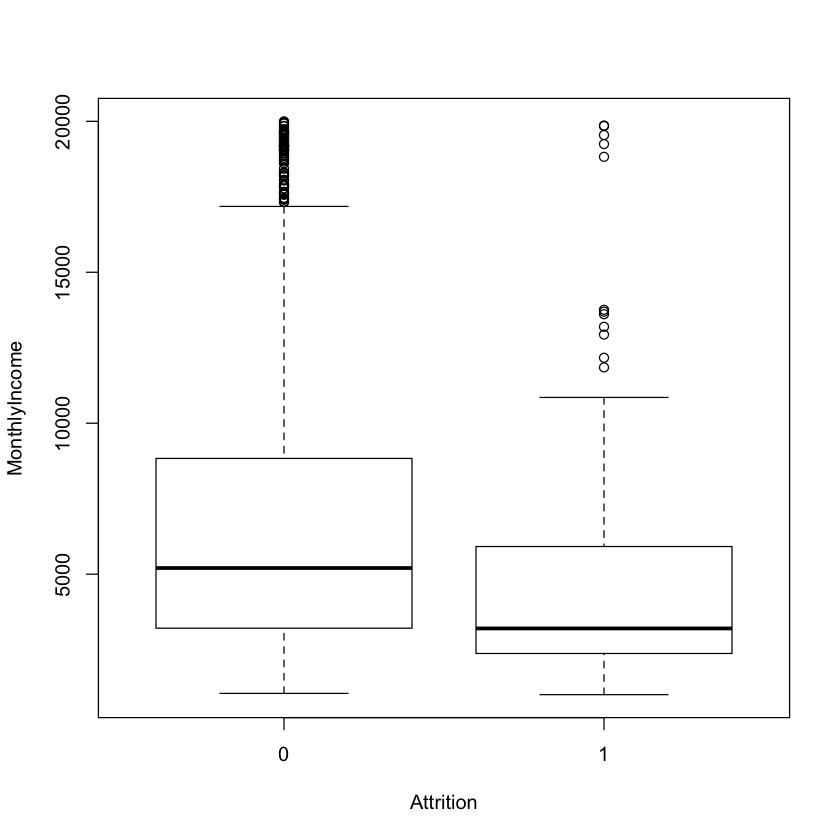

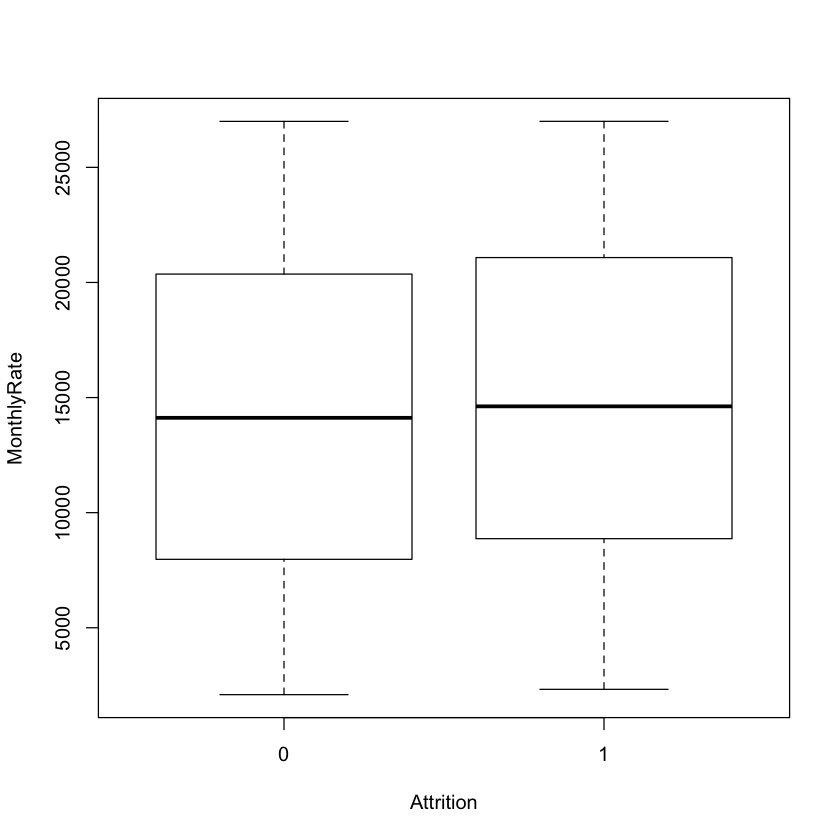

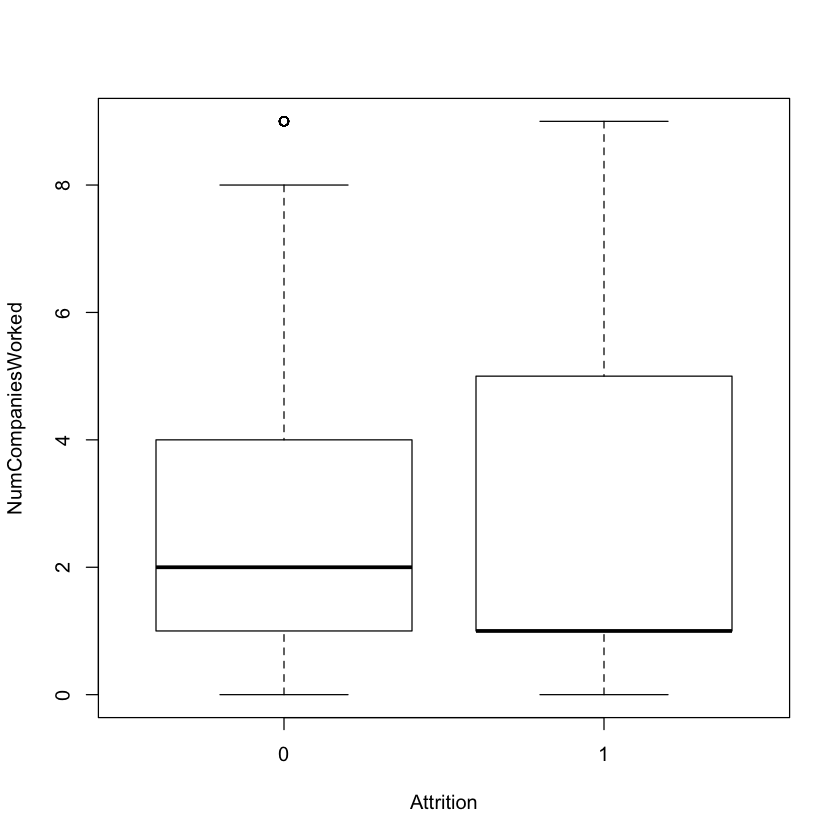

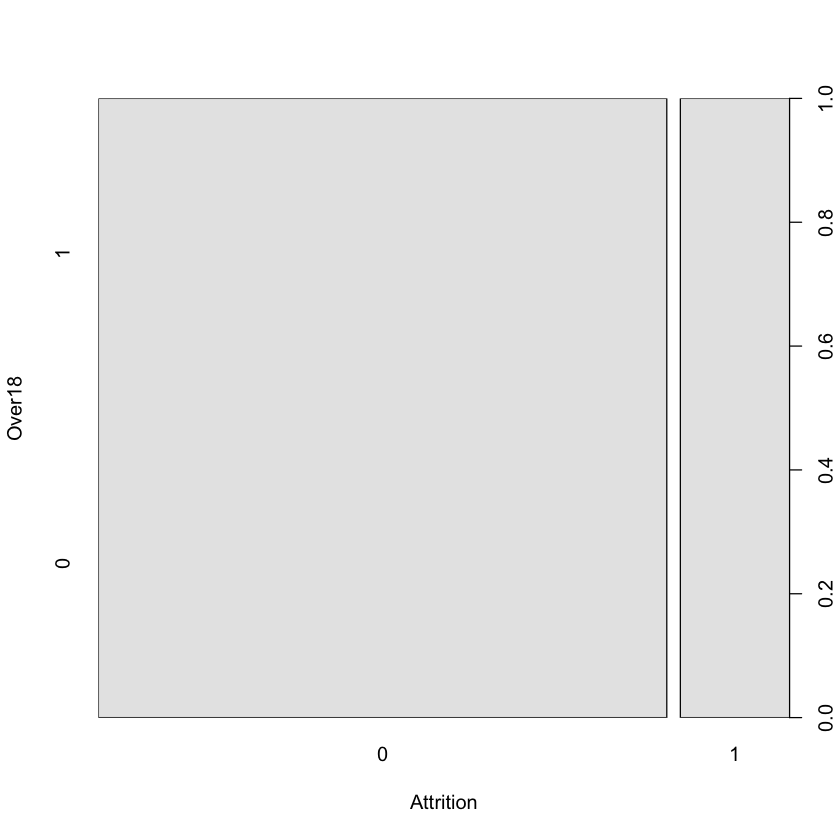

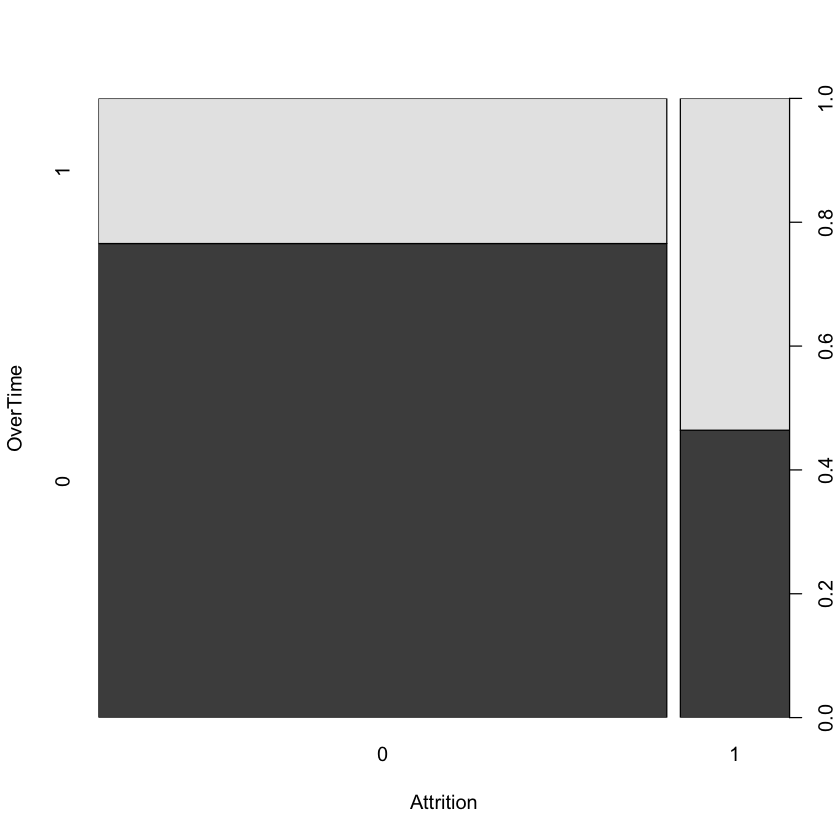

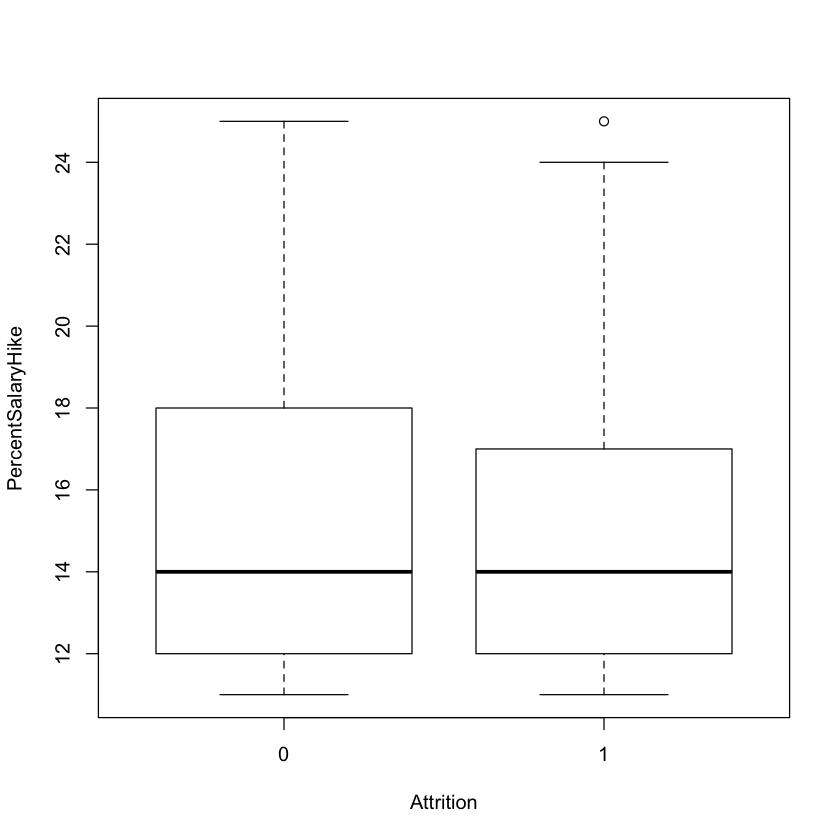

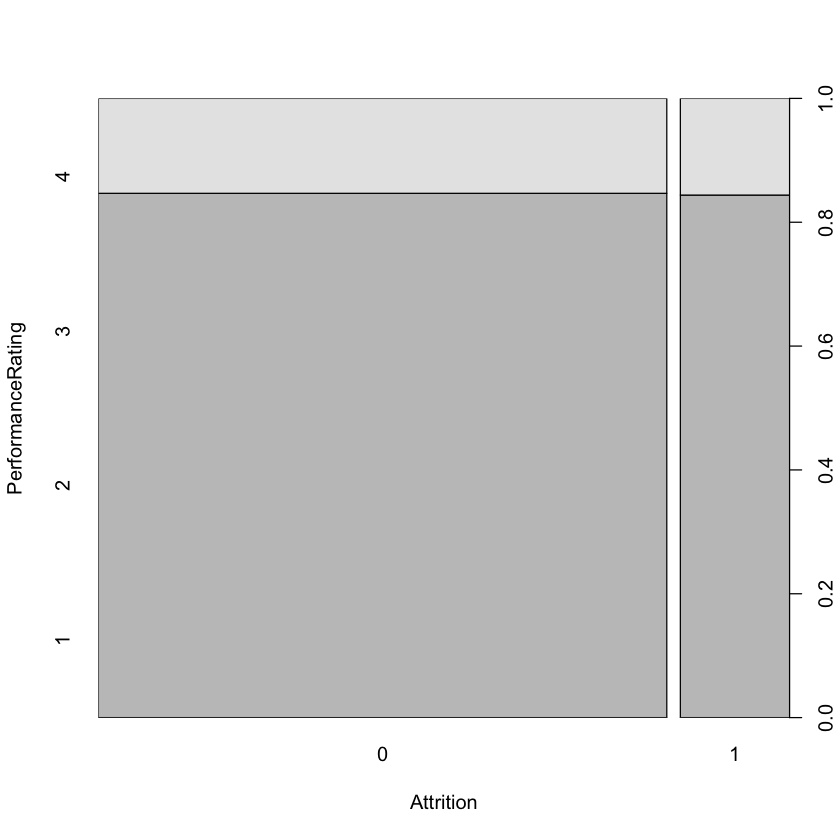

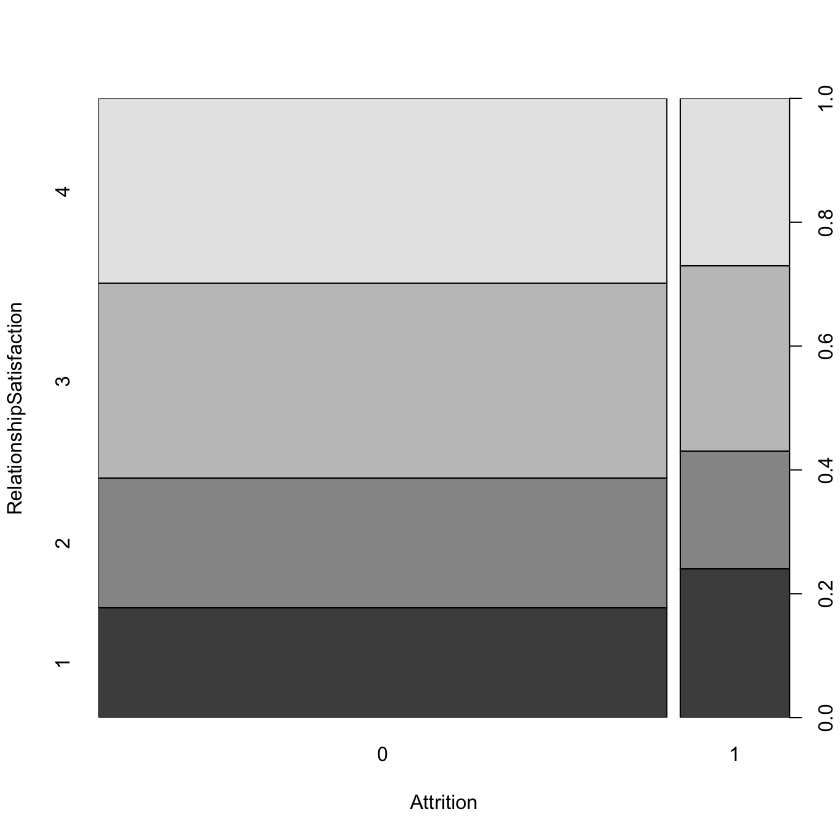

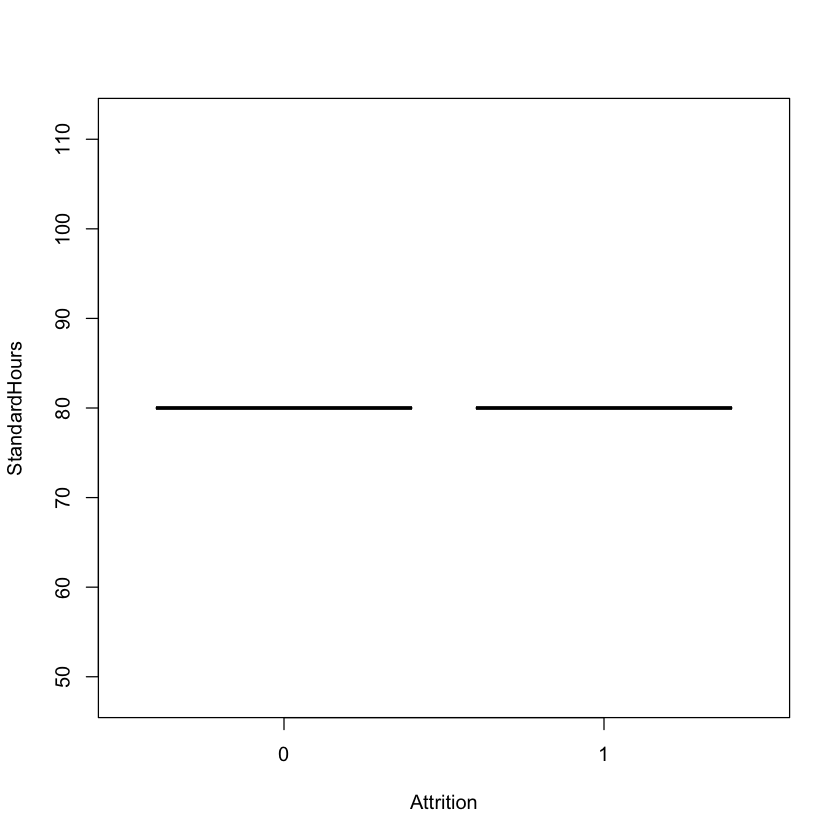

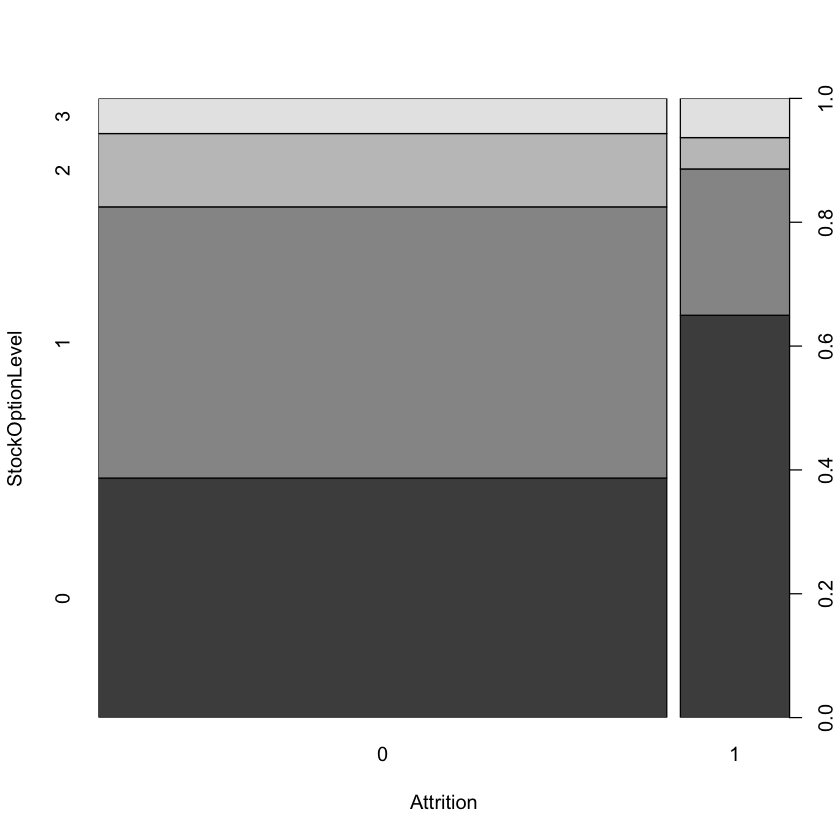

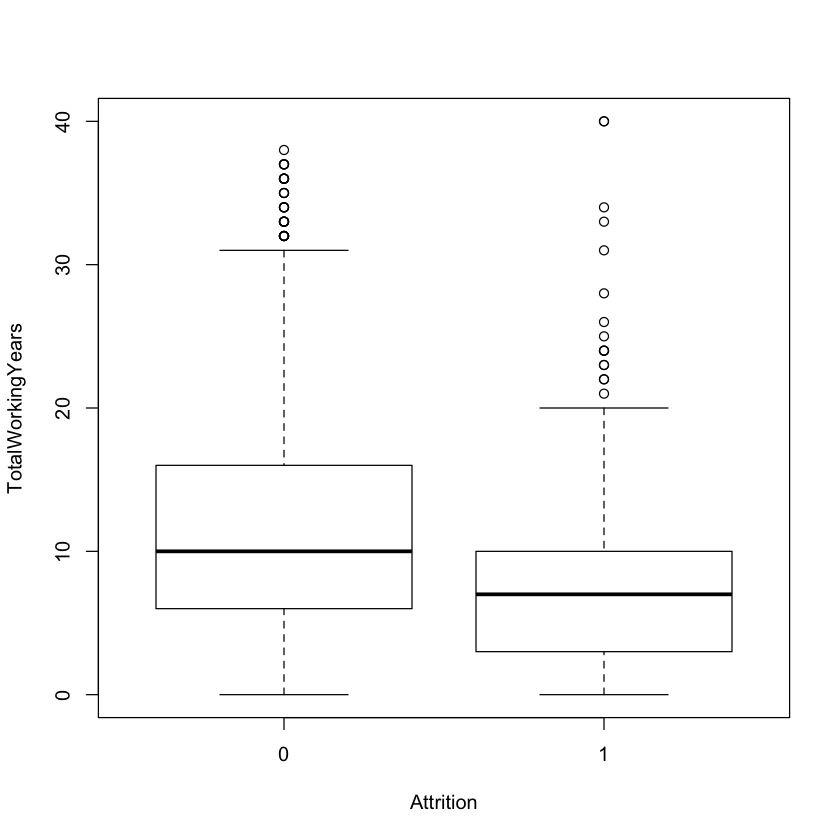

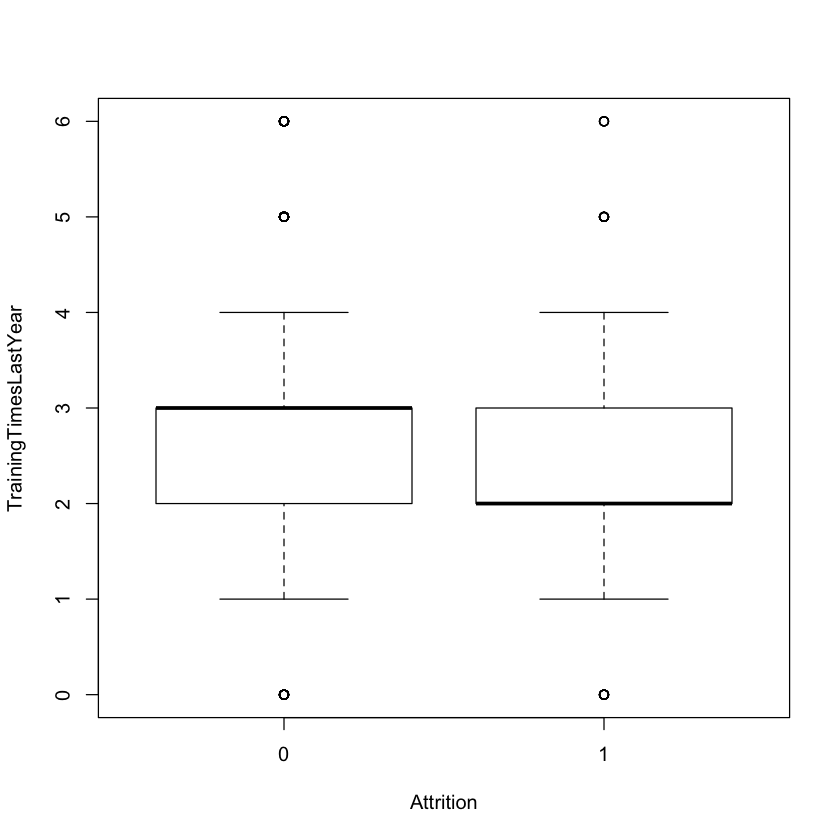

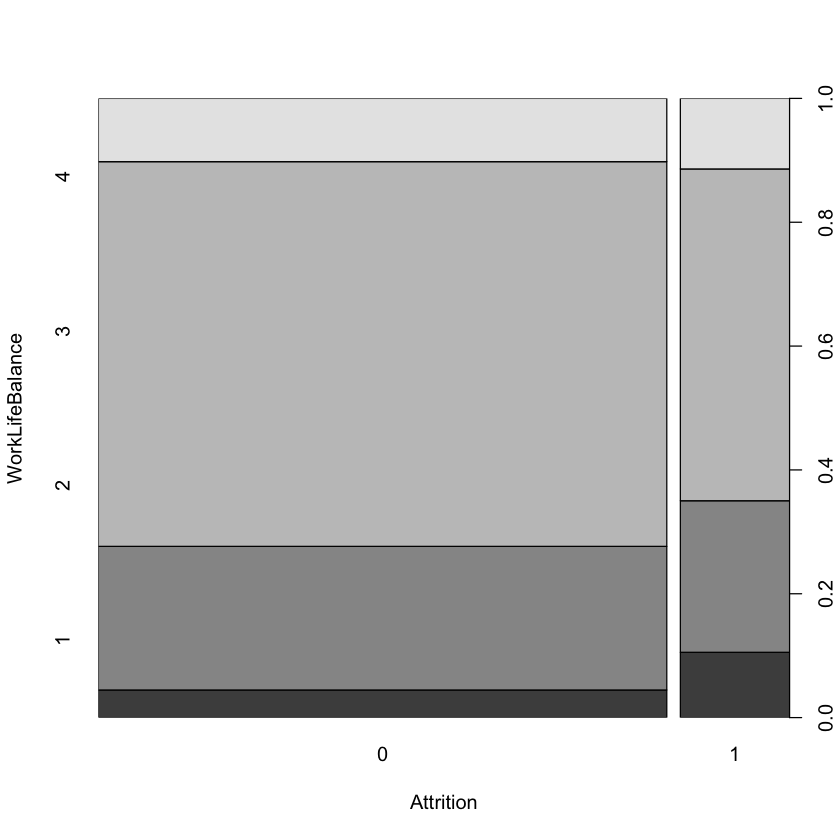

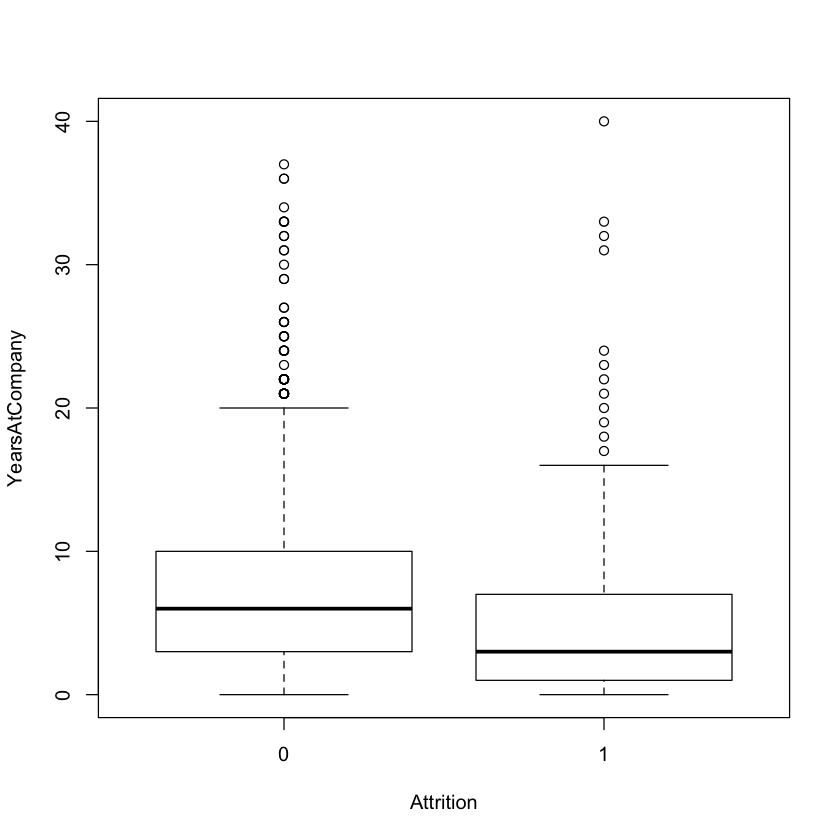

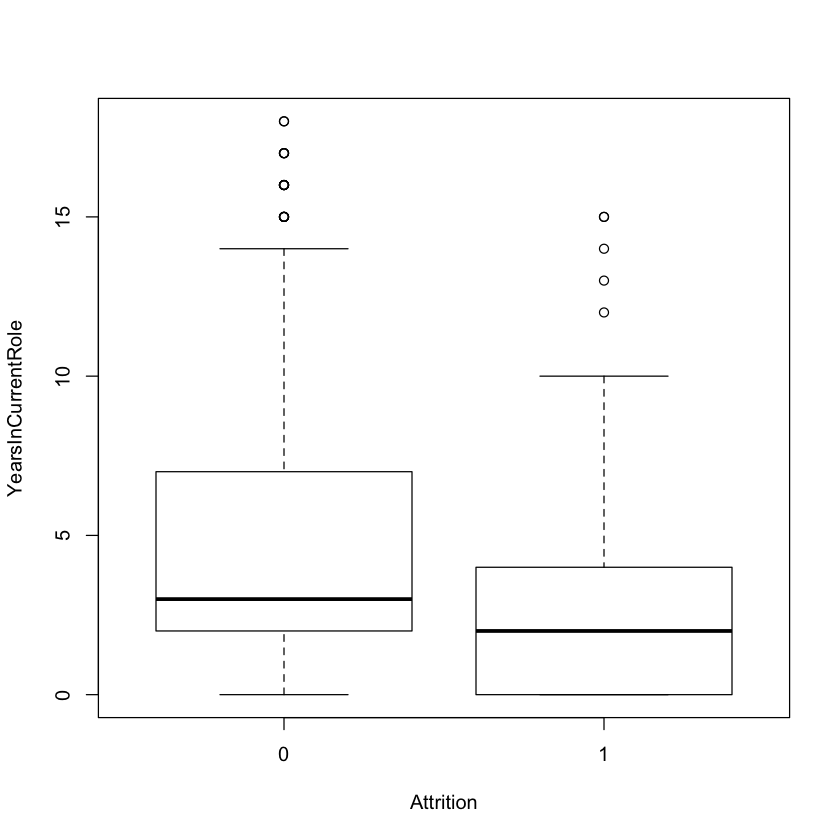

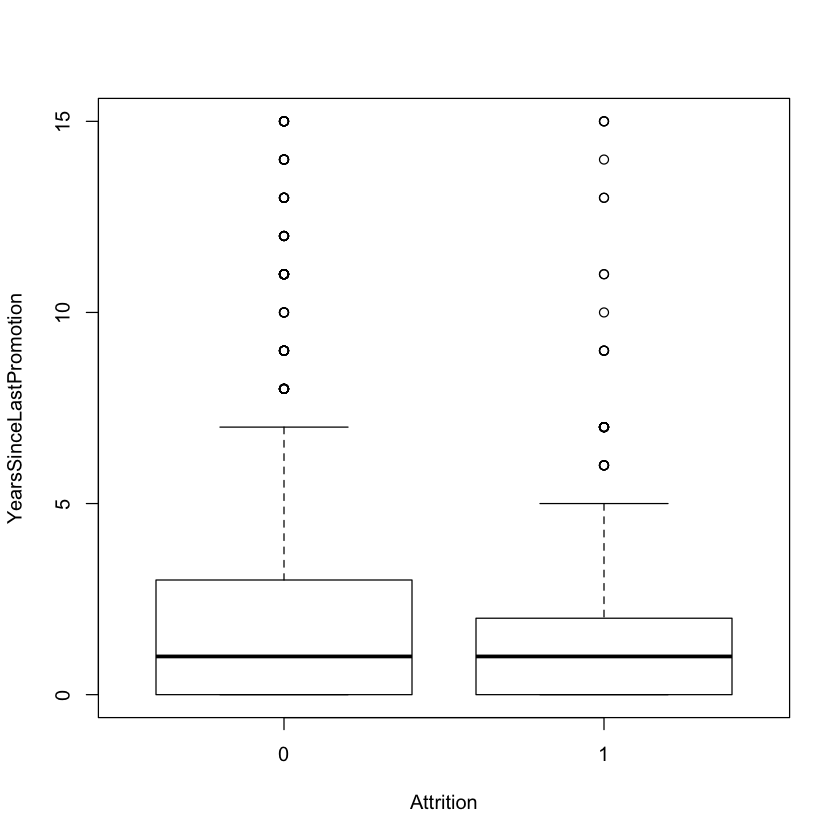

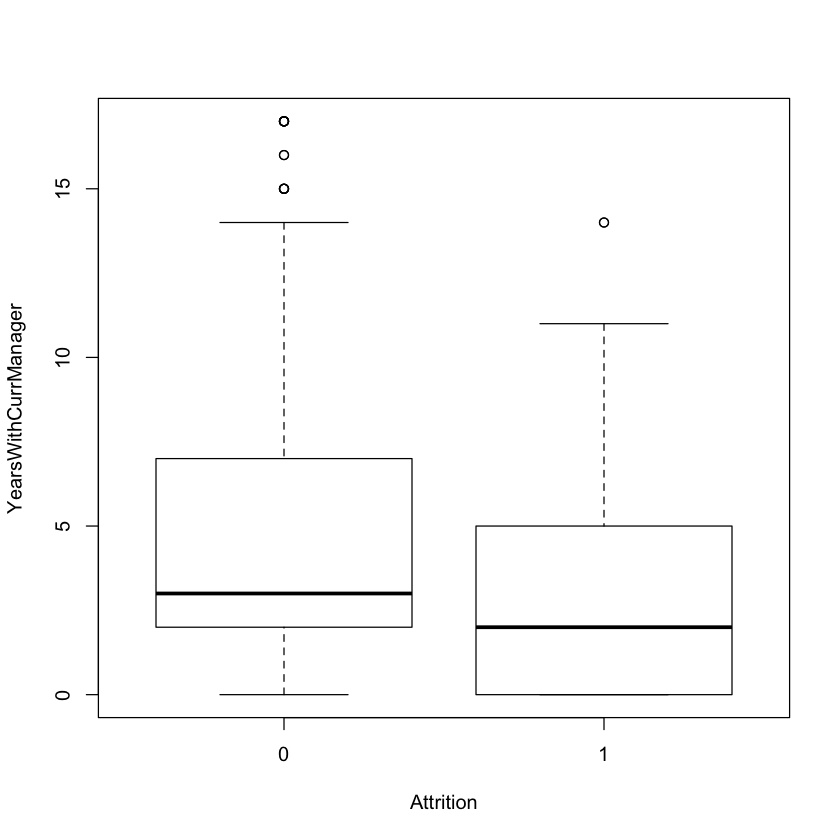

In [47]:
for(i in 1:length(data)) {
    plot(Attrition, eval(parse(text=names(data)[i])), xlab = "Attrition", ylab = names(data)[i])
}

In [50]:
# plot(data)

Warning message in if (class(obj) == "amelia") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“Unknown or uninitialised column: 'arguments'.”
Warning message:
“Unknown or uninitialised column: 'arguments'.”
Warning message:
“Unknown or uninitialised column: 'imputations'.”


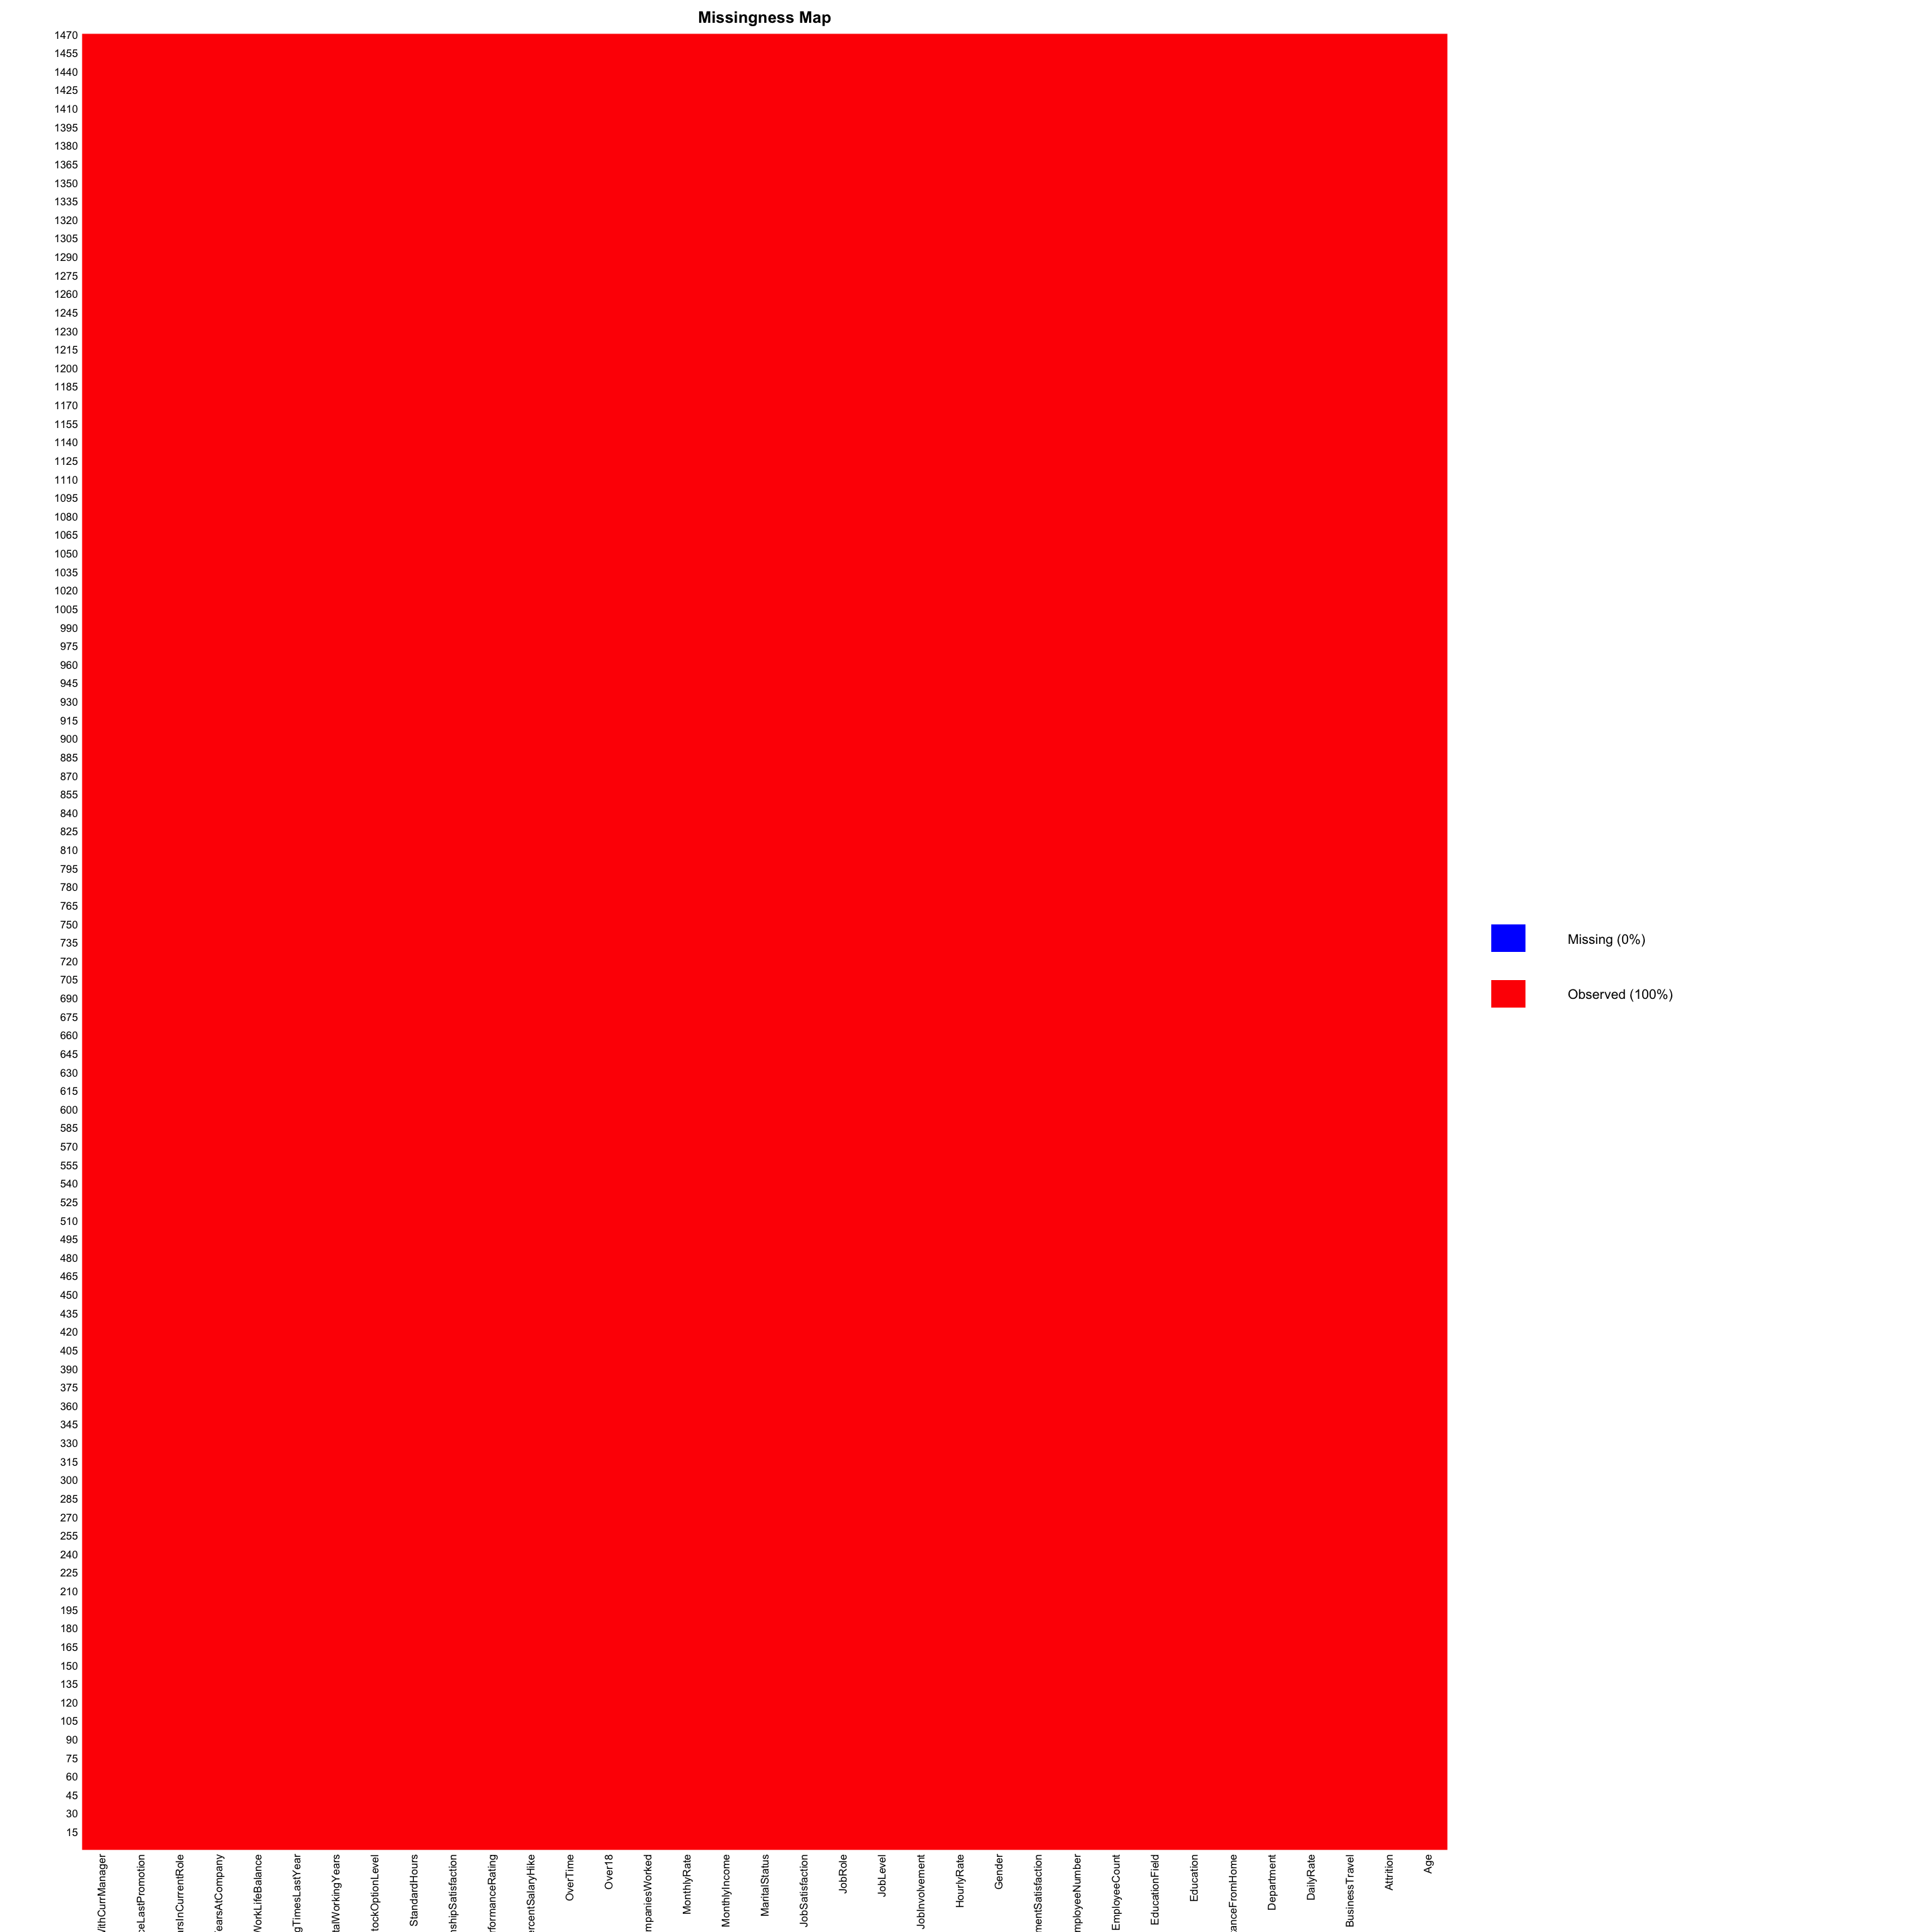

missmap                 package:Amelia                 R Documentation

_M_i_s_s_i_n_g_n_e_s_s _M_a_p

_D_e_s_c_r_i_p_t_i_o_n:

     Plots a missingness map showing where missingness occurs in the
     dataset passed to ‘amelia’.

_U_s_a_g_e:

     missmap(obj, legend = TRUE, col = c("indianred", "dodgerblue"), main,
             y.cex = 0.8, x.cex = 0.8, y.labels, y.at, csvar = NULL, tsvar =
             NULL, rank.order = TRUE, margins = c(5, 5), ...)
     
_A_r_g_u_m_e_n_t_s:

     obj: an object of class "amelia"; typically output from the
          function ‘amelia’, a matrix or a dataframe.

  legend: should a legend be drawn?

     col: a vector of length two where the first element specifies the
          color for missing cells and the second element specifies the
          color for observed cells.

    main: main title of the plot. Defaults to "Missingness Map".

   x.cex: expansion for the variables names on the x-axis.

   y.cex: expansion for the unit names on the y-axis.

y.labels: a vector of row labels to print on the y-axis

    y.at: a vector of the same length as ‘y.labels’ with row nmumbers
          associated with the labels.

   csvar: column number or name of the variable corresponding to the
          unit indicator. Only used when the ‘obj’ is not of class
          ‘amelia’.

   tsvar: column number or name of the variable corresponding to the
          time indicator. Only used when the ‘obj’ is not of class
          ‘amelia’.

rank.order: a logical value. If ‘TRUE’, the default, then the order of
          the variables along the the x-axis is sorted by the percent
          missing (from highest to lowest). If ‘FALSE’, it is simply
          the order of the variables in the data.

 margins: a vector of length two that specifies the bottom and left
          margins of the plot. Useful for when variable names or row
          names are long.

     ...: further graphical arguments.

_D_e_t_a_i_l_s:

     ‘missmap’ draws a map of the missingness in a dataset using the
     ‘image’ function. The columns are reordered to put the most
     missing variable farthest to the left. The rows are reordered to a
     unit-period order if the ‘ts’ and ‘cs’ arguments were passed to
     ‘amelia’. If not, the rows are not reordered.

     The ‘y.labels’ and ‘y.at’ commands can be used to associate labels
     with rows in the data to identify them in the plot. The y-axis is
     internally inverted so that the first row of the data is
     associated with the top-most row of the missingness map. The
     values of ‘y.at’ should refer to the rows of the data, not to any
     point on the plotting region.

_S_e_e _A_l_s_o:

     ‘compare.density’, ‘overimpute’, ‘tscsPlot’, ‘image’, ‘heatmap’

In [52]:
help(missmap)
options(repr.plot.width = 24, repr.plot.height = 24)
missmap(data, col=c("blue", "red"), legend=TRUE)

Age          DailyRate    DistanceFromHome EmployeeCount
nbr.val      1.470000e+03 1.470000e+03 1.470000e+03     1470         
nbr.null     0.000000e+00 0.000000e+00 0.000000e+00        0         
nbr.na       0.000000e+00 0.000000e+00 0.000000e+00        0         
min          1.800000e+01 1.020000e+02 1.000000e+00        1         
max          6.000000e+01 1.499000e+03 2.900000e+01        1         
range        4.200000e+01 1.397000e+03 2.800000e+01        0         
sum          5.427800e+04 1.179654e+06 1.351300e+04     1470         
median       3.600000e+01 8.020000e+02 7.000000e+00        1         
mean         3.692381e+01 8.024857e+02 9.192517e+00        1         
SE.mean      2.382691e-01 1.052434e+01 2.114435e-01        0         
CI.mean.0.95 4.673839e-01 2.064433e+01 4.147633e-01        0         
var          8.345505e+01 1.628196e+05 6.572125e+01        0         
std.dev      9.135373e+00 4.035091e+02 8.106864e+00        0         
coef.var     2.474115e-01 5.028240e-01 8.818982e-01        0         
             EmployeeNumber HourlyRate   JobLevel     MonthlyIncome
nbr.val      1.470000e+03   1.470000e+03 1.470000e+03 1.470000e+03 
nbr.null     0.000000e+00   0.000000e+00 0.000000e+00 0.000000e+00 
nbr.na       0.000000e+00   0.000000e+00 0.000000e+00 0.000000e+00 
min          1.000000e+00   3.000000e+01 1.000000e+00 1.009000e+03 
max          2.068000e+03   1.000000e+02 5.000000e+00 1.999900e+04 
range        2.067000e+03   7.000000e+01 4.000000e+00 1.899000e+04 
sum          1.506552e+06   9.686000e+04 3.034000e+03 9.559309e+06 
median       1.020500e+03   6.600000e+01 2.000000e+00 4.919000e+03 
mean         1.024865e+03   6.589116e+01 2.063946e+00 6.502931e+03 
SE.mean      1.570201e+01   5.302327e-01 2.887124e-02 1.227931e+02 
CI.mean.0.95 3.080076e+01   1.040094e+00 5.663324e-02 2.408684e+02 
var          3.624333e+05   4.132856e+02 1.225316e+00 2.216486e+07 
std.dev      6.020243e+02   2.032943e+01 1.106940e+00 4.707957e+03 
coef.var     5.874180e-01   3.085304e-01 5.363222e-01 7.239746e-01 
             MonthlyRate  NumCompaniesWorked PercentSalaryHike StandardHours
nbr.val      1.470000e+03 1.470000e+03       1.470000e+03        1470       
nbr.null     0.000000e+00 1.970000e+02       0.000000e+00           0       
nbr.na       0.000000e+00 0.000000e+00       0.000000e+00           0       
min          2.094000e+03 0.000000e+00       1.100000e+01          80       
max          2.699900e+04 9.000000e+00       2.500000e+01          80       
range        2.490500e+04 9.000000e+00       1.400000e+01           0       
sum          2.104026e+07 3.959000e+03       2.235800e+04      117600       
median       1.423550e+04 2.000000e+00       1.400000e+01          80       
mean         1.431310e+04 2.693197e+00       1.520952e+01          80       
SE.mean      1.856463e+02 6.515314e-02       9.545859e-02           0       
CI.mean.0.95 3.641601e+02 1.278031e-01       1.872497e-01           0       
var          5.066288e+07 6.240049e+00       1.339514e+01           0       
std.dev      7.117786e+03 2.498009e+00       3.659938e+00           0       
coef.var     4.972916e-01 9.275254e-01       2.406346e-01           0       
             TotalWorkingYears TrainingTimesLastYear YearsAtCompany
nbr.val      1.470000e+03      1.470000e+03          1.470000e+03  
nbr.null     1.100000e+01      5.400000e+01          4.400000e+01  
nbr.na       0.000000e+00      0.000000e+00          0.000000e+00  
min          0.000000e+00      0.000000e+00          0.000000e+00  
max          4.000000e+01      6.000000e+00          4.000000e+01  
range        4.000000e+01      6.000000e+00          4.000000e+01  
sum          1.658100e+04      4.115000e+03          1.030200e+04  
median       1.000000e+01      3.000000e+00          5.000000e+00  
mean         1.127959e+01      2.799320e+00          7.008163e+00  
SE.mean      2.029386e-01      3.362679e-02          1.597922e-01  
CI.mean.0.95 3.980802e-01      6.596165e

Warning message in cor(num_data):
“the standard deviation is zero”


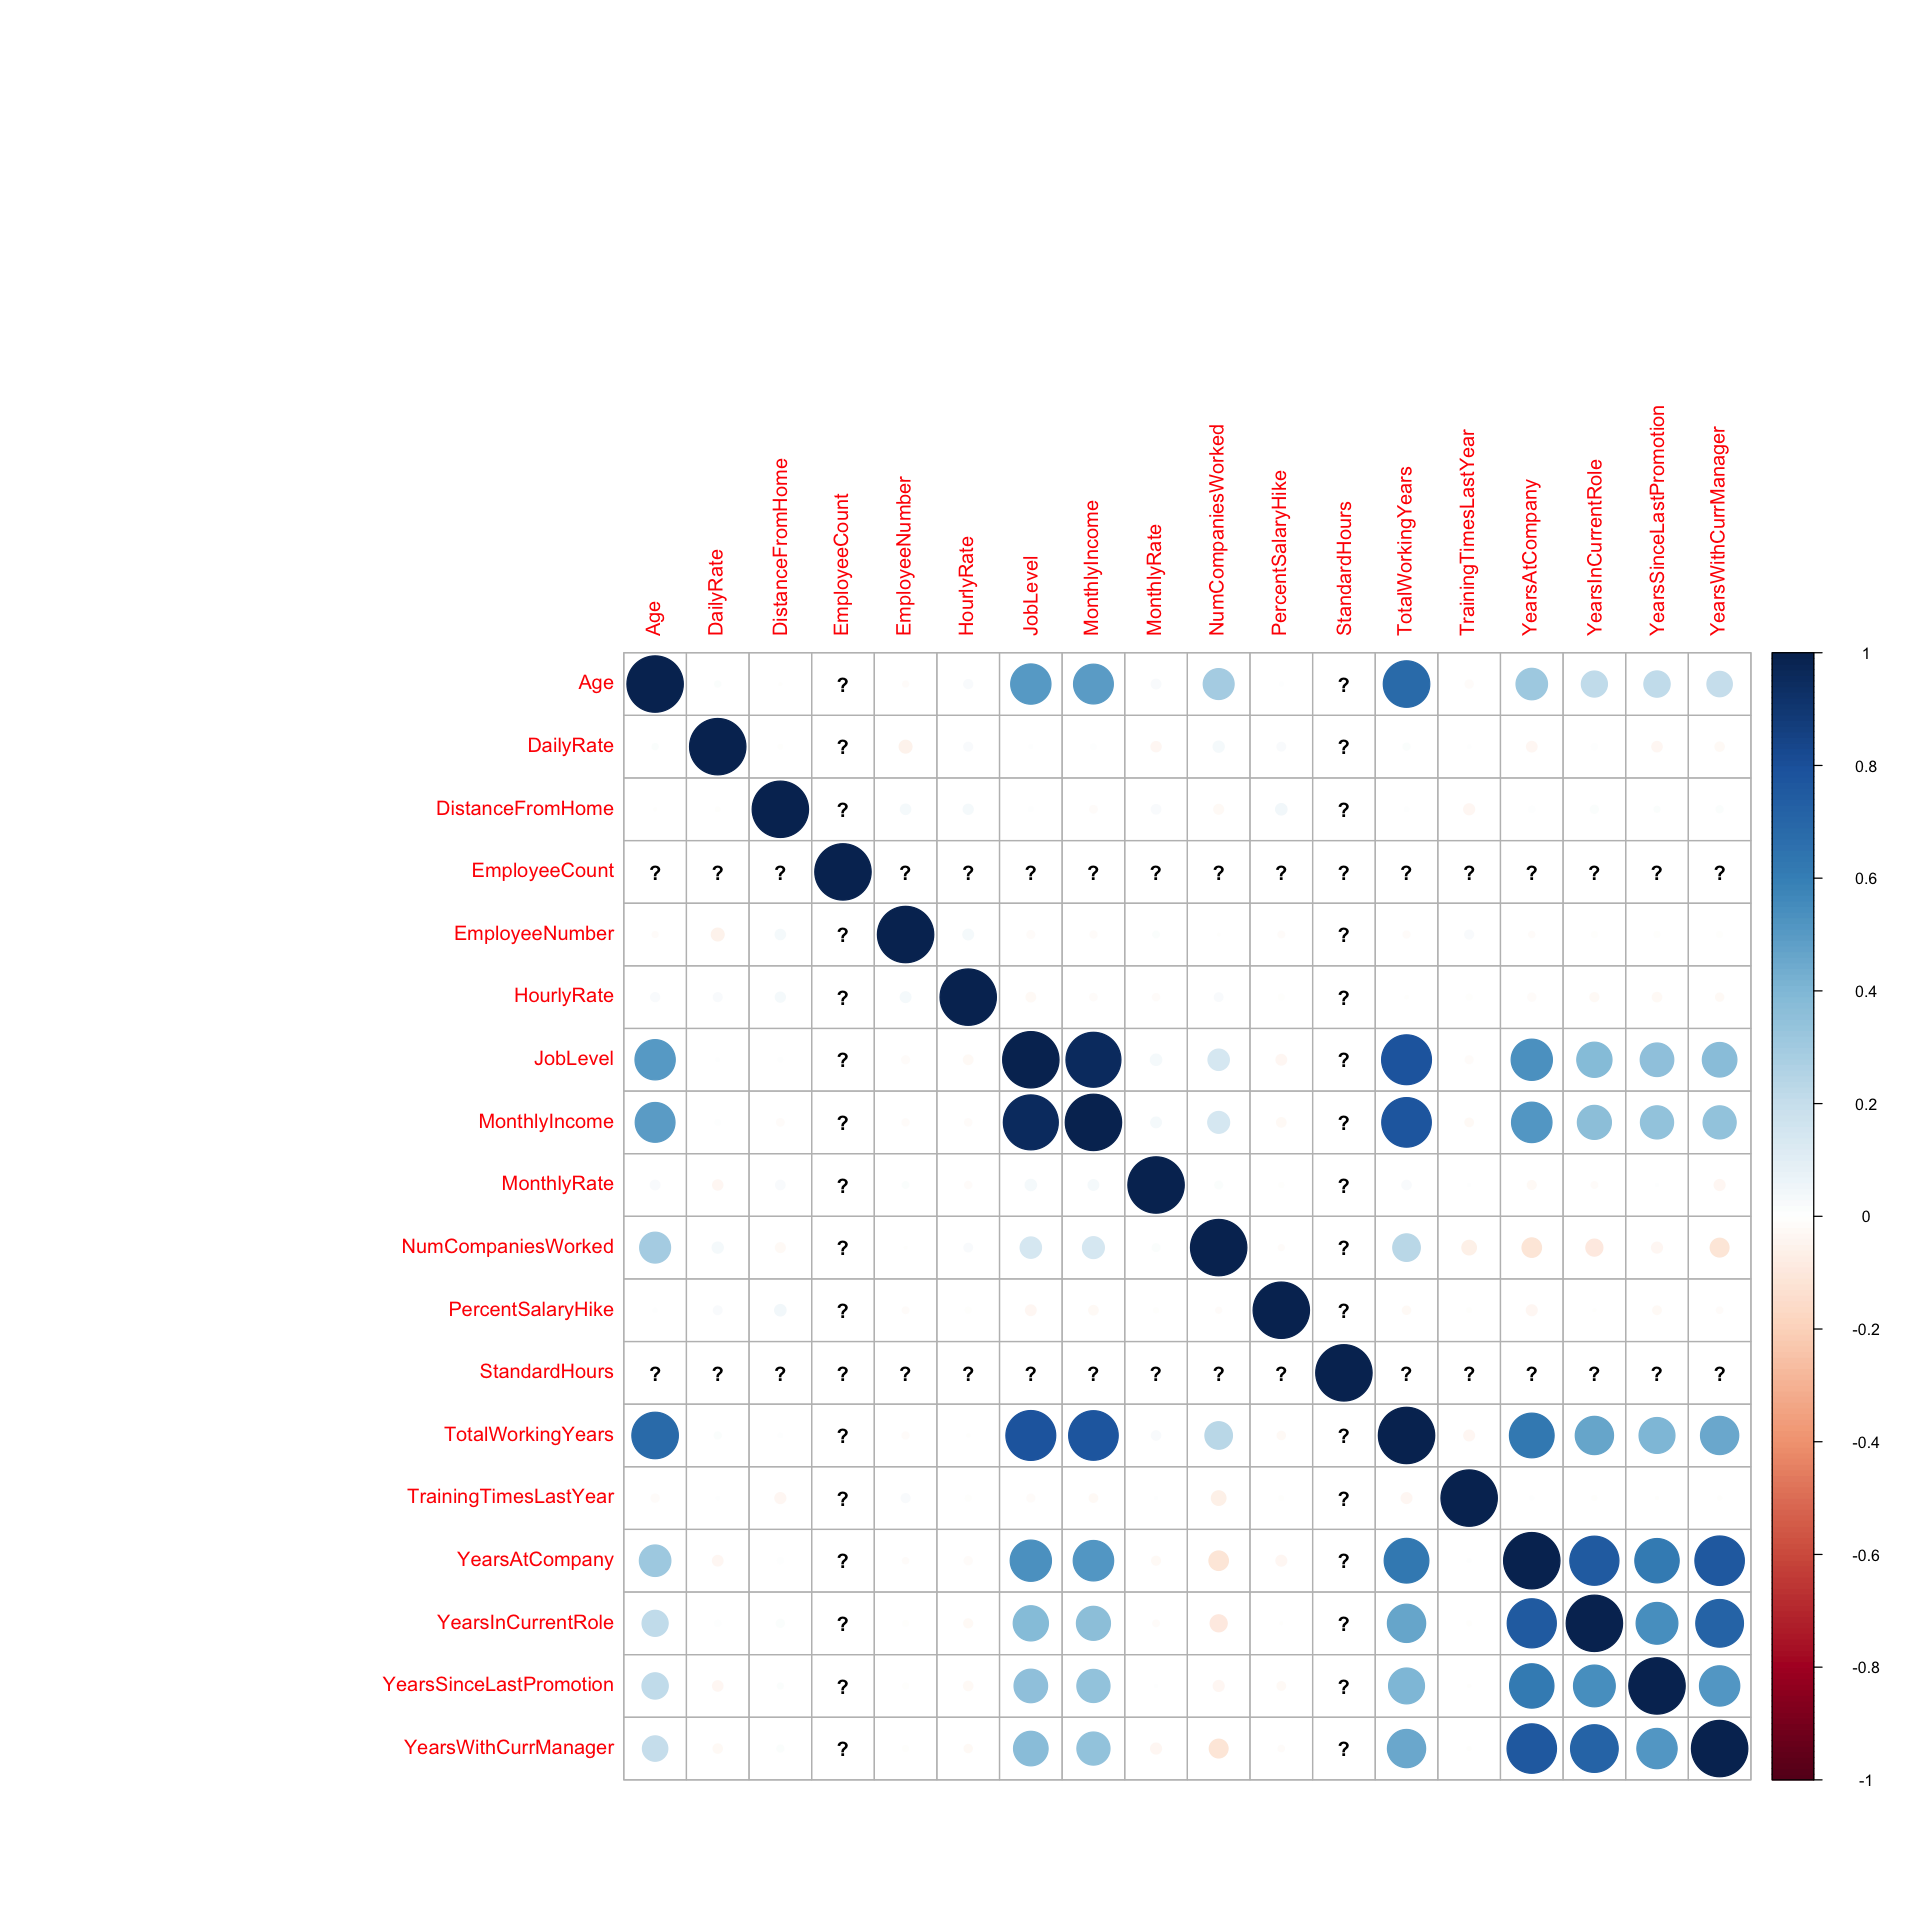

In [56]:
library(corrplot)

options(repr.plot.width = 16, repr.plot.height = 16)
num_data <- data[, sapply(data, is.numeric)]
stat.desc(num_data)
correlations <- cor(num_data)
corrplot(correlations, method="circle")

In [69]:
#options(repr.plot.width = 24, repr.plot.height = 12)
#par(mfrow=c(1,2))
#for(i in seq(1, length(num_data), 1)) {
#   hist(num_data[,i], main=names(num_data)[i], xlab = names(num_data)[i])
#}

In [70]:
cat_data <- data[, sapply(data, is.factor)]
summary(cat_data)

 Attrition           BusinessTravel                  Department  Education
 0:1233    Non-Travel       : 150   Human Resources       : 63   1:170    
 1: 237    Travel_Frequently: 277   Research & Development:961   2:282    
           Travel_Rarely    :1043   Sales                 :446   3:572    
                                                                 4:398    
                                                                 5: 48    
                                                                          
                                                                          
          EducationField EnvironmentSatisfaction    Gender    JobInvolvement
 Human Resources : 27    1:284                   Female:588   1: 83         
 Life Sciences   :606    2:287                   Male  :882   2:375         
 Marketing       :159    3:453                                3:868         
 Medical         :464    4:446                                4:144         
 Other         

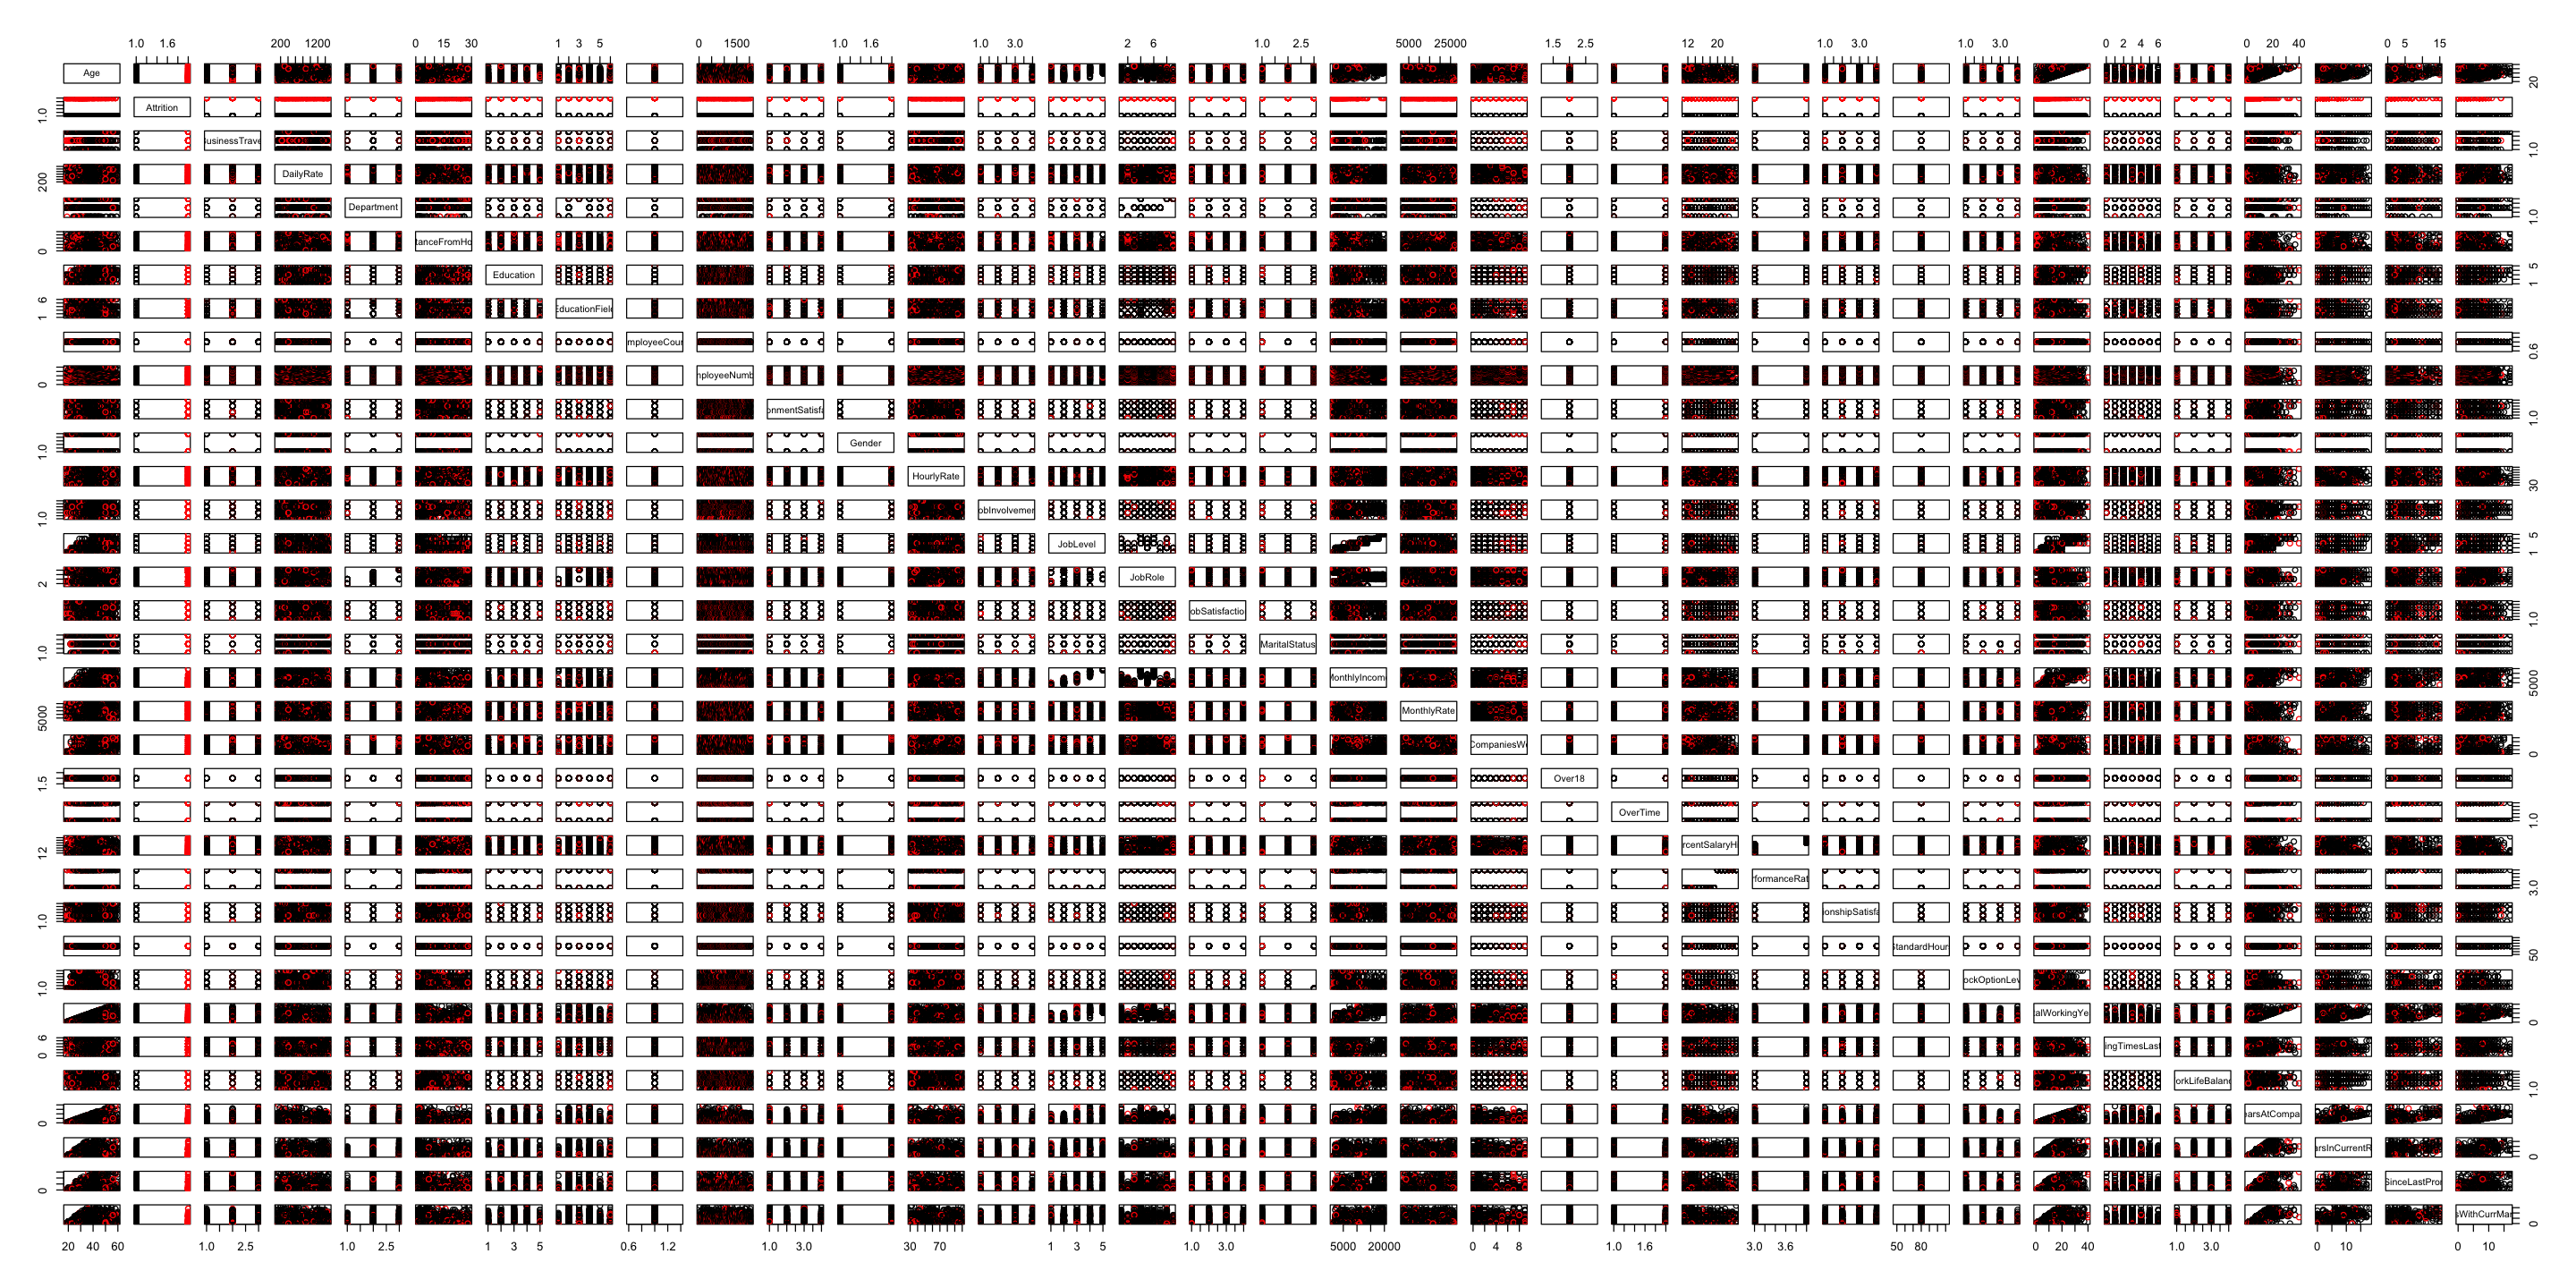

In [66]:
pairs(data, col=data$Attrition)

In [5]:
#x <- num_data
#y <- data[,2]
#scales <- list(x=list(relation="free"), y=list(relation="free"))
#featurePlot(x=x, y=y, plot="density", scales=scales)

install.packages("ggplot2", dependencies = TRUE)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)


The downloaded binary packages are in
	/var/folders/18/w20ckn5s55vdc8sh24xkf5d80000gp/T//RtmpmxINCj/downloaded_packages


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


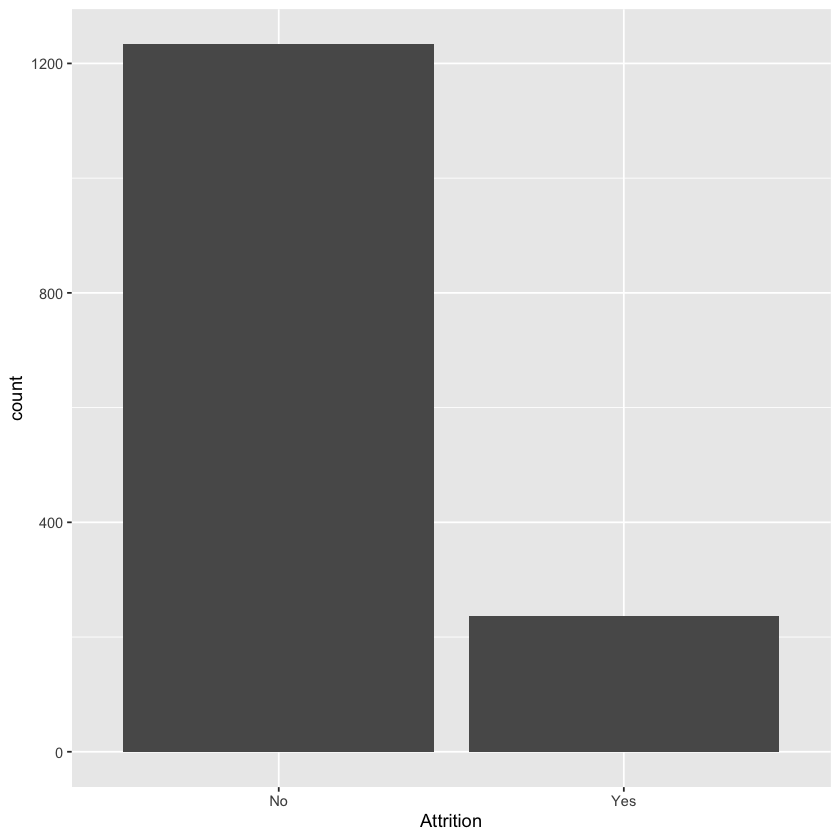

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


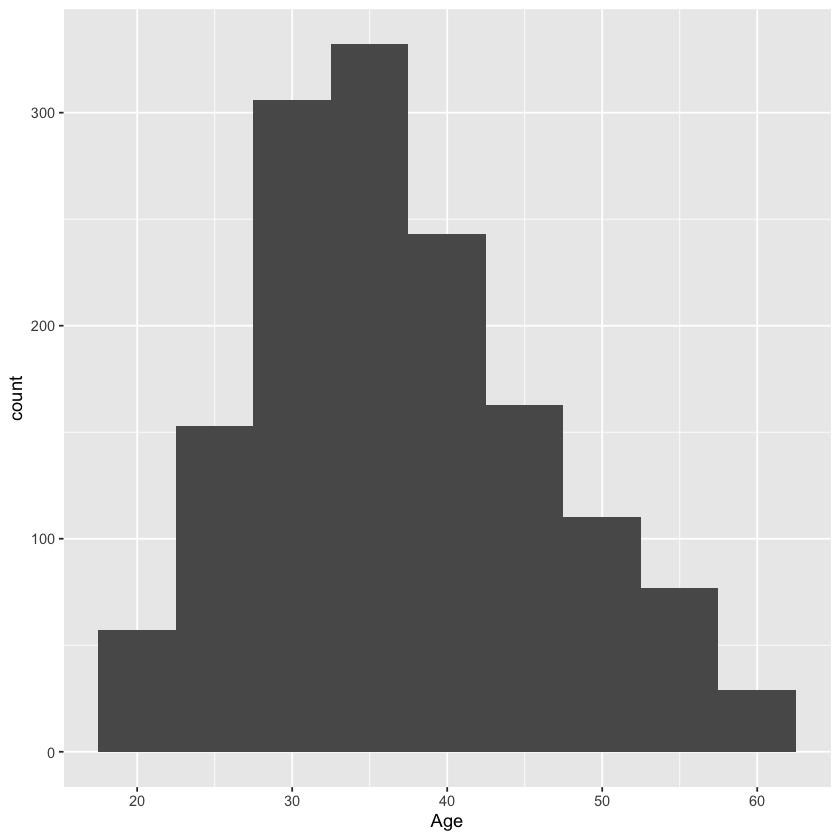

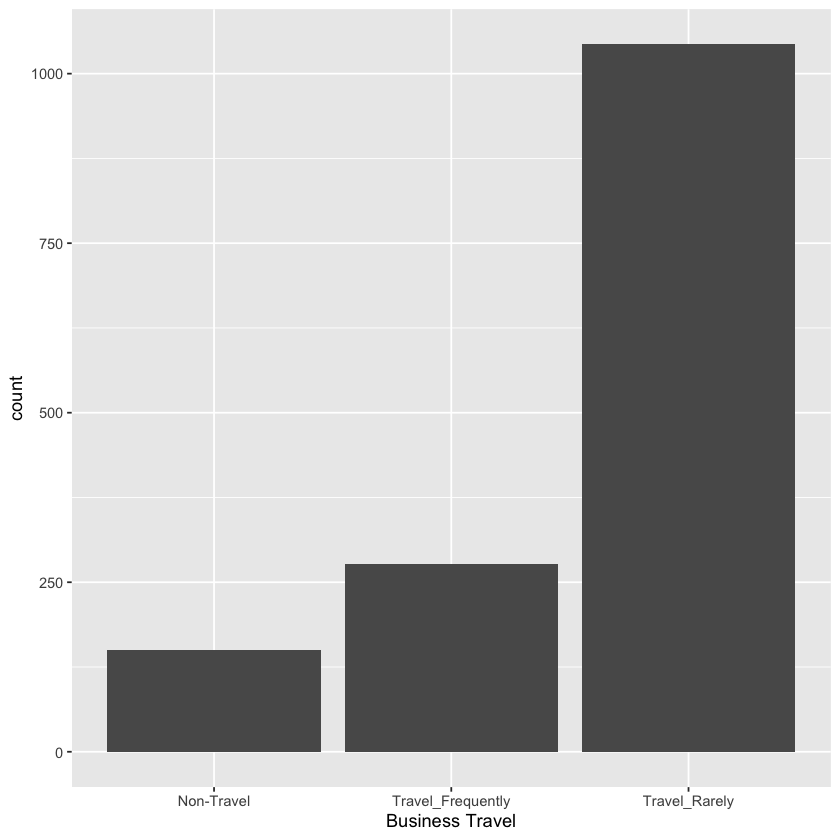

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


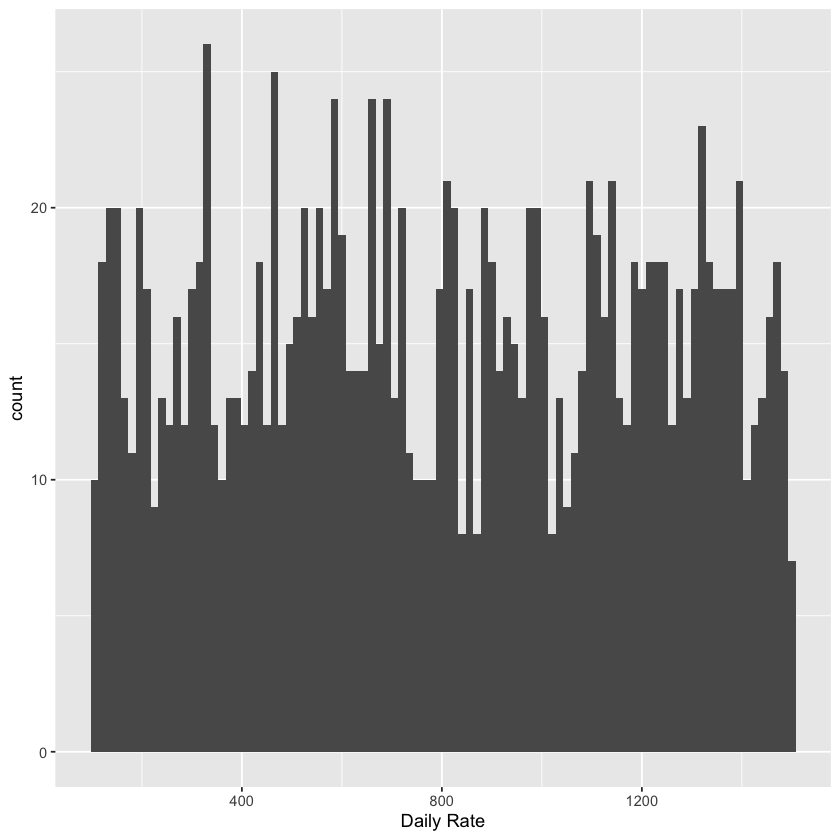

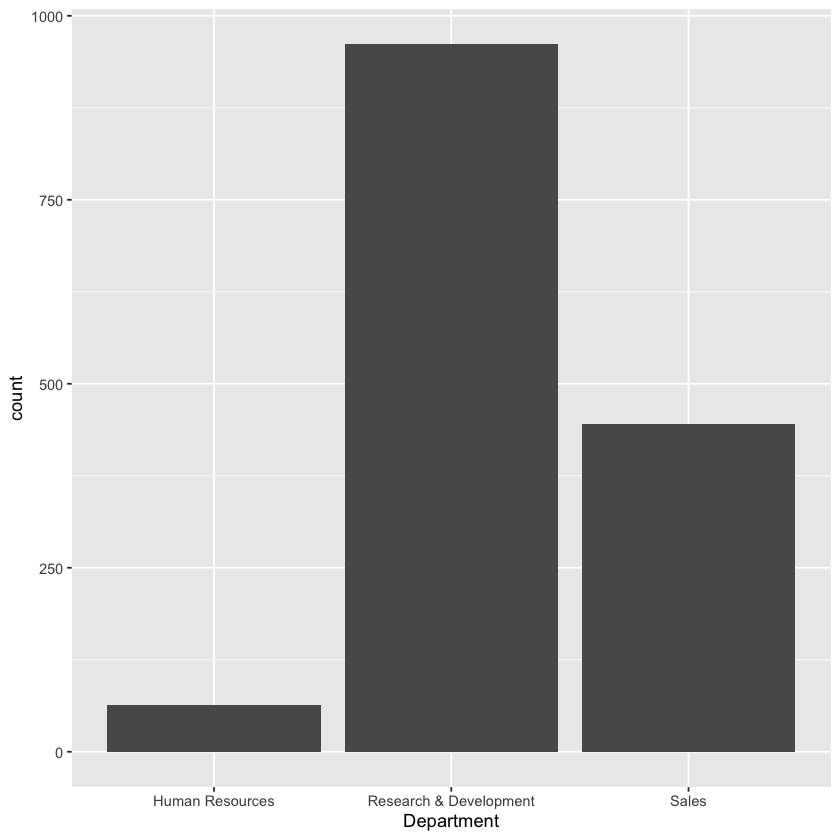

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


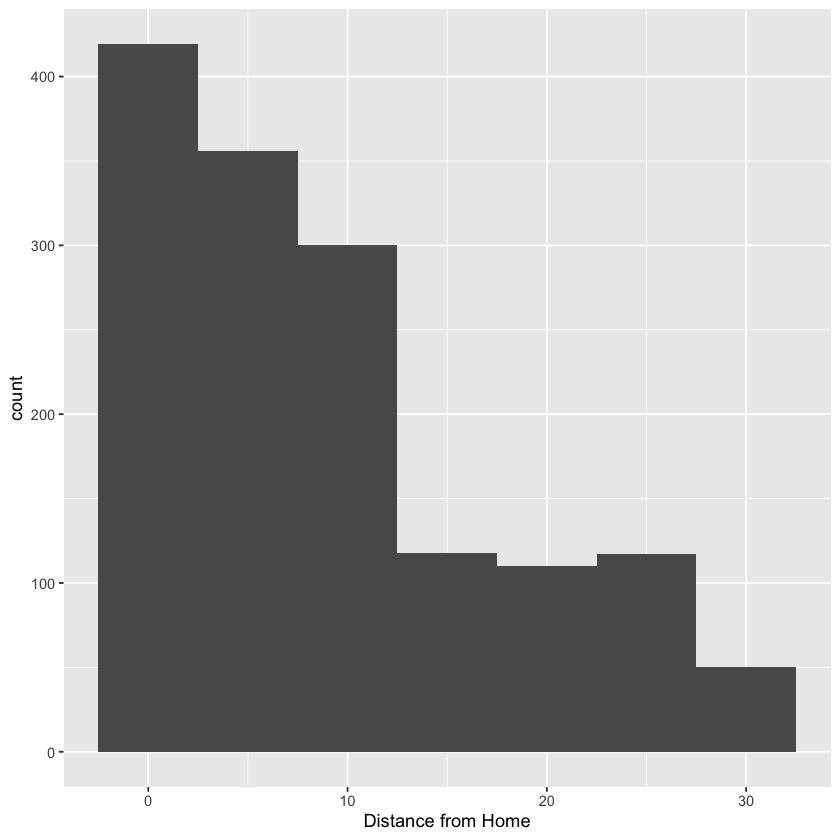

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


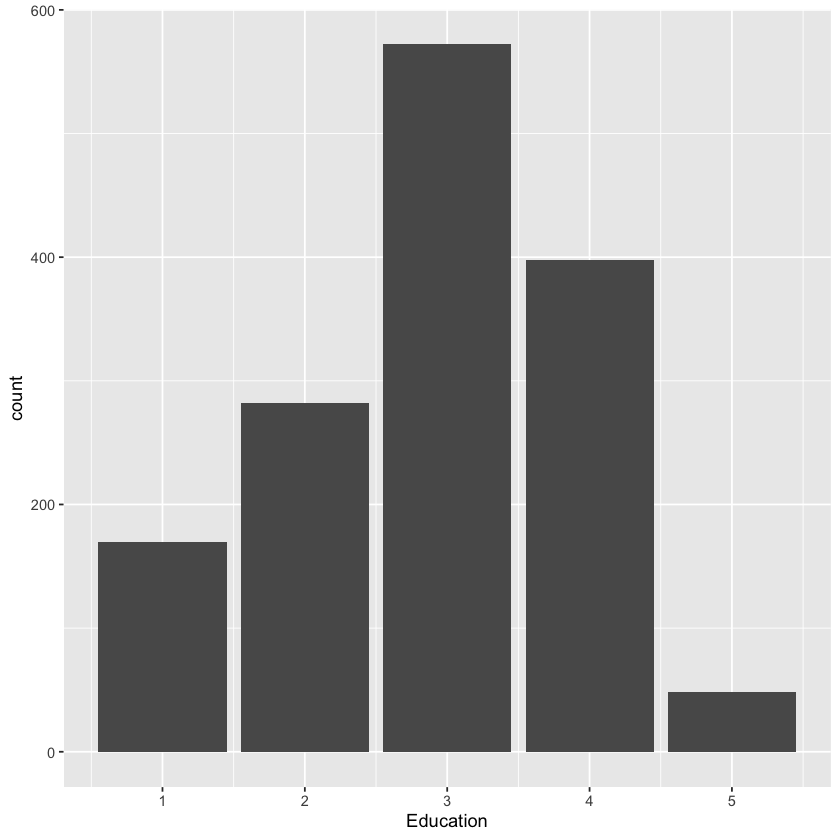

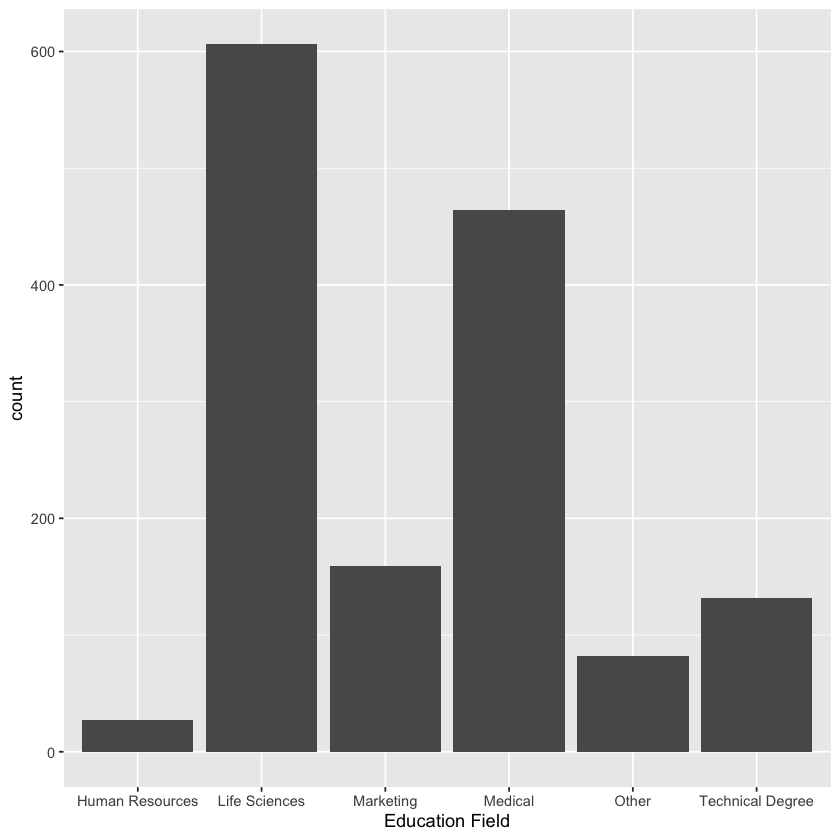

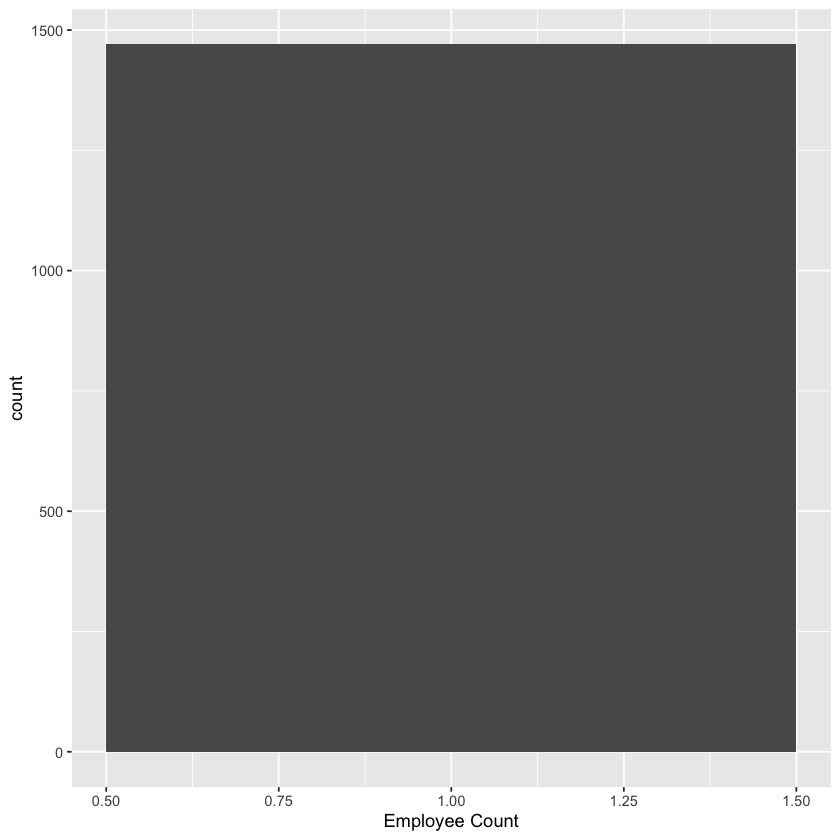

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


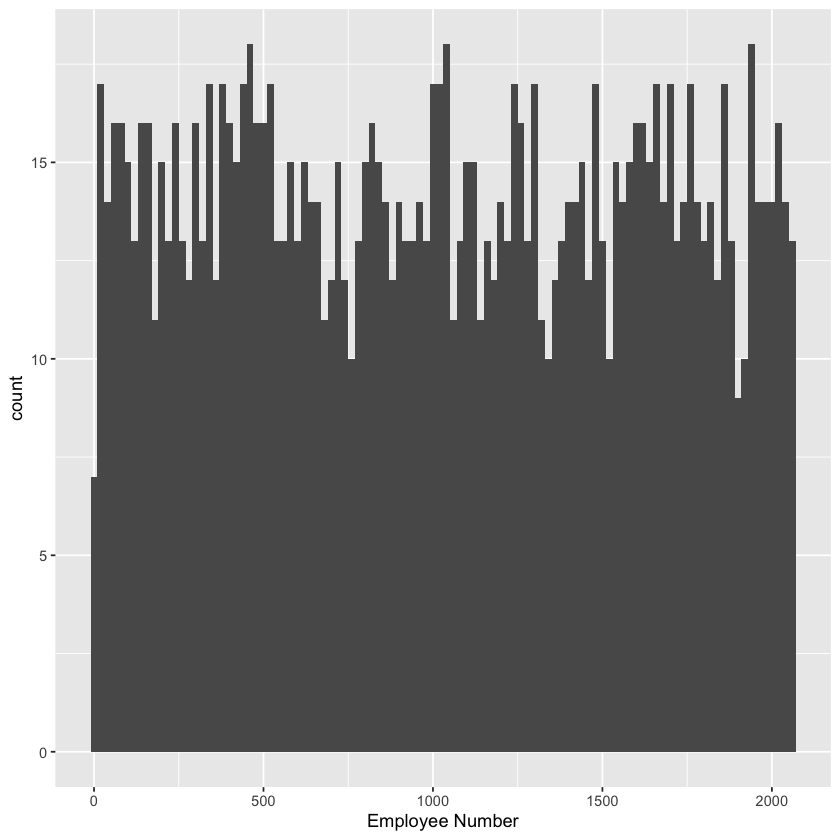

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


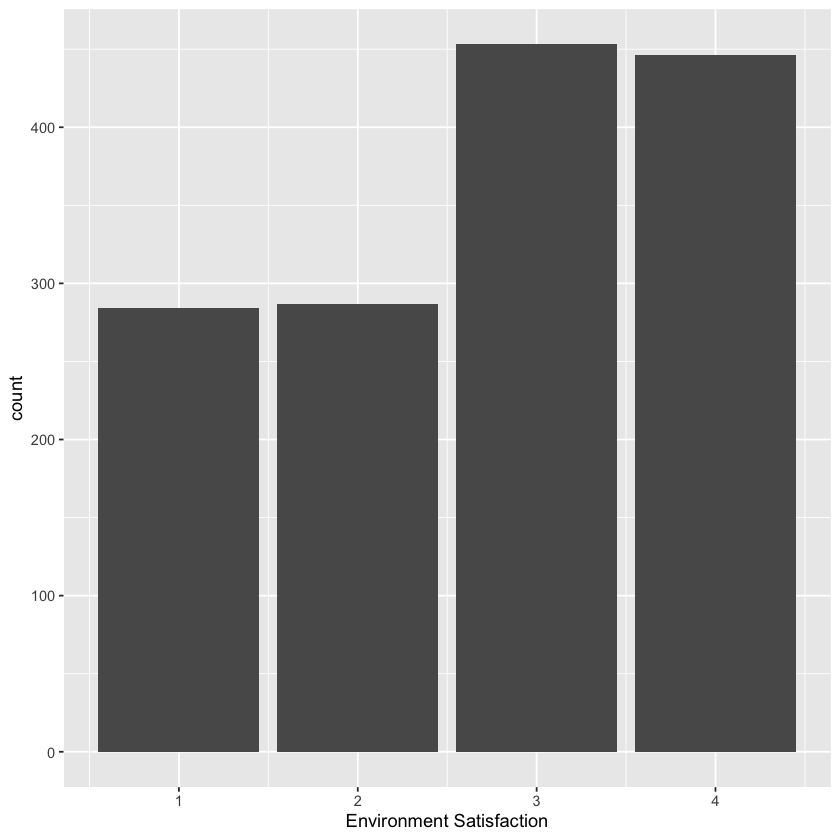

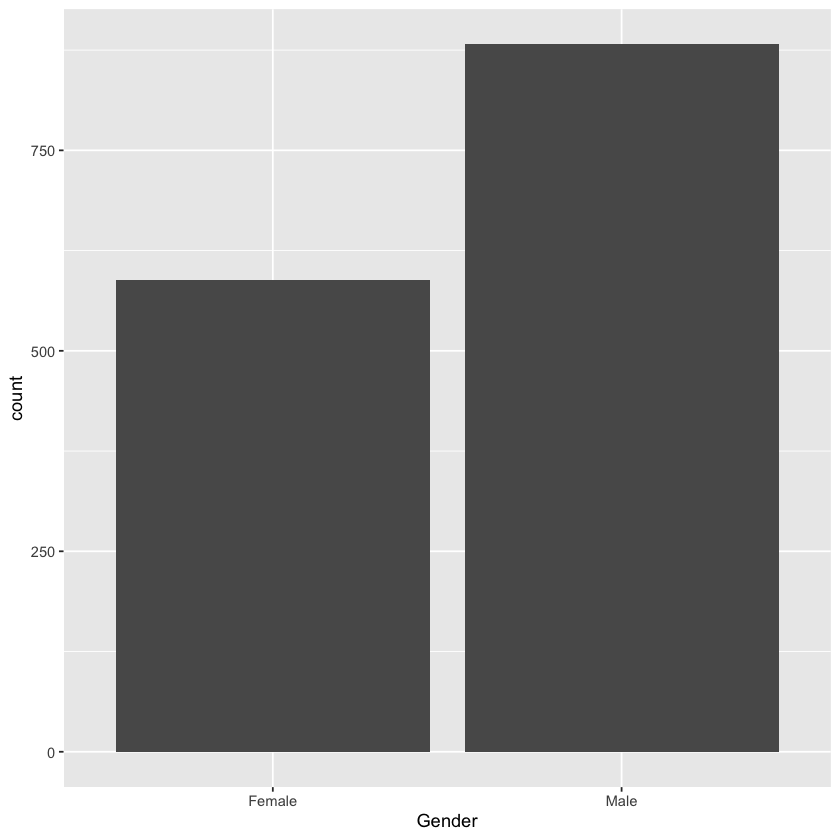

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


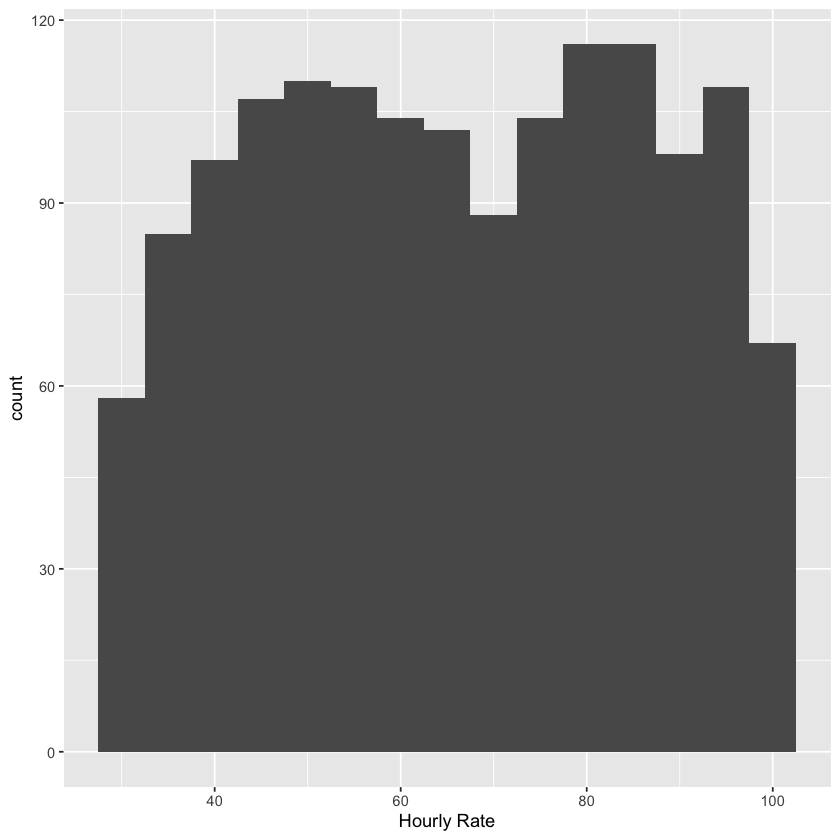

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


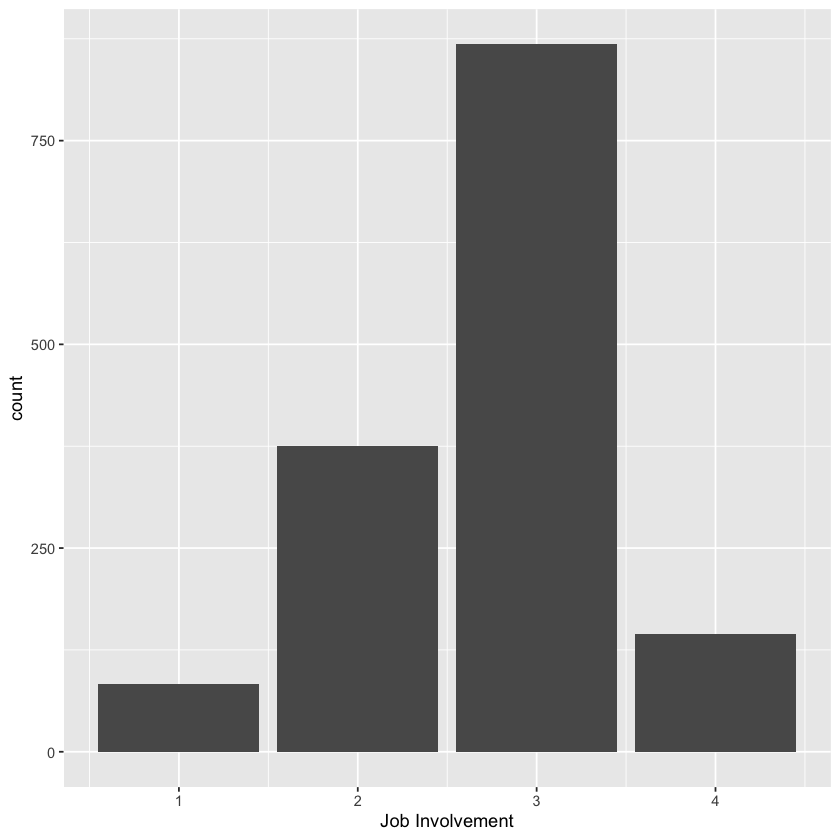

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


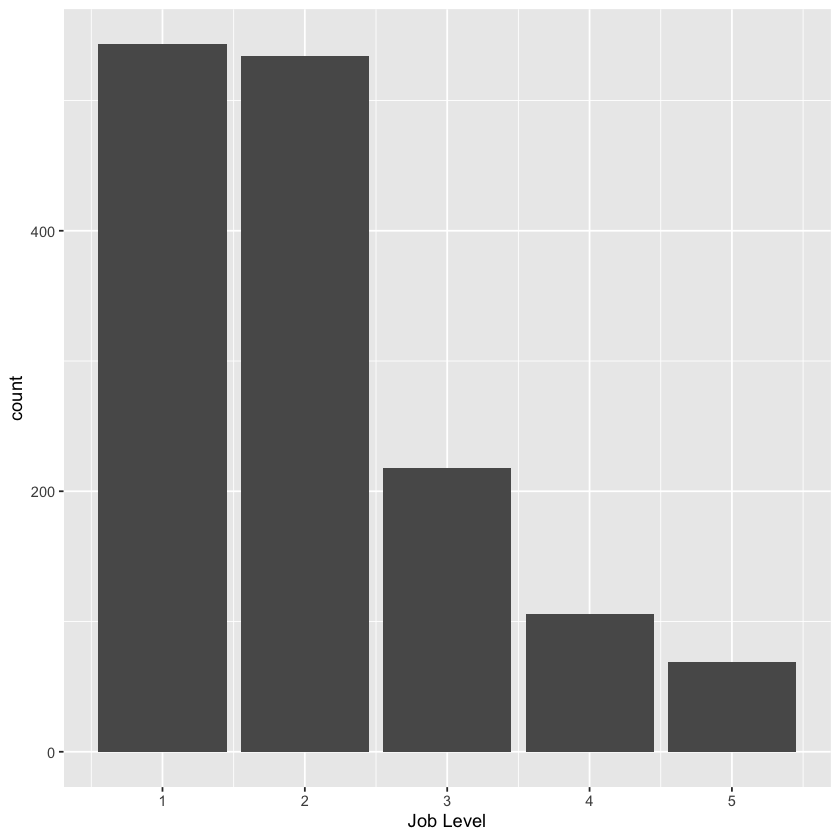

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


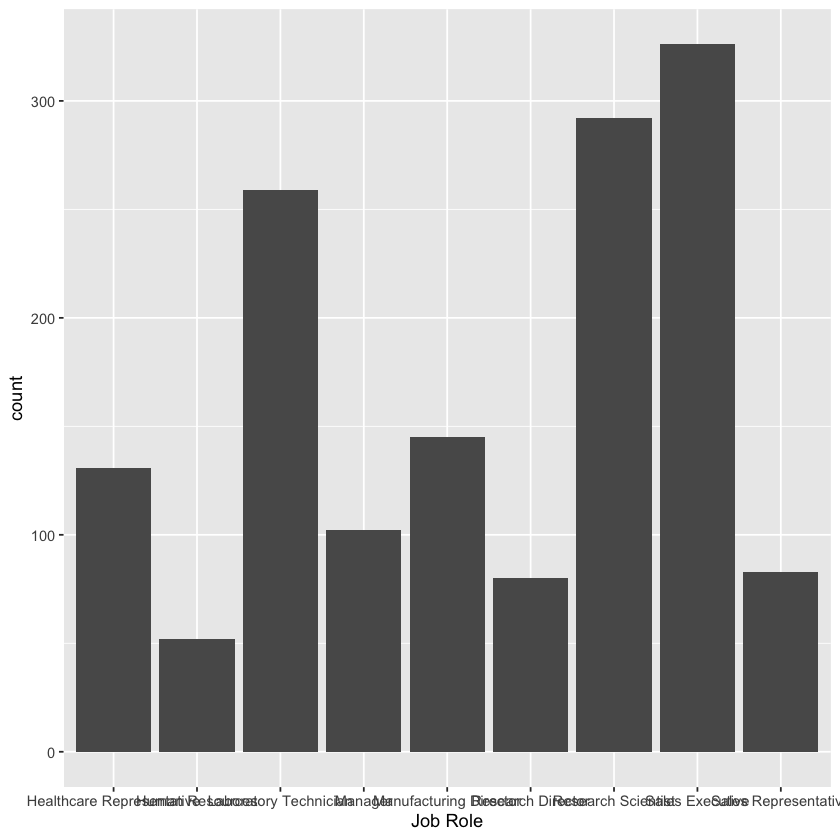

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


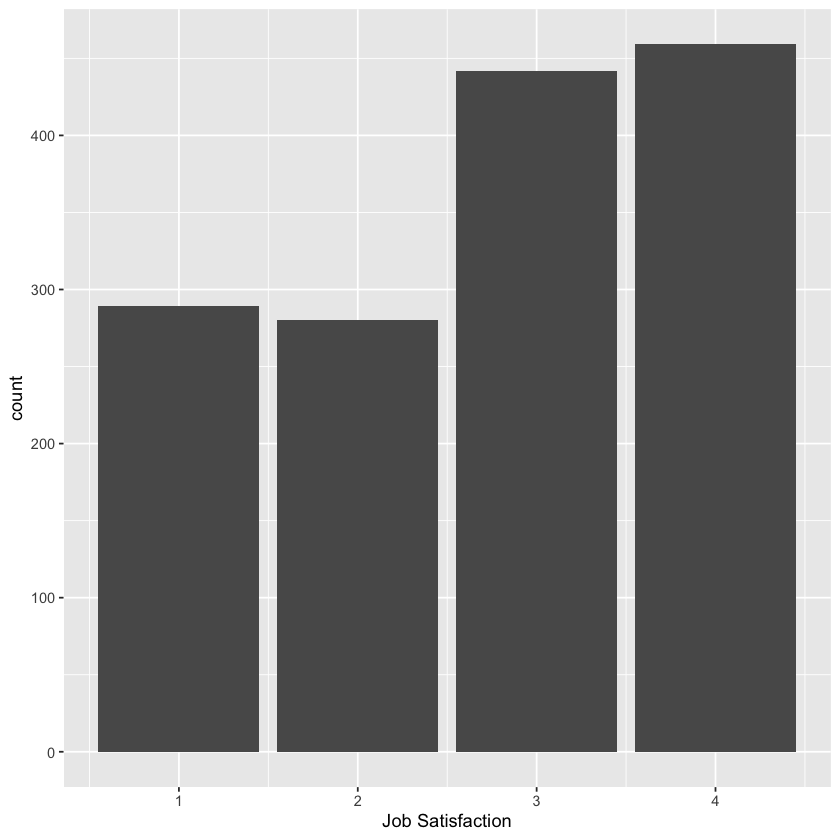

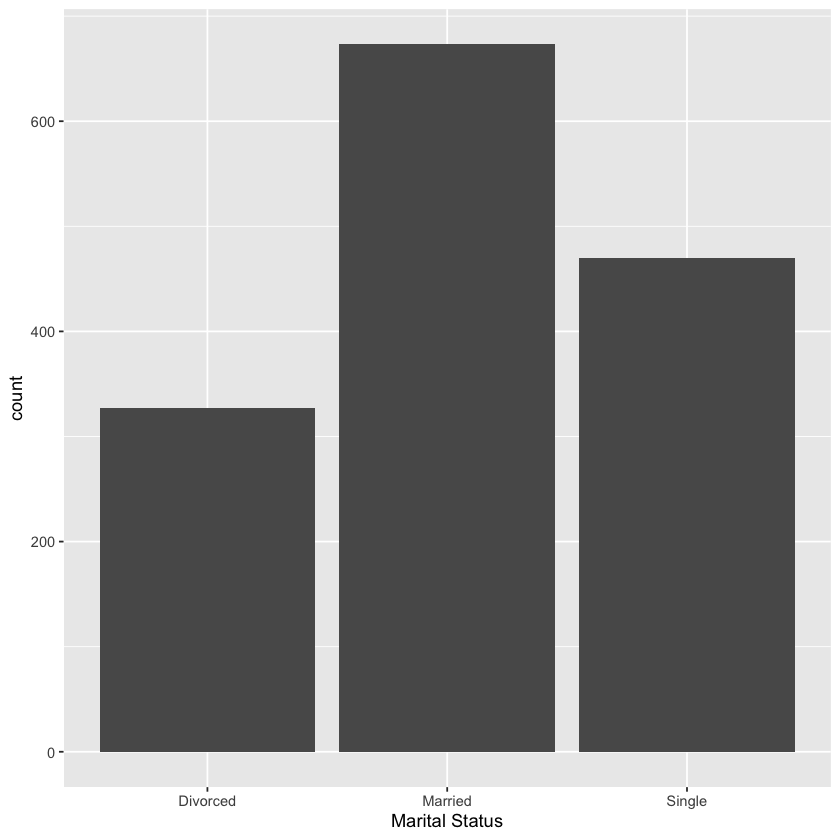

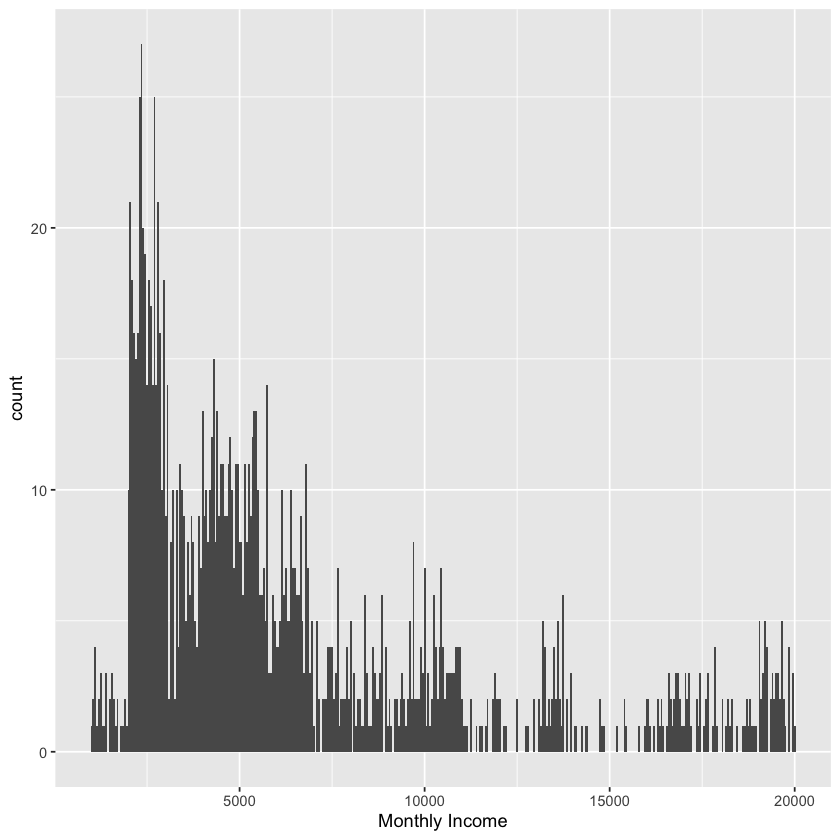

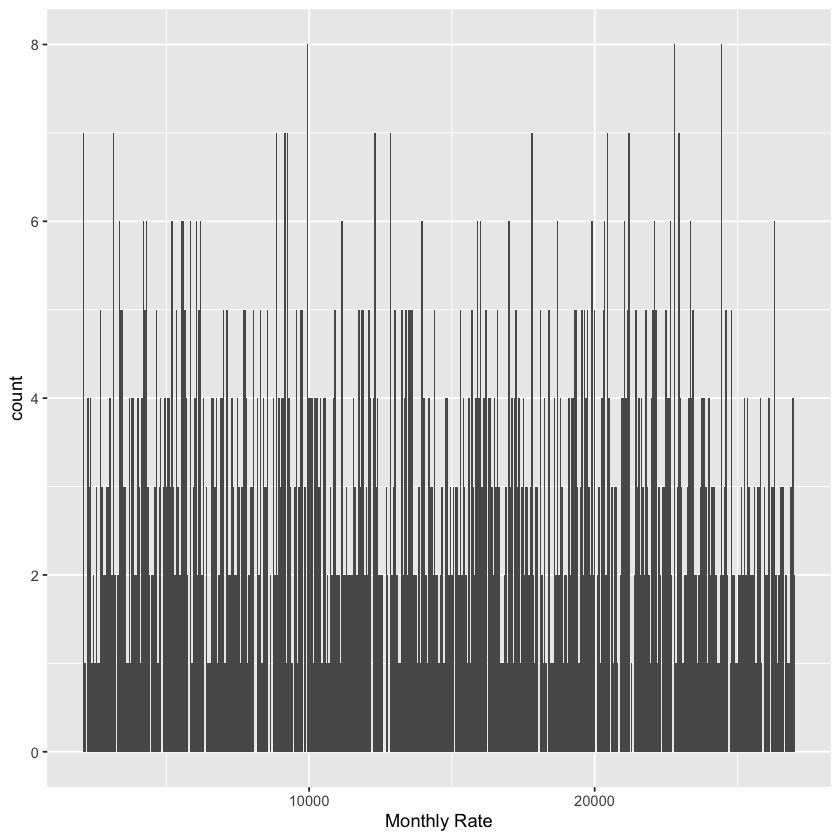

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


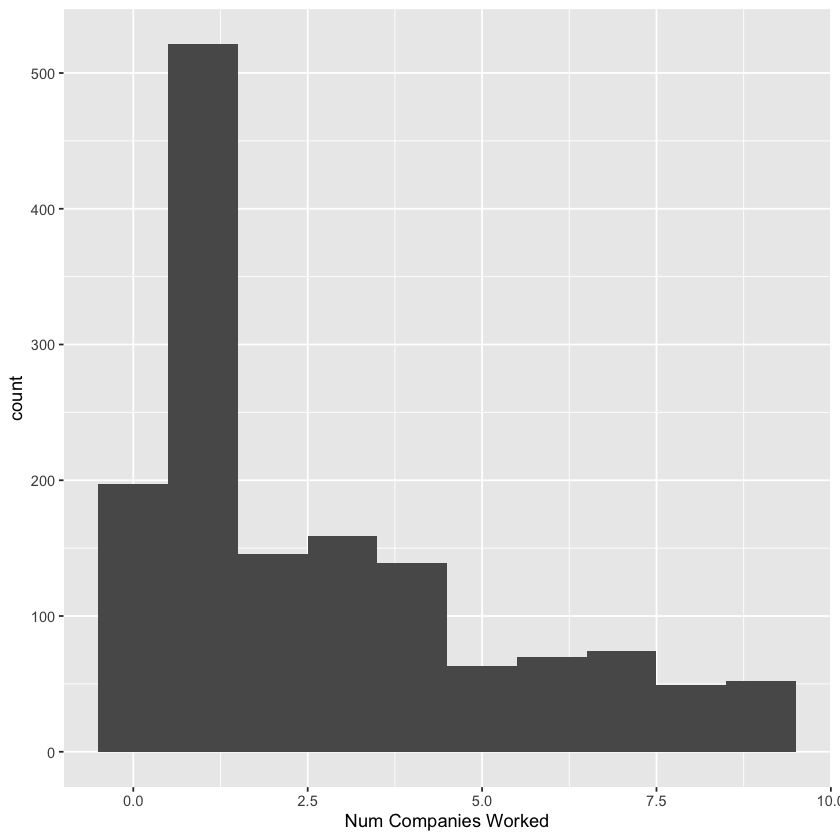

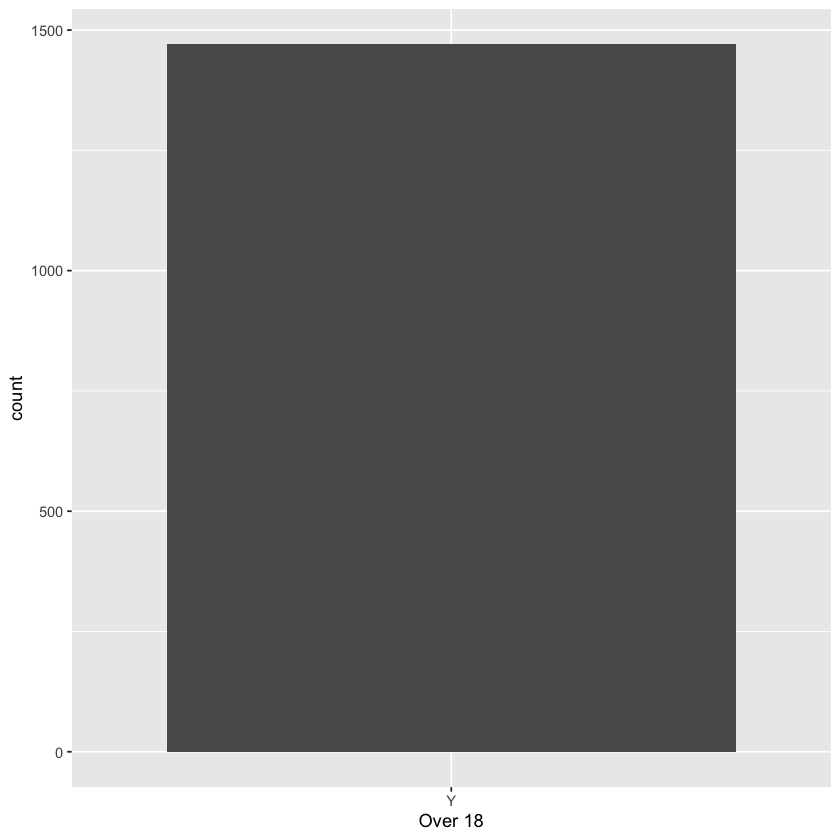

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


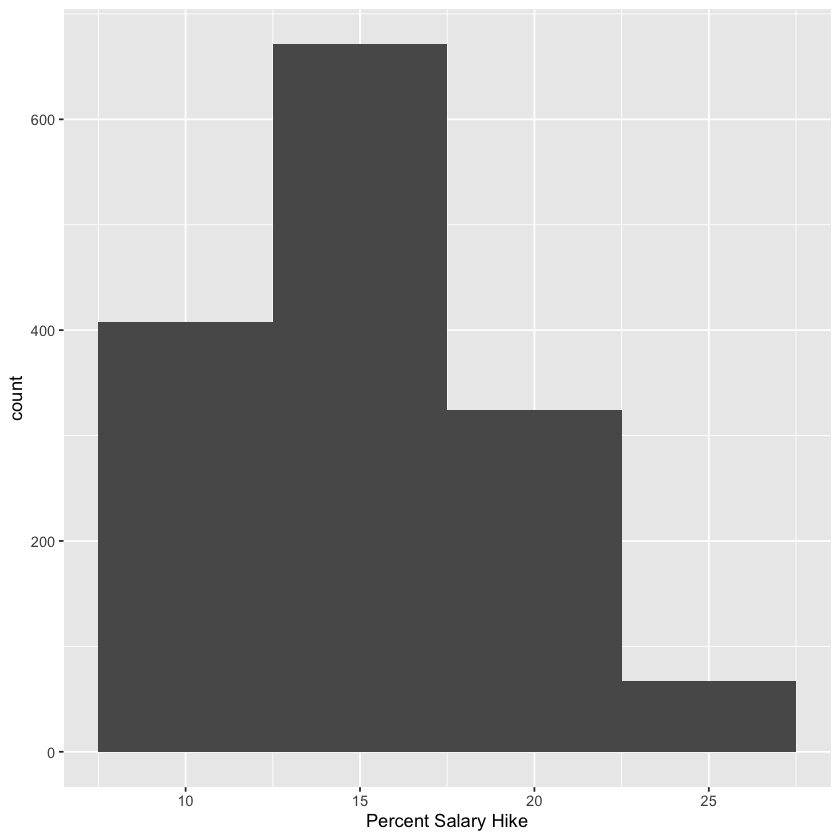

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


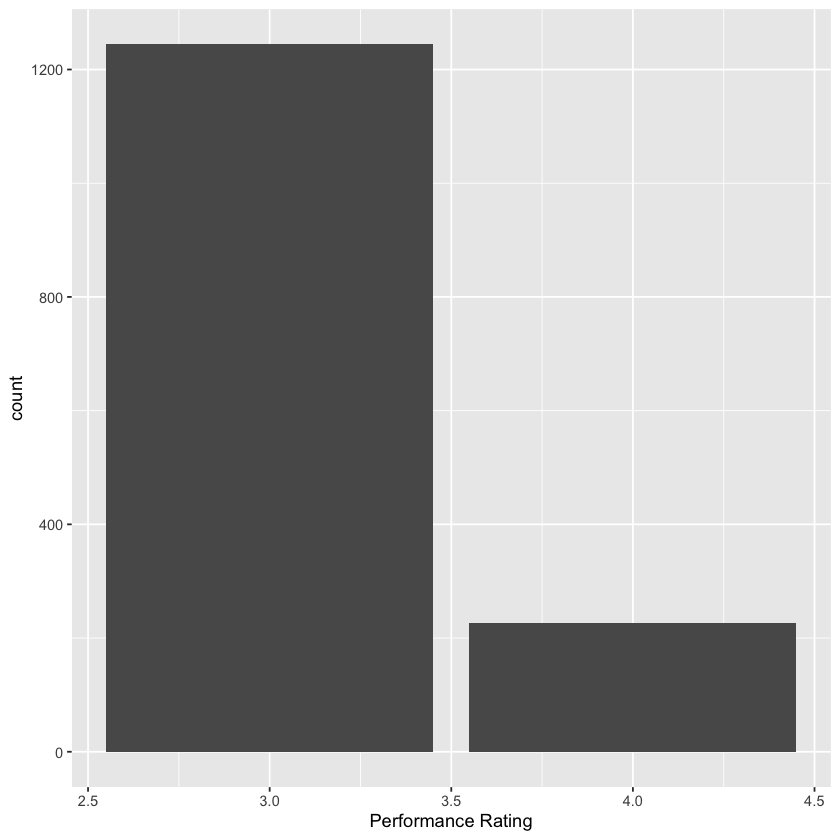

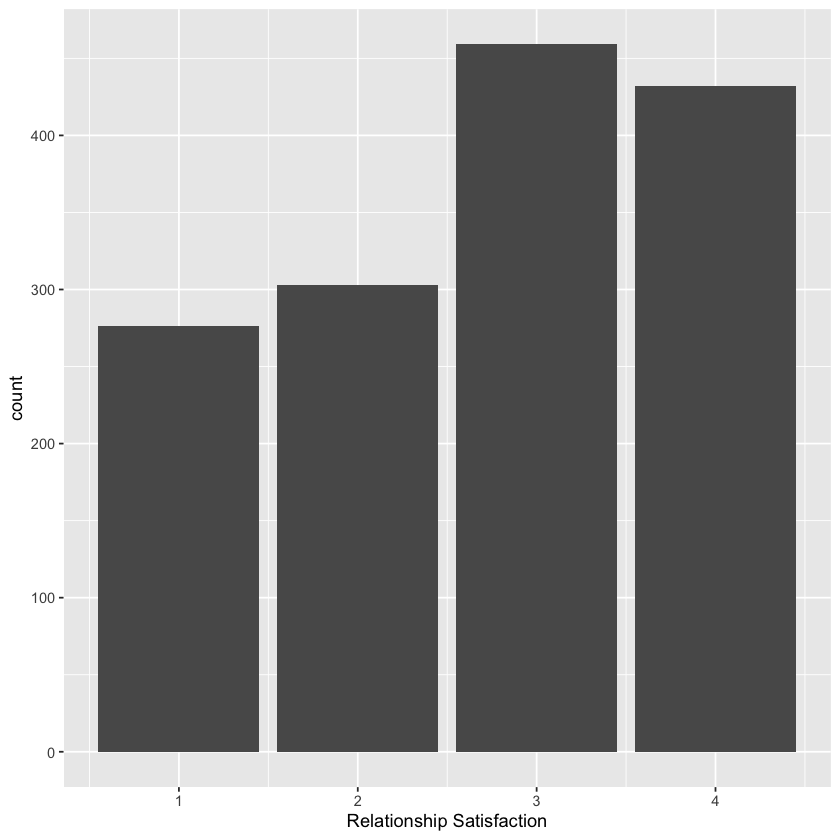

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


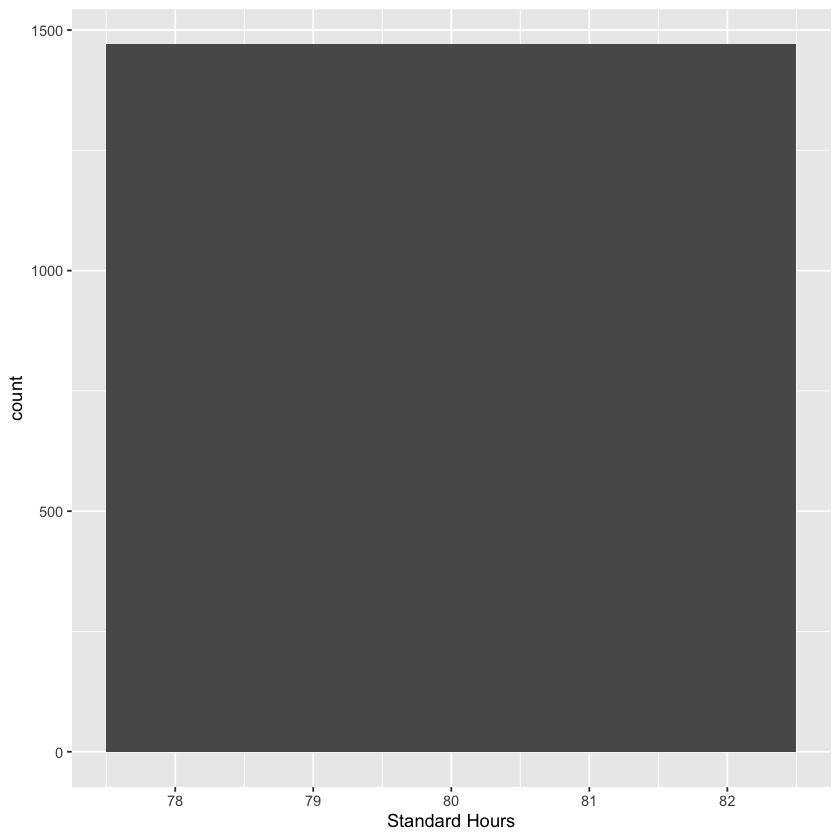

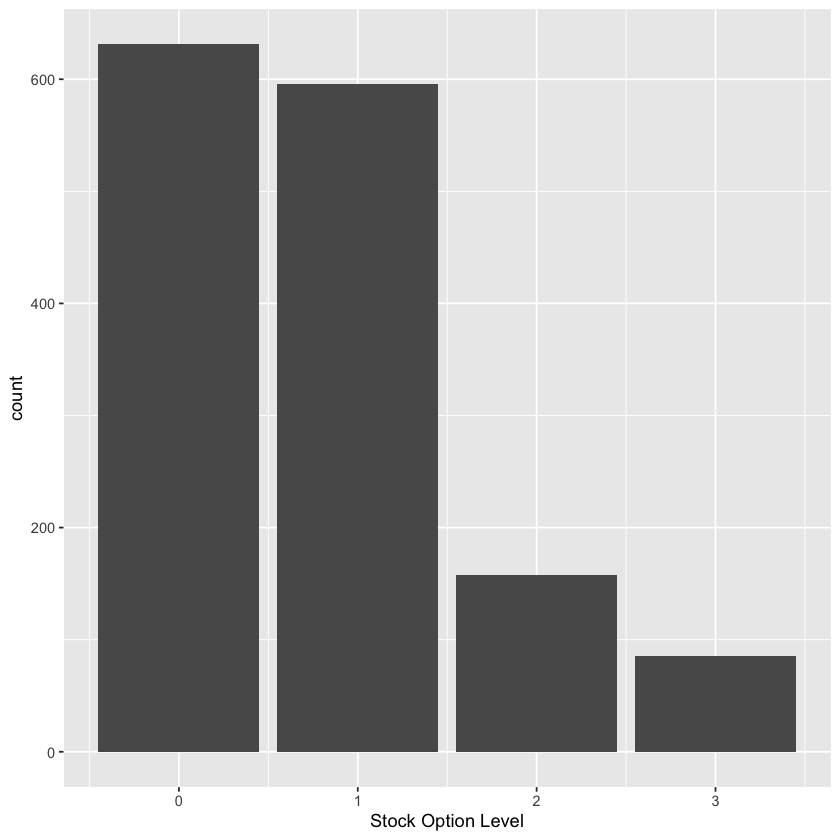

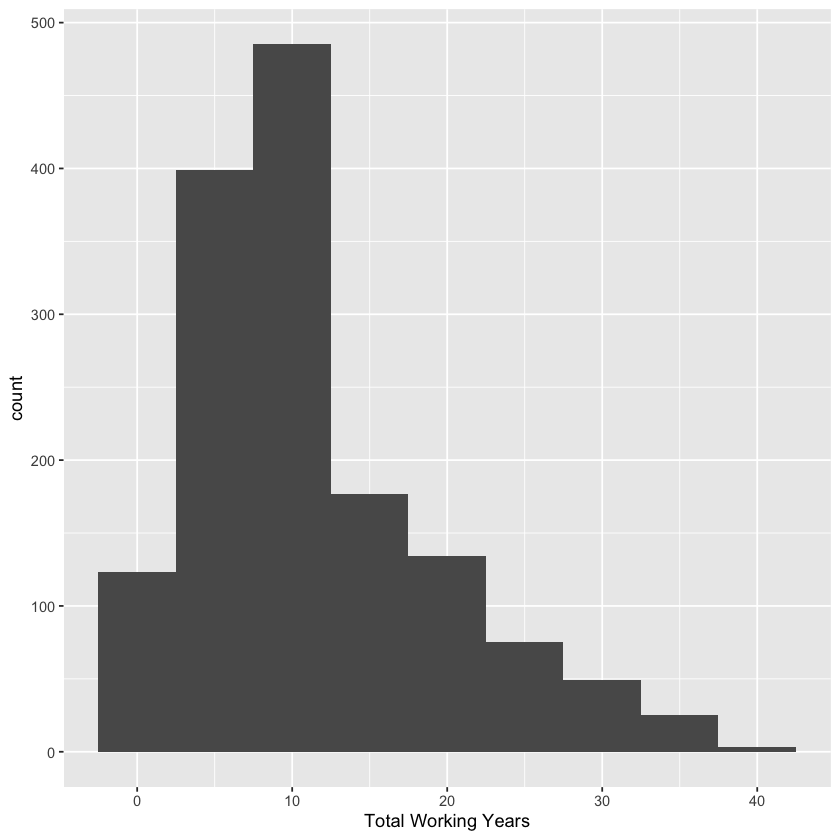

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


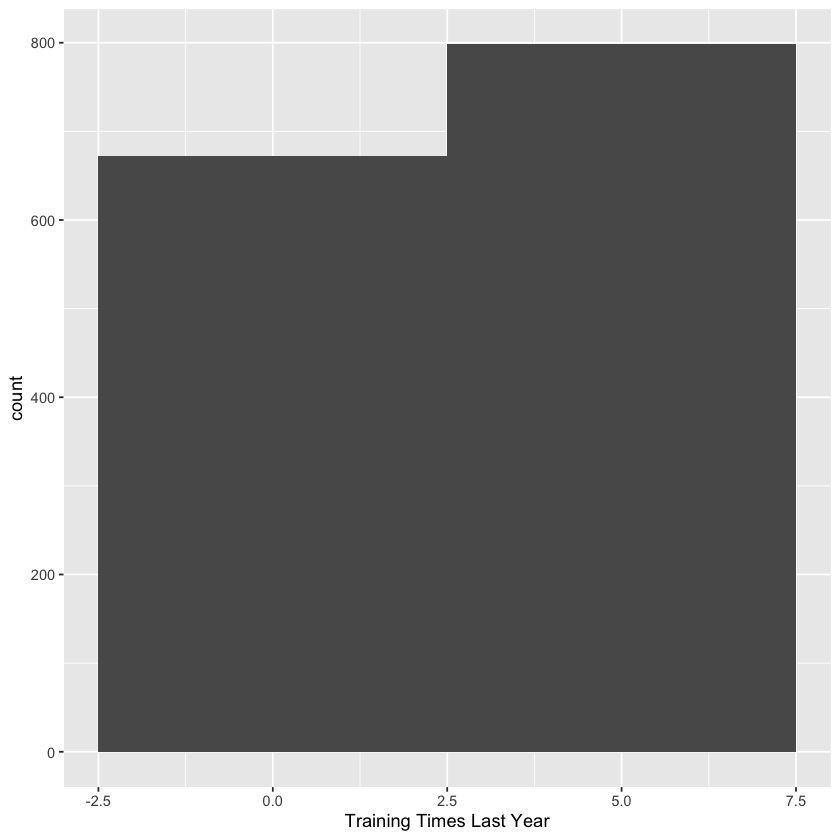

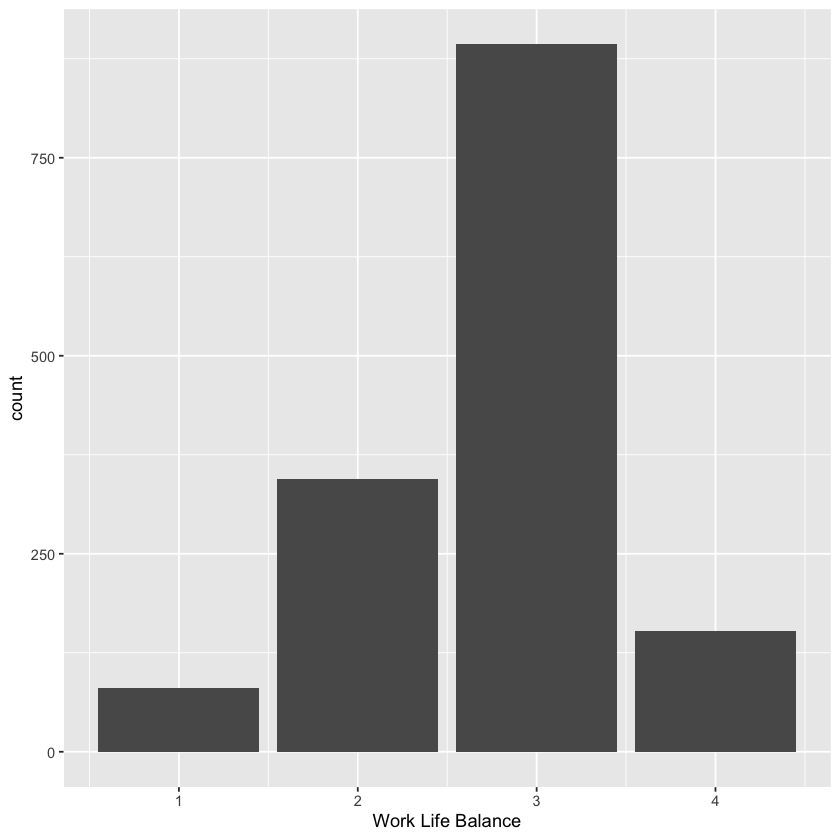

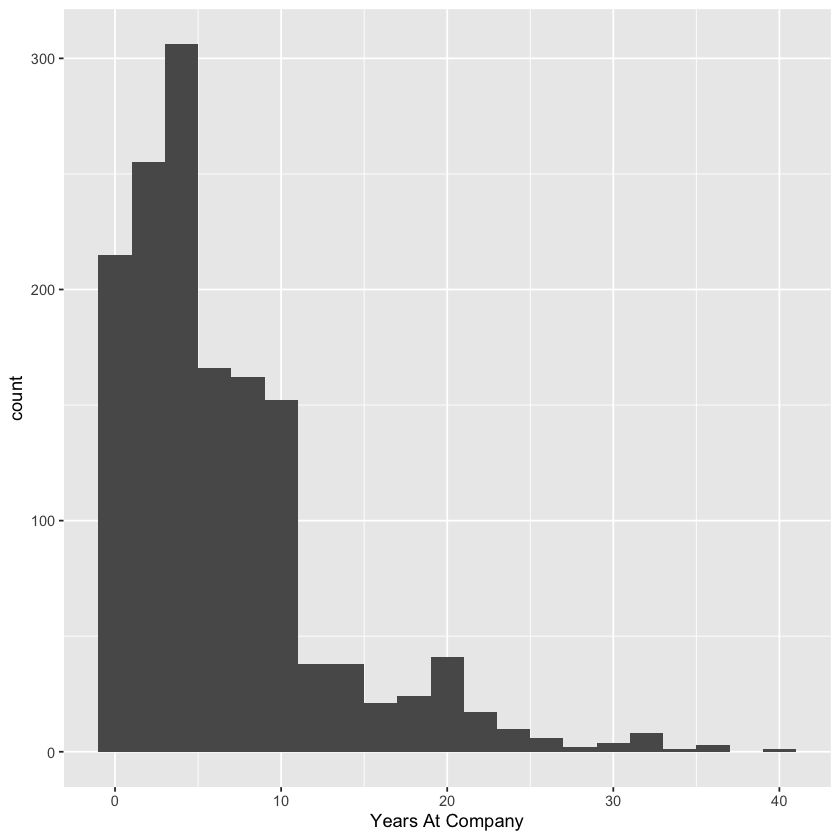

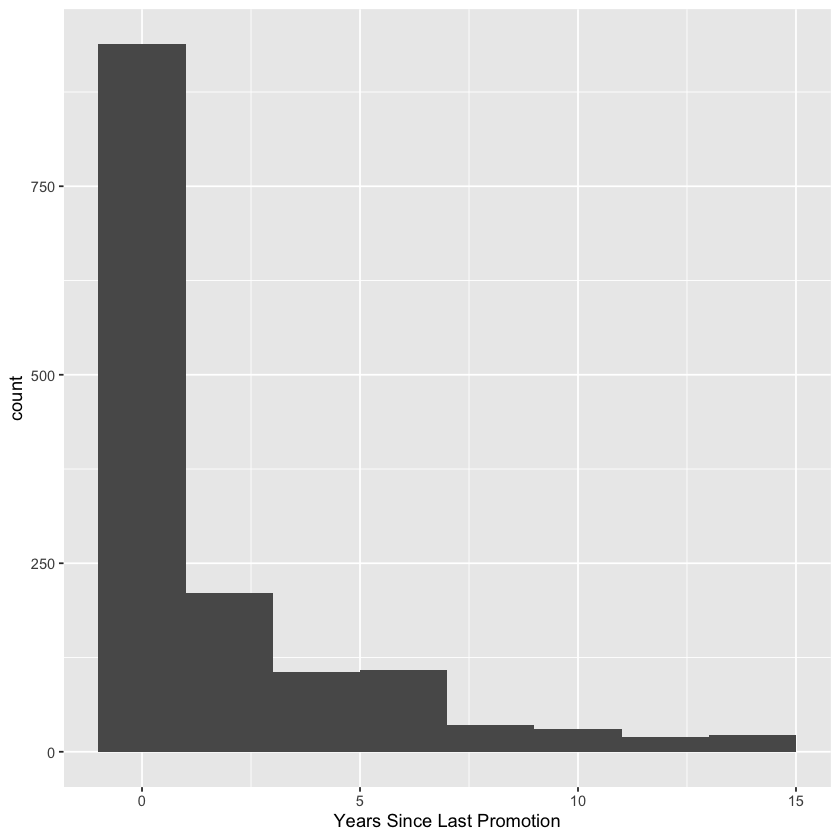

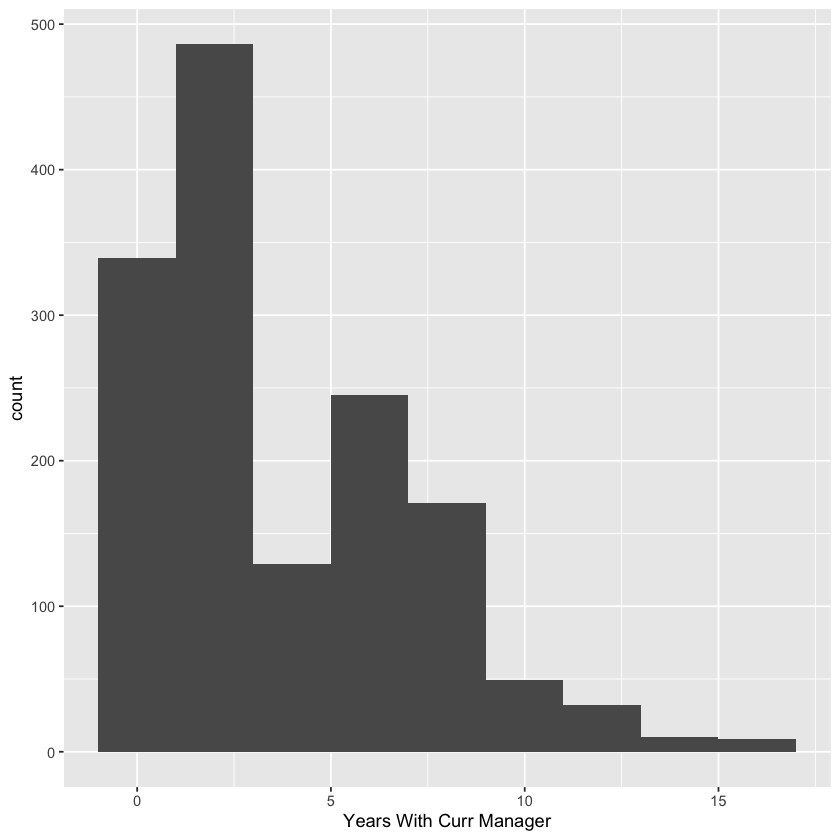

In [59]:
ggplot(data=data, aes(Attrition)) + geom_histogram(stat="count") + labs(x="Attrition")
ggplot(data=data, aes(Age)) + geom_histogram(binwidth=5) + labs(x="Age")
ggplot(data=data, aes(BusinessTravel)) + geom_histogram(stat="count") + labs(x="Business Travel")
ggplot(data=data, aes(DailyRate)) + geom_histogram(binwidth=15) + labs(x="Daily Rate")
ggplot(data=data, aes(Department)) + geom_histogram(stat="count") + labs(x="Department")
ggplot(data=data, aes(DistanceFromHome)) + geom_histogram(binwidth=5) + labs(x="Distance from Home")
ggplot(data=data, aes(Education)) + geom_histogram(stat="count") + labs(x="Education")
ggplot(data=data, aes(EducationField)) + geom_histogram(stat="count") + labs(x="Education Field")
ggplot(data=data, aes(EmployeeCount)) + geom_histogram(binwidth=1) + labs(x="Employee Count")
ggplot(data=data, aes(EmployeeNumber)) + geom_histogram(binwidth=20) + labs(x="Employee Number")
ggplot(data=data, aes(EnvironmentSatisfaction)) + geom_histogram(stat="count") + labs(x="Environment Satisfaction")
ggplot(data=data, aes(Gender)) + geom_histogram(stat="count") + labs(x="Gender")
ggplot(data=data, aes(HourlyRate)) + geom_histogram(binwidth=5) + labs(x="Hourly Rate")
ggplot(data=data, aes(JobInvolvement)) + geom_histogram(stat="count") + labs(x="Job Involvement")
ggplot(data=data, aes(JobLevel)) + geom_histogram(stat="count") + labs(x="Job Level")
ggplot(data=data, aes(JobRole)) + geom_histogram(stat="count") + labs(x="Job Role")
ggplot(data=data, aes(JobSatisfaction)) + geom_histogram(stat="count") + labs(x="Job Satisfaction")
ggplot(data=data, aes(MaritalStatus)) + geom_histogram(stat="count") + labs(x="Marital Status")
ggplot(data=data, aes(MonthlyIncome)) + geom_histogram(binwidth=50) + labs(x="Monthly Income")
ggplot(data=data, aes(MonthlyRate)) + geom_histogram(binwidth=50) + labs(x="Monthly Rate")
ggplot(data=data, aes(NumCompaniesWorked)) + geom_histogram(binwidth=1) + labs(x="Num Companies Worked")
ggplot(data=data, aes(Over18)) + geom_histogram(stat="count") + labs(x="Over 18")
ggplot(data=data, aes(PercentSalaryHike)) + geom_histogram(binwidth=5) + labs(x="Percent Salary Hike")
ggplot(data=data, aes(PerformanceRating)) + geom_histogram(stat="count") + labs(x="Performance Rating")
ggplot(data=data, aes(RelationshipSatisfaction)) + geom_histogram(stat="count") + labs(x="Relationship Satisfaction")
ggplot(data=data, aes(StandardHours)) + geom_histogram(binwidth=5) + labs(x="Standard Hours")
ggplot(data=data, aes(StockOptionLevel)) + geom_histogram(stat="count") + labs(x="Stock Option Level")
ggplot(data=data, aes(TotalWorkingYears)) + geom_histogram(binwidth=5) + labs(x="Total Working Years")
ggplot(data=data, aes(TrainingTimesLastYear)) + geom_histogram(binwidth=5) + labs(x="Training Times Last Year")
ggplot(data=data, aes(WorkLifeBalance)) + geom_histogram(stat="count") + labs(x="Work Life Balance")
ggplot(data=data, aes(YearsAtCompany)) + geom_histogram(binwidth=2) + labs(x="Years At Company")
ggplot(data=data, aes(YearsSinceLastPromotion)) + geom_histogram(binwidth=2) + labs(x="Years Since Last Promotion")
ggplot(data=data, aes(YearsWithCurrManager)) + geom_histogram(binwidth=2) + labs(x="Years With Curr Manager")

In [76]:
logmod<-glm(
    factor(Attrition) ~ 
    Age+
    factor(BusinessTravel)+
    DailyRate+
    factor(Department)+
    DistanceFromHome+
    factor(Education)+
    EducationField+
    EmployeeCount+
    EmployeeNumber+
    factor(EnvironmentSatisfaction)+
    factor(Gender)+
    HourlyRate+
    factor(JobInvolvement)+
    factor(JobLevel)+
    factor(JobRole)+
    factor(JobSatisfaction)+
    factor(MaritalStatus)+
    MonthlyIncome+
    MonthlyRate+
    NumCompaniesWorked+
    factor(OverTime)+
    PercentSalaryHike+
    factor(PerformanceRating)+
    factor(RelationshipSatisfaction)+
    StandardHours+
    factor(StockOptionLevel)+
    TotalWorkingYears+
    TrainingTimesLastYear+
    factor(WorkLifeBalance)+
    YearsAtCompany+
    YearsSinceLastPromotion+
    YearsWithCurrManager
    , data=data
    , family = binomial)
summary(logmod)


Call:
glm(formula = factor(Attrition) ~ Age + factor(BusinessTravel) + 
    DailyRate + factor(Department) + DistanceFromHome + factor(Education) + 
    EducationField + EmployeeCount + EmployeeNumber + factor(EnvironmentSatisfaction) + 
    factor(Gender) + HourlyRate + factor(JobInvolvement) + factor(JobLevel) + 
    factor(JobRole) + factor(JobSatisfaction) + factor(MaritalStatus) + 
    MonthlyIncome + MonthlyRate + NumCompaniesWorked + factor(OverTime) + 
    PercentSalaryHike + factor(PerformanceRating) + factor(RelationshipSatisfaction) + 
    StandardHours + factor(StockOptionLevel) + TotalWorkingYears + 
    TrainingTimesLastYear + factor(WorkLifeBalance) + YearsAtCompany + 
    YearsSinceLastPromotion + YearsWithCurrManager, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8231  -0.4479  -0.2017  -0.0603   3.7577  

Coefficients: (2 not defined because of singularities)
                                           Esti

In [89]:
# xtabs(~Attrition + Age, data=data)
xtabs(~Attrition + BusinessTravel, data=data)
# xtabs(~Attrition + DailyRate, data=data)
xtabs(~Attrition + factor(Department), data=data)
# xtabs(~Attrition + DistanceFromHome, data=data)
xtabs(~Attrition + factor(Education), data=data)
xtabs(~Attrition + EducationField, data=data)
xtabs(~Attrition + EmployeeCount, data=data)
# xtabs(~Attrition + EmployeeNumber, data=data)
xtabs(~Attrition + factor(EnvironmentSatisfaction), data=data)
xtabs(~Attrition + factor(Gender), data=data)
# xtabs(~Attrition + HourlyRate, data=data)
xtabs(~Attrition + factor(JobInvolvement), data=data)
xtabs(~Attrition + factor(JobLevel), data=data)
xtabs(~Attrition + factor(JobRole), data=data)
xtabs(~Attrition + factor(JobSatisfaction), data=data)
xtabs(~Attrition + factor(MaritalStatus), data=data)
# xtabs(~Attrition + MonthlyIncome, data=data)
# xtabs(~Attrition + MonthlyRate, data=data)
xtabs(~Attrition + NumCompaniesWorked, data=data)
xtabs(~Attrition + factor(OverTime), data=data)
# xtabs(~Attrition + PercentSalaryHike, data=data)
xtabs(~Attrition + factor(PerformanceRating), data=data)
xtabs(~Attrition + factor(RelationshipSatisfaction), data=data)
xtabs(~Attrition + StandardHours, data=data)
xtabs(~Attrition + factor(StockOptionLevel), data=data)
# xtabs(~Attrition + TotalWorkingYears, data=data)
xtabs(~Attrition + TrainingTimesLastYear, data=data)
xtabs(~Attrition + factor(WorkLifeBalance), data=data)
# xtabs(~Attrition + YearsAtCompany, data=data)
# xtabs(~Attrition + YearsSinceLastPromotion, data=data)
# xtabs(~Attrition + YearsWithCurrManager, data=data)

         BusinessTravel
Attrition Non-Travel Travel_Frequently Travel_Rarely
      No         138               208           887
      Yes         12                69           156

         factor(Department)
Attrition Human Resources Research & Development Sales
      No               51                    828   354
      Yes              12                    133    92

         factor(Education)
Attrition   1   2   3   4   5
      No  139 238 473 340  43
      Yes  31  44  99  58   5

         EducationField
Attrition Human Resources Life Sciences Marketing Medical Other
      No               20           517       124     401    71
      Yes               7            89        35      63    11
         EducationField
Attrition Technical Degree
      No               100
      Yes               32

         EmployeeCount
Attrition    1
      No  1233
      Yes  237

         factor(EnvironmentSatisfaction)
Attrition   1   2   3   4
      No  212 244 391 386
      Yes  72  43  62  60

         factor(Gender)
Attrition Female Male
      No     501  732
      Yes     87  150

         factor(JobInvolvement)
Attrition   1   2   3   4
      No   55 304 743 131
      Yes  28  71 125  13

         factor(JobLevel)
Attrition   1   2   3   4   5
      No  400 482 186 101  64
      Yes 143  52  32   5   5

         factor(JobRole)
Attrition Healthcare Representative Human Resources Laboratory Technician
      No                        122              40                   197
      Yes                         9              12                    62
         factor(JobRole)
Attrition Manager Manufacturing Director Research Director Research Scientist
      No       97                    135                78                245
      Yes       5                     10                 2                 47
         factor(JobRole)
Attrition Sales Executive Sales Representative
      No              269                   50
      Yes              57                   33

         factor(JobSatisfaction)
Attrition   1   2   3   4
      No  223 234 369 407
      Yes  66  46  73  52

         factor(MaritalStatus)
Attrition Divorced Married Single
      No       294     589    350
      Yes       33      84    120

         NumCompaniesWorked
Attrition   0   1   2   3   4   5   6   7   8   9
      No  174 423 130 143 122  47  54  57  43  40
      Yes  23  98  16  16  17  16  16  17   6  12

         factor(OverTime)
Attrition  No Yes
      No  944 289
      Yes 110 127

         factor(PerformanceRating)
Attrition    3    4
      No  1044  189
      Yes  200   37

         factor(RelationshipSatisfaction)
Attrition   1   2   3   4
      No  219 258 388 368
      Yes  57  45  71  64

         StandardHours
Attrition   80
      No  1233
      Yes  237

         factor(StockOptionLevel)
Attrition   0   1   2   3
      No  477 540 146  70
      Yes 154  56  12  15

         TrainingTimesLastYear
Attrition   0   1   2   3   4   5   6
      No   39  62 449 422  97 105  59
      Yes  15   9  98  69  26  14   6

         factor(WorkLifeBalance)
Attrition   1   2   3   4
      No   55 286 766 126
      Yes  25  58 127  27

In [91]:
logmod<-glm(
    factor(Attrition) ~ 
    Age+
    factor(BusinessTravel)+
    DistanceFromHome+
    factor(Education)+
    factor(EnvironmentSatisfaction)+
    HourlyRate+
    factor(JobInvolvement)+
    factor(JobLevel)+
    factor(JobRole)+
    factor(JobSatisfaction)+
    MonthlyIncome+
    MonthlyRate+
    NumCompaniesWorked+
    PercentSalaryHike+
    factor(PerformanceRating)+
    factor(RelationshipSatisfaction)+
    TotalWorkingYears+
    TrainingTimesLastYear+
    factor(WorkLifeBalance)+
    YearsSinceLastPromotion+
    YearsWithCurrManager
    , data=data
    , family = binomial)
summary(logmod)


Call:
glm(formula = factor(Attrition) ~ Age + factor(BusinessTravel) + 
    DistanceFromHome + factor(Education) + factor(EnvironmentSatisfaction) + 
    HourlyRate + factor(JobInvolvement) + factor(JobLevel) + 
    factor(JobRole) + factor(JobSatisfaction) + MonthlyIncome + 
    MonthlyRate + NumCompaniesWorked + PercentSalaryHike + factor(PerformanceRating) + 
    factor(RelationshipSatisfaction) + TotalWorkingYears + TrainingTimesLastYear + 
    factor(WorkLifeBalance) + YearsSinceLastPromotion + YearsWithCurrManager, 
    family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9901  -0.5624  -0.3303  -0.1413   3.4869  

Coefficients:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                              2.997e+00  1.111e+00   2.698 0.006979
Age                                     -3.088e-02  1.280e-02  -2.413 0.015834
factor(BusinessTravel)Travel_Frequently  1.777e+00  3.791e-01   4.687

In [2]:
#####################################
##
## Now we will use all of the data available to predict heart disease
##
#####################################

# logistic <- glm(Attrition ~ ., data=data, family="binomial")
logistic <- glm(
    factor(Attrition) ~ 
    Age+
    factor(BusinessTravel)+
    DailyRate+
    factor(Department)+
    DistanceFromHome+
    factor(Education)+
    EducationField+
    factor(EnvironmentSatisfaction)+
    factor(Gender)+
    HourlyRate+
    factor(JobInvolvement)+
    factor(JobLevel)+
    factor(JobRole)+
    factor(JobSatisfaction)+
    factor(MaritalStatus)+
    MonthlyIncome+
    MonthlyRate+
    NumCompaniesWorked+
    factor(OverTime)+
    PercentSalaryHike+
    factor(PerformanceRating)+
    factor(RelationshipSatisfaction)+
    StandardHours+
    factor(StockOptionLevel)+
    TotalWorkingYears+
    TrainingTimesLastYear+
    factor(WorkLifeBalance)+
    YearsAtCompany+
    YearsSinceLastPromotion+
    YearsWithCurrManager
    , data=data
    , family=binomial
)
summary(logistic)


Call:
glm(formula = factor(Attrition) ~ Age + factor(BusinessTravel) + 
    DailyRate + factor(Department) + DistanceFromHome + factor(Education) + 
    EducationField + factor(EnvironmentSatisfaction) + factor(Gender) + 
    HourlyRate + factor(JobInvolvement) + factor(JobLevel) + 
    factor(JobRole) + factor(JobSatisfaction) + factor(MaritalStatus) + 
    MonthlyIncome + MonthlyRate + NumCompaniesWorked + factor(OverTime) + 
    PercentSalaryHike + factor(PerformanceRating) + factor(RelationshipSatisfaction) + 
    StandardHours + factor(StockOptionLevel) + TotalWorkingYears + 
    TrainingTimesLastYear + factor(WorkLifeBalance) + YearsAtCompany + 
    YearsSinceLastPromotion + YearsWithCurrManager, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8292  -0.4431  -0.2028  -0.0612   3.7401  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)


In [5]:
## Now calculate the overall "Pseudo R-squared" and its p-value
ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2
ll.null
ll.proposed

[1] -649.2914

[1] -391.459

In [6]:
## McFadden's Pseudo R^2 = [ LL(Null) - LL(Proposed) ] / LL(Null)
(ll.null - ll.proposed) / ll.null

[1] 0.3970981

In [7]:
## The p-value for the R^2
1 - pchisq(2*(ll.proposed - ll.null), df=(length(logistic$coefficients)-1))

[1] 0

In [49]:
## now we can plot the data
predicted.data <- data.frame(
  probability.of.Attrition=logistic$fitted.values,
  Attrition=data$Attrition)

predicted.data <- predicted.data[
  order(predicted.data$probability.of.Attrition, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)
summary(predicted.data)

 probability.of.Attrition Attrition       rank       
 Min.   :0.00000          No :1233   Min.   :   1.0  
 1st Qu.:0.01051          Yes: 237   1st Qu.: 368.2  
 Median :0.05173                     Median : 735.5  
 Mean   :0.16122                     Mean   : 735.5  
 3rd Qu.:0.20626                     3rd Qu.:1102.8  
 Max.   :0.99536                     Max.   :1470.0  

Saving 7 x 7 in image



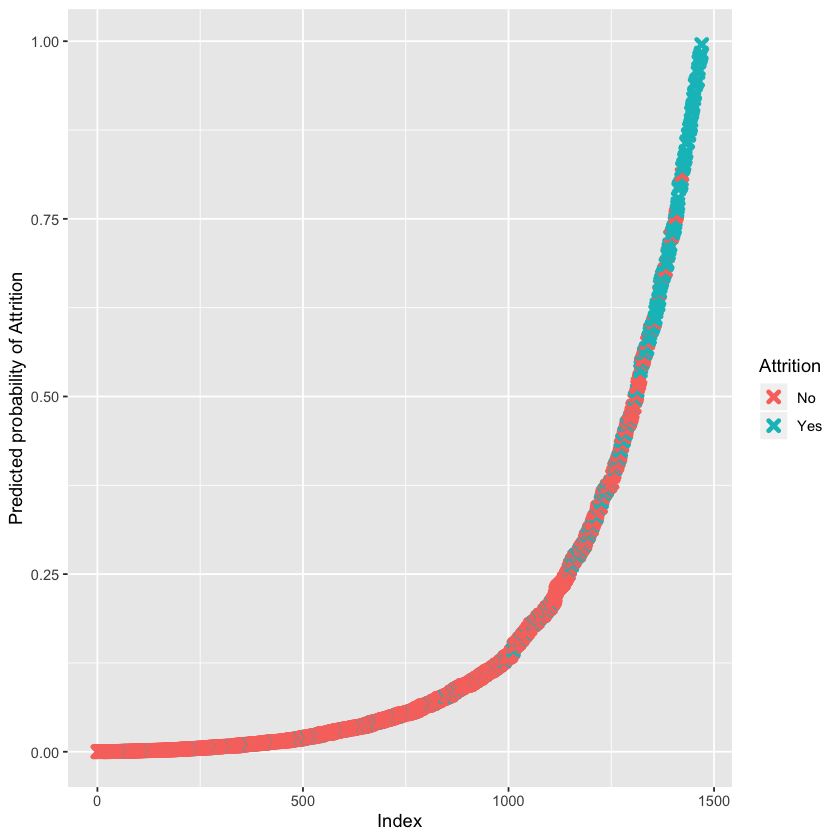

In [50]:
library(ggplot2)
## Lastly, we can plot the predicted probabilities for each sample having
## heart disease and color by whether or not they actually had heart disease
ggplot(data=predicted.data, aes(x=rank, y=probability.of.Attrition)) +
  geom_point(aes(color=Attrition), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of Attrition")

ggsave("attrition_probabilities.pdf")

In [11]:
library(leaps)
dim(data)

[1] 1470   35

In [13]:
help(regsubsets)

regsubsets                package:leaps                R Documentation

_f_u_n_c_t_i_o_n_s _f_o_r _m_o_d_e_l _s_e_l_e_c_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Model selection by exhaustive search, forward or backward
     stepwise, or sequential replacement

_U_s_a_g_e:

     regsubsets(x=, ...)
     
     ## S3 method for class 'formula'
     regsubsets(x=, data=, weights=NULL, nbest=1, nvmax=8,
      force.in=NULL, force.out=NULL, intercept=TRUE,
      method=c("exhaustive", "backward", "forward", "seqrep"),
      really.big=FALSE,
      nested=(nbest==1),...)
     
     ## Default S3 method:
     regsubsets(x=, y=, weights=rep(1, length(y)), nbest=1, nvmax=8,
     force.in=NULL, force.out=NULL, intercept=TRUE,
      method=c("exhaustive","backward", "forward", "seqrep"),
     really.big=FALSE,nested=(nbest==1),...)
     
     ## S3 method for class 'biglm'
     regsubsets(x,nbest=1,nvmax=8,force.in=NULL,
     method=c("exhaustive","backward", "forward", "seqrep"),
     really.big=FALSE,nested=(nbest==1),...)
     
     ## S3 method for class 'regsubsets'
     summary(object,all.best=TRUE,matrix=TRUE,matrix.logical=FALSE,df=NULL,...)
     
     ## S3 method for class 'regsubsets'
     coef(object,id,vcov=FALSE,...)
     ## S3 method for class 'regsubsets'
     vcov(object,id,...)
     
_A_r_g_u_m_e_n_t_s:

       x: design matrix or model formula for full model, or ‘biglm’
          object

    data: Optional data frame

       y: response vector

 weights: weight vector

   nbest: number of subsets of each size to record

   nvmax: maximum size of subsets to examine

force.in: index to columns of design matrix that should be in all
          models

force.out: index to columns of design matrix that should be in no
          models

intercept: Add an intercept?

  method: Use exhaustive search, forward selection, backward selection
          or sequential replacement to search.

really.big: Must be TRUE to perform exhaustive search on more than 50
          variables.

  nested: See the Note below: if ‘nested=FALSE’, models with columns 1,
          1 and 2, 1-3, and so on, will also be considered

  object: regsubsets object

all.best: Show all the best subsets or just one of each size

  matrix: Show a matrix of the variables in each model or just summary
          statistics

matrix.logical: With ‘matrix=TRUE’, the matrix is logical
          ‘TRUE’/‘FALSE’ or string ‘"*"’/‘" "’

      df: Specify a number of degrees of freedom for the summary
          statistics. The default is ‘n-1’

      id: Which model or models (ordered as in the summary output) to
          return coefficients and variance matrix for

    vcov: If ‘TRUE’, return the variance-covariance matrix as an
          attribute

     ...: Other arguments for future methods

_D_e_t_a_i_l_s:

     Since this function returns separate best models of all sizes up
     to ‘nvmax’ and since different model selection criteria such as
     AIC, BIC, CIC, DIC, ... differ only in how models of different
     sizes are compared, the results do not depend on the choice of
     cost-complexity tradeoff.

     When ‘x’ is a ‘biglm’ object it is assumed to be the full model,
     so ‘force.out’ is not relevant. If there is an intercept it is
     forced in by default; specify a ‘force.in’ as a logical vector
     with ‘FALSE’ as the first element to allow the intercept to be
     dropped.

     The model search does not actually fit each model, so the returned
     object does not contain coefficients or standard errors.
     Coefficients and the variance-covariance matrix for one or model
     models can be obtained with the ‘coef’ and ‘vcov’ methods.

_V_a_l_u_e:

     ‘regsubsets’ returns an object of class "regsubsets" containing no
     user-serviceable parts. It is designed to be processed by
     ‘summary.regsubsets’.

     ‘summary.regsubsets’ returns an object with elements

   which: A logical matrix

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

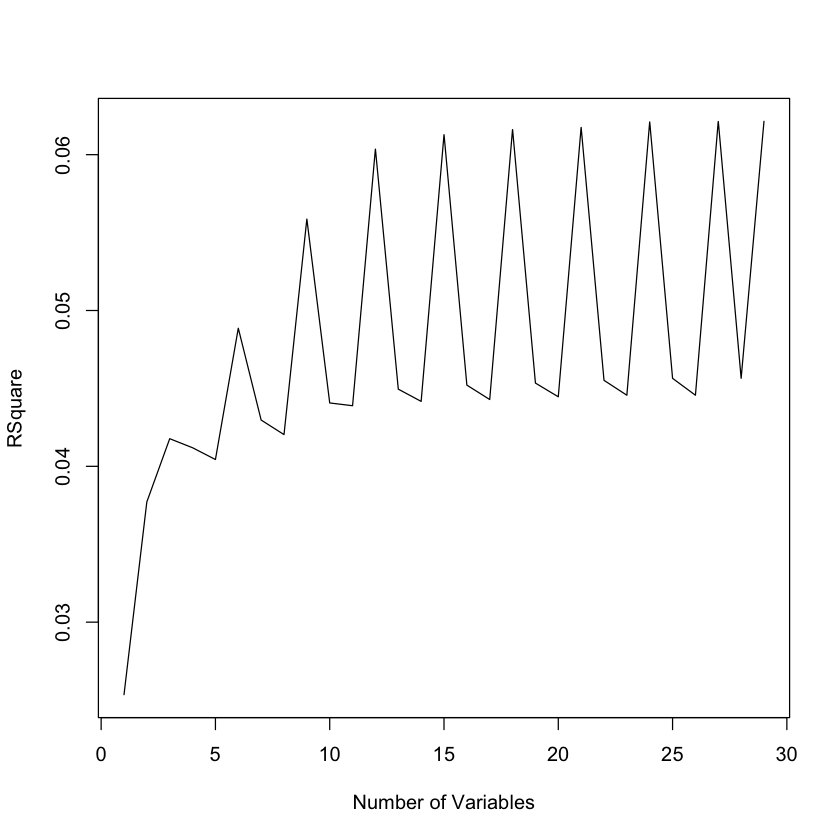

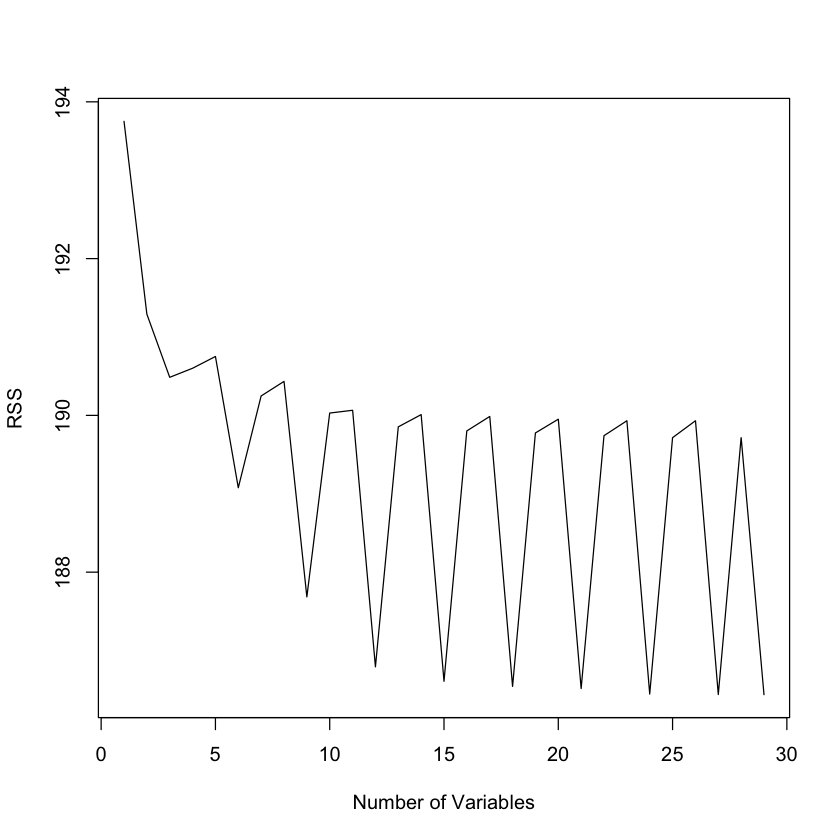

In [44]:
regfit.full=regsubsets(
    factor(Attrition) ~ 
    Age
    + factor(BusinessTravel)
    #+ DailyRate
    #+ factor(Department)
    #+ DistanceFromHome
    + factor(Education)
    #+ EducationField
    #+ factor(EnvironmentSatisfaction)
    + factor(Gender)
    + HourlyRate
    + factor(JobInvolvement)
    # + factor(JobLevel)
    # + factor(JobRole)
    # + factor(JobSatisfaction)
    # + factor(MaritalStatus)
    #+ MonthlyIncome
    # + MonthlyRate
    # + NumCompaniesWorked
    # + factor(OverTime)
    #+ PercentSalaryHike
    #+ factor(PerformanceRating)
    #+ factor(RelationshipSatisfaction)
    #+ StandardHours
    #+ factor(StockOptionLevel)
    # + TotalWorkingYears
    #+ TrainingTimesLastYear
    #+ factor(WorkLifeBalance)
    # + YearsAtCompany
    #+ YearsSinceLastPromotion
    #+ YearsWithCurrManager
    ,data, nvmax=15, nbest=3, method="backward", really.big=T)
reg.summary<-summary(regfit.full)
names(reg.summary)

# RQS and RSS
plot(reg.summary$rsq, xlab="Number of Variables", ylab="RSquare", type="l")
plot(reg.summary$rss, xlab="Number of Variables", ylab="RSS", type="l")

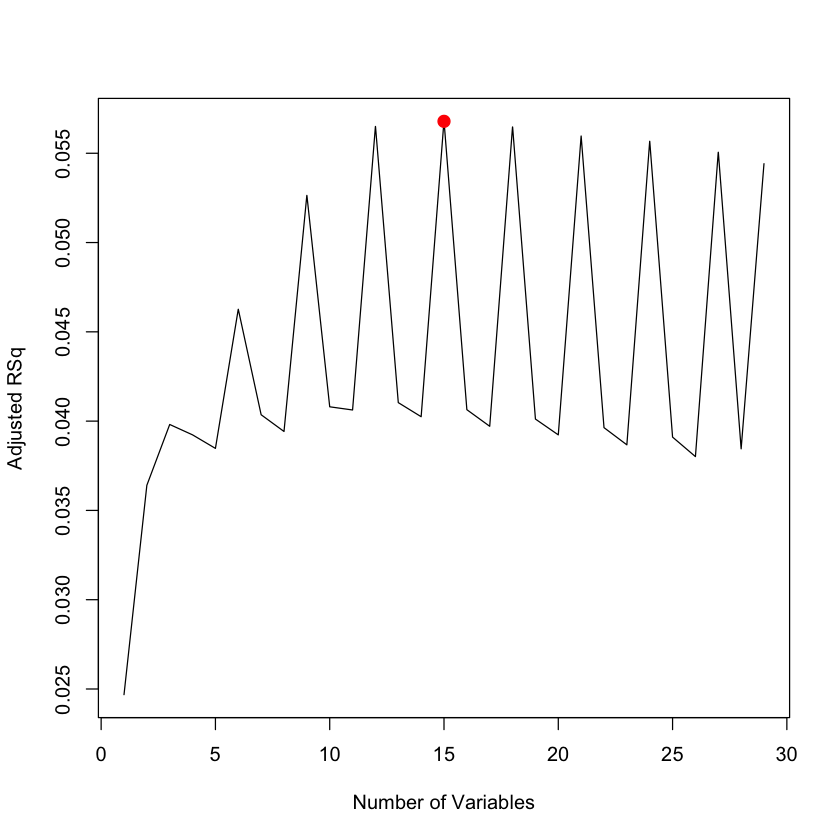

In [45]:
max.adjr2=which.max(reg.summary$adjr2)
plot(reg.summary$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")
points(max.adjr2,reg.summary$adjr2[max.adjr2],col="red",cex=2,pch=20)

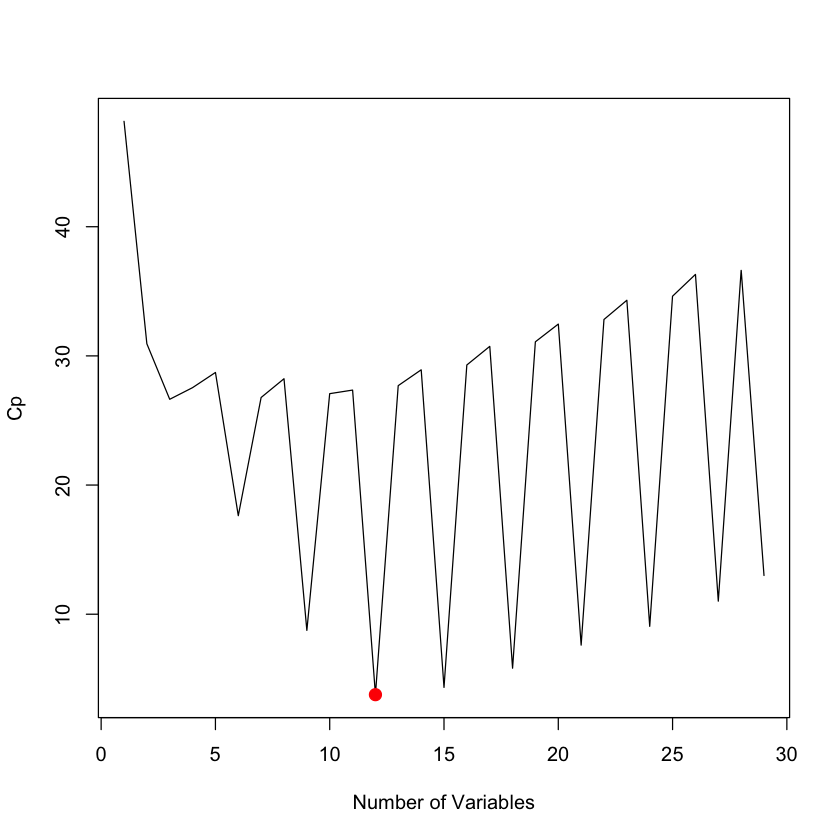

In [46]:
min.cp=which.min(reg.summary$cp)
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type="l")
points(min.cp,reg.summary$cp[min.cp],col="red",cex=2,pch=20)

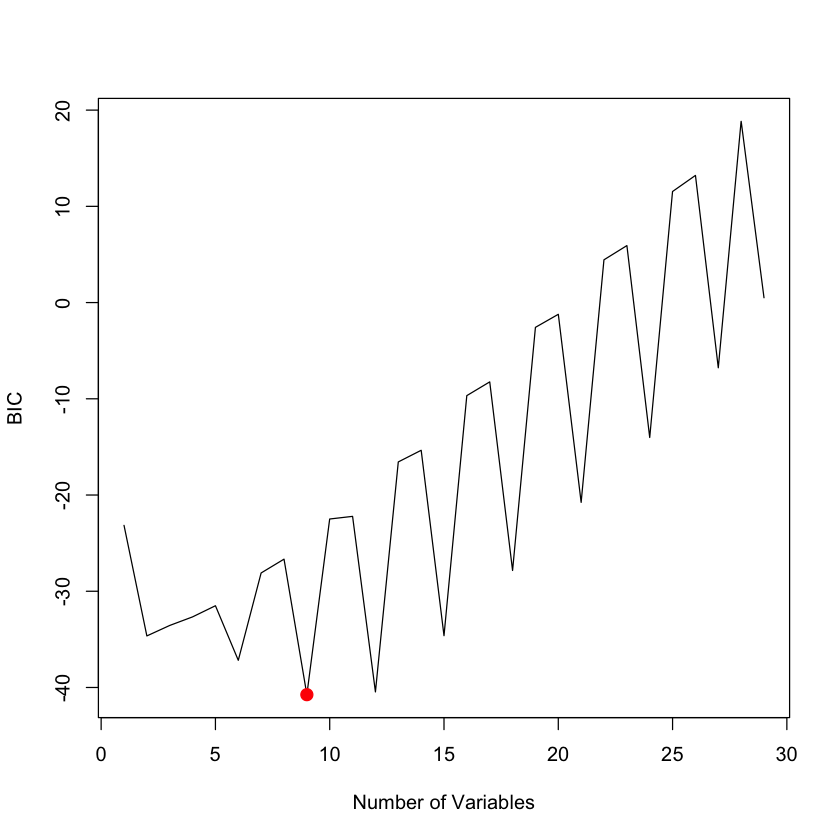

In [47]:
min.bic=which.min(reg.summary$bic)
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type="l")
points(min.bic,reg.summary$bic[min.bic],col="red",cex=2,pch=20)

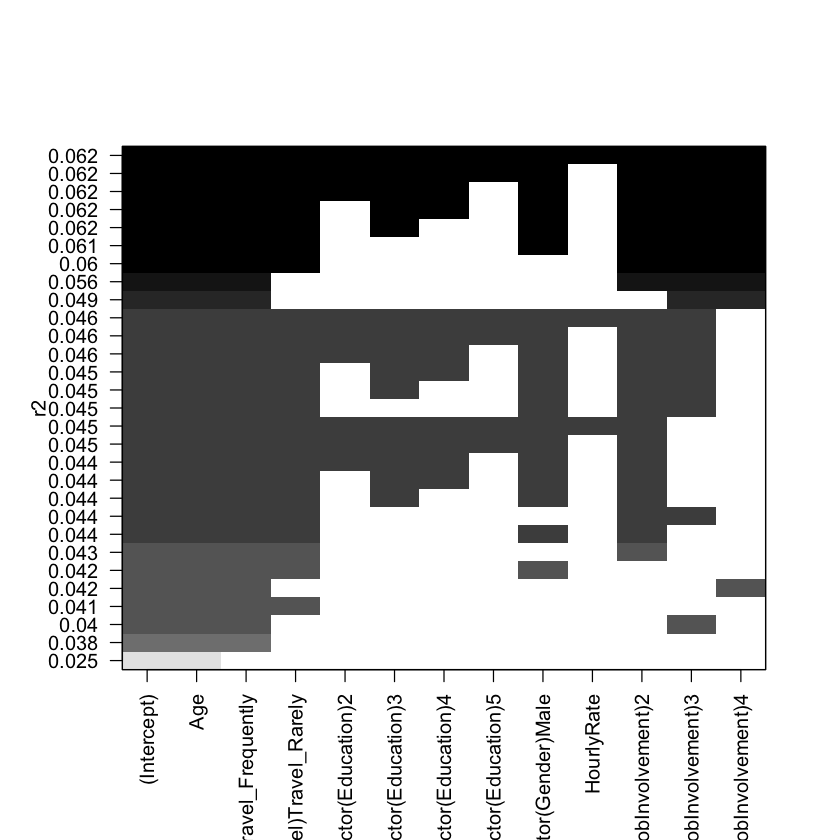

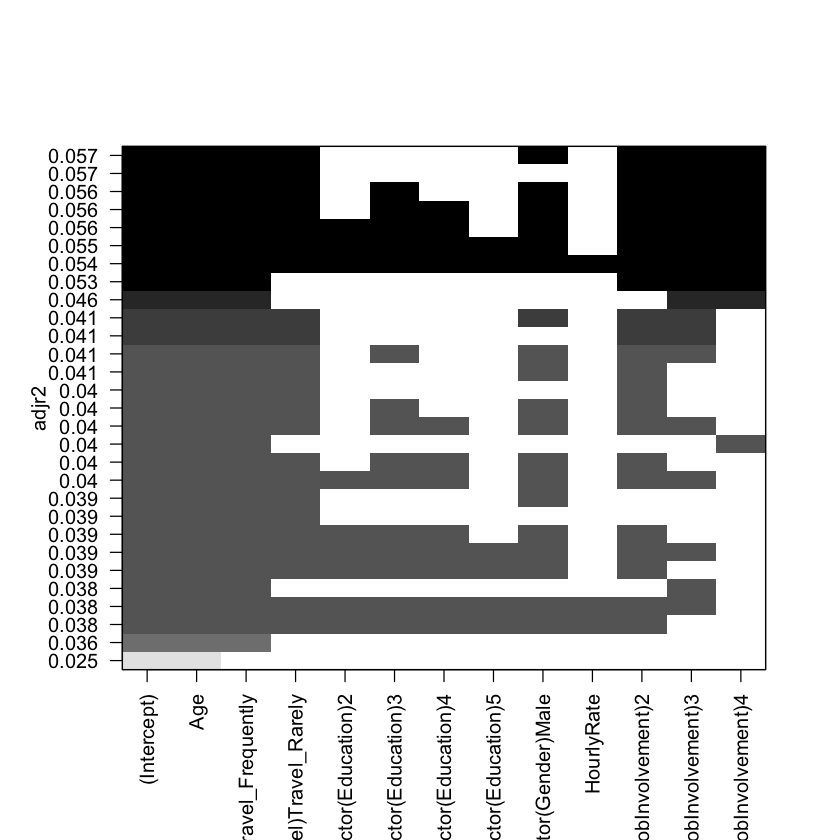

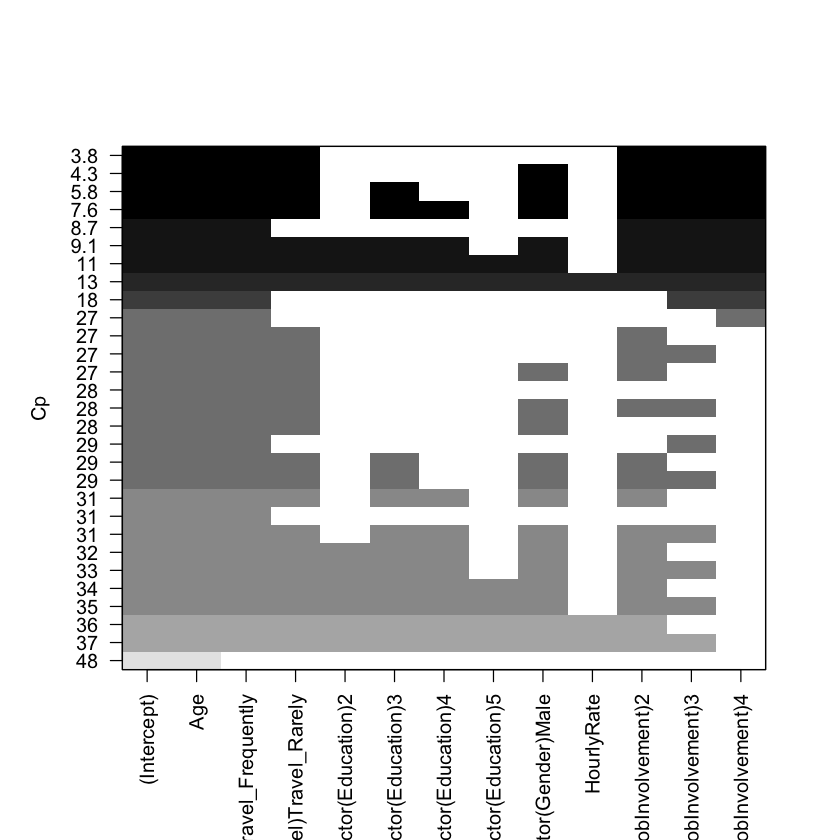

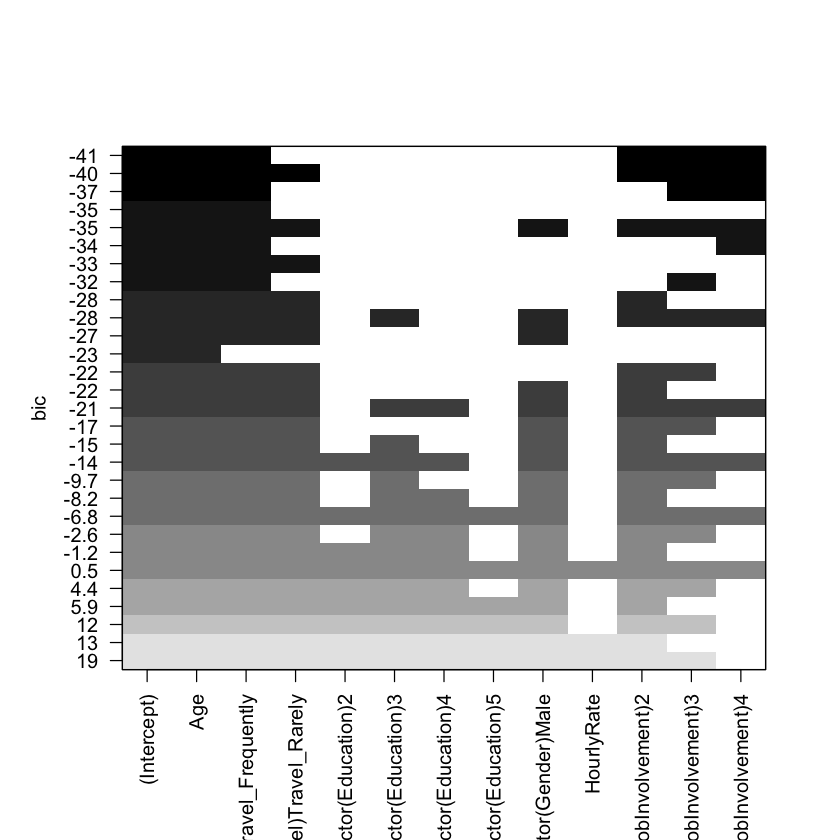

In [48]:
plot(regfit.full,scale = "r2")
plot(regfit.full,scale = "adjr2")
plot(regfit.full,scale = "Cp")
plot(regfit.full,scale = "bic")
# coef(regfit.full, 10) #default bic

In [33]:
regfit.bwd=regsubsets(
    factor(Attrition) ~ 
    Age
    + factor(BusinessTravel)
    + DailyRate
    + factor(Department)
    + DistanceFromHome
    + factor(Education)
    + EducationField
    + factor(EnvironmentSatisfaction)
    + factor(Gender)
    + HourlyRate
    + factor(JobInvolvement)
    + factor(JobLevel)
    + factor(JobRole)
    + factor(JobSatisfaction)
    + factor(MaritalStatus)
    + MonthlyIncome
    + MonthlyRate
    + NumCompaniesWorked
    # + factor(OverTime)
    + PercentSalaryHike
    + factor(PerformanceRating)
    + factor(RelationshipSatisfaction)
    + StandardHours
    + factor(StockOptionLevel)
    + TotalWorkingYears
    + TrainingTimesLastYear
    + factor(WorkLifeBalance)
    + YearsAtCompany
    + YearsSinceLastPromotion
    + YearsWithCurrManager
    ,data=data, nvmax=15, nbest=3, method="backward")
summary(regfit.bwd)
plot(regfit.bwd,scale="Cp")
coef(regfit.bwd,which.min(summary(regfit.bwd)$cp))

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in obj$ress < obj$rss * (1 - 1e-08):
“longer object length is not a multiple of shorter object length”


ERROR: Error in which(obj$ress < obj$rss * (1 - 1e-08), arr.ind = TRUE): dims [product 51] do not match the length of object [62]
